In [2]:
import numpy as np
from os import listdir
from tools.tool import cal_SNR,gmm_defined_analytic,unpack,gmm_predict,find_file,change_label
import pandas as pd
from os import makedirs,listdir,remove
from os.path import exists
import matplotlib.pyplot as plt
import pickle
import time
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

In [7]:
from tools.Load_PYQUM import Load_pyqum
# samplename = "3SXQ-Al-Si-19-5(v1)"
# foldername = r"C:/Users/tsung/Downloads/data/"+samplename+"/"
foldername = r"./data/"
#pyqum_path = find_file(foldername,19)
pyqum_path = find_file(foldername)
pyqum = Load_pyqum(pyqum_path)
# condition = pyqum.amp_filter(0.1,0.2)
# df = pyqum.dataframe[condition]
print("JOBID: ",pyqum.jobid)
df = pyqum.dataframe
df['I']*=1000
df['Q']*=1000
#plt.scatter(df[df["IF_ALIGN_MHz"]==0]['I'],df[df["IF_ALIGN_MHz"]==0]['Q'],s = 2)
df

Pick an option:
1) 10794.pyqum	2) Tomography	3) 10792.pyqum	4) .DS_Store	5) AS1203Q2_r.pyqum
6) Single_Qubit.pyqum	7) AS1203Q1_005.pyqum	8) F10_Q2.pyqum	9) GAUSSOneShot.pyqum	10) RB.pyqum(11)
11) F10Q3_006.pyqum	12) multiplex_008.pyqum	13) 7605.pyqum	14) 8469.pyqum	15) master_008.pyqum
16) 8450.pyqum	17) 10535.pyqum	18) 2Qproba	19) DR3_13376.pyqum	20) 11716.pyqum
21) F10_Q1.pyqum	22) 8452.pyqum	23) Single_Qubit_3.pyqum	24) F10Q4.pyqum	25) 13383.pyqum
26) DR4_507.pyqum	27) AS1203Q4_0065.pyqum	28) AS1203_Q2.pyqum	29) AS1203Q3_005.pyqum	30) measure
31) DRAGOneShot.pyqum	32) Single_Qubit（1).pyqum	33) Single_Qubit_2.pyqum	34) Multiplex_r_oneshot.pyqum	35) multiplexTest.pyqum
36) 11602.pyqum	37) Master_r_oneshot.pyqum	38) Single_Qubit_4.pyqum	39) AS1203_Q1.pyqum	
Your Choice is 25
./data/13383.pyqum
Comment : 
Q1 01 Teff oneshot 500+3000
RO KS4_8 mix att. I=-20 Q=-20 RF=-30,  xy4940-120 L 0.1  R/L/M -14.5/-58/-62
XY KS3_7 mix att. I=-10 Q=-10 RF=0,
Update: T6=11.175mK, REF#13382,13381,13380,

XYL  RECORD-SUM         I         Q
0      0.00         1.0  0.226870 -1.902269
1      0.00         2.0 -0.042189 -1.658565
2      0.00         3.0  0.049581 -1.786949
3      0.00         4.0  0.249446 -2.017061
4      0.00         5.0  0.149609 -1.932852
...     ...         ...       ...       ...
19995  0.47      9996.0 -0.249223 -2.033168
19996  0.47      9997.0  0.075351 -1.408283
19997  0.47      9998.0 -0.486434 -2.325821
19998  0.47      9999.0 -0.108848 -1.852282
19999  0.47     10000.0 -0.398993 -2.333901

[20000 rows x 4 columns]

Comment : 
Q1 sweSpot ROL OneShot

	Data Checked!

Start load data....
[-3.55222349e-05 -6.15782154e-04 -5.53477840e-04 ... -5.87038550e-05
 -1.59166429e-03  1.31567174e-05]


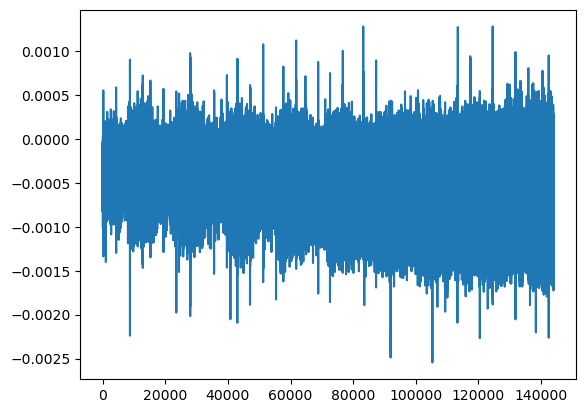

In [22]:
from tools.Load_PYQUM import load_rawdata
x = load_rawdata(pyqum_path)
print(x[0])
plt.plot(x[0])
plt.show()

In [3]:
pyqum.print_parameter()


C-order :
	 C-Structure  :  []
R-JSON :
	 ROSTART  :  10000
	 ROL  :  0.1
	 ROW  :  8000
	 ROF  :  6
	 ROFF  :  20
	 ROLL  :  0.5
RECORD-SUM :  8000
RECORD_TIME_NS :  2000
0 -20


In [16]:
point_number = df['I'].shape[0]/np.array(df['XYL'].unique()).shape[0]
marker_size = point_number/1e5


In [19]:
df = df[df["ROL"]==0.08]
df

ROL  XYL  RECORD-SUM         I         Q
96000   0.08  0.0         1.0 -0.467208  0.068792
96001   0.08  0.0         2.0 -0.152100 -0.238422
96002   0.08  0.0         3.0 -0.084399 -0.453759
96003   0.08  0.0         4.0 -0.106948  0.053721
96004   0.08  0.0         5.0 -0.020855 -0.322513
...      ...  ...         ...       ...       ...
103995  0.08  0.2      3996.0 -1.131306  0.029369
103996  0.08  0.2      3997.0 -1.096983 -0.141597
103997  0.08  0.2      3998.0 -0.932218 -0.335407
103998  0.08  0.2      3999.0 -0.808316 -0.189187
103999  0.08  0.2      4000.0 -0.873760 -0.206071

[8000 rows x 5 columns]

In [4]:
df.columns.values.tolist()

['XYL', 'RECORD-SUM', 'I', 'Q']

In [27]:
print(df['R'].unique())

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [48]:
len(g)

4000

(-2.774664052191771, -1.1617339711508279)

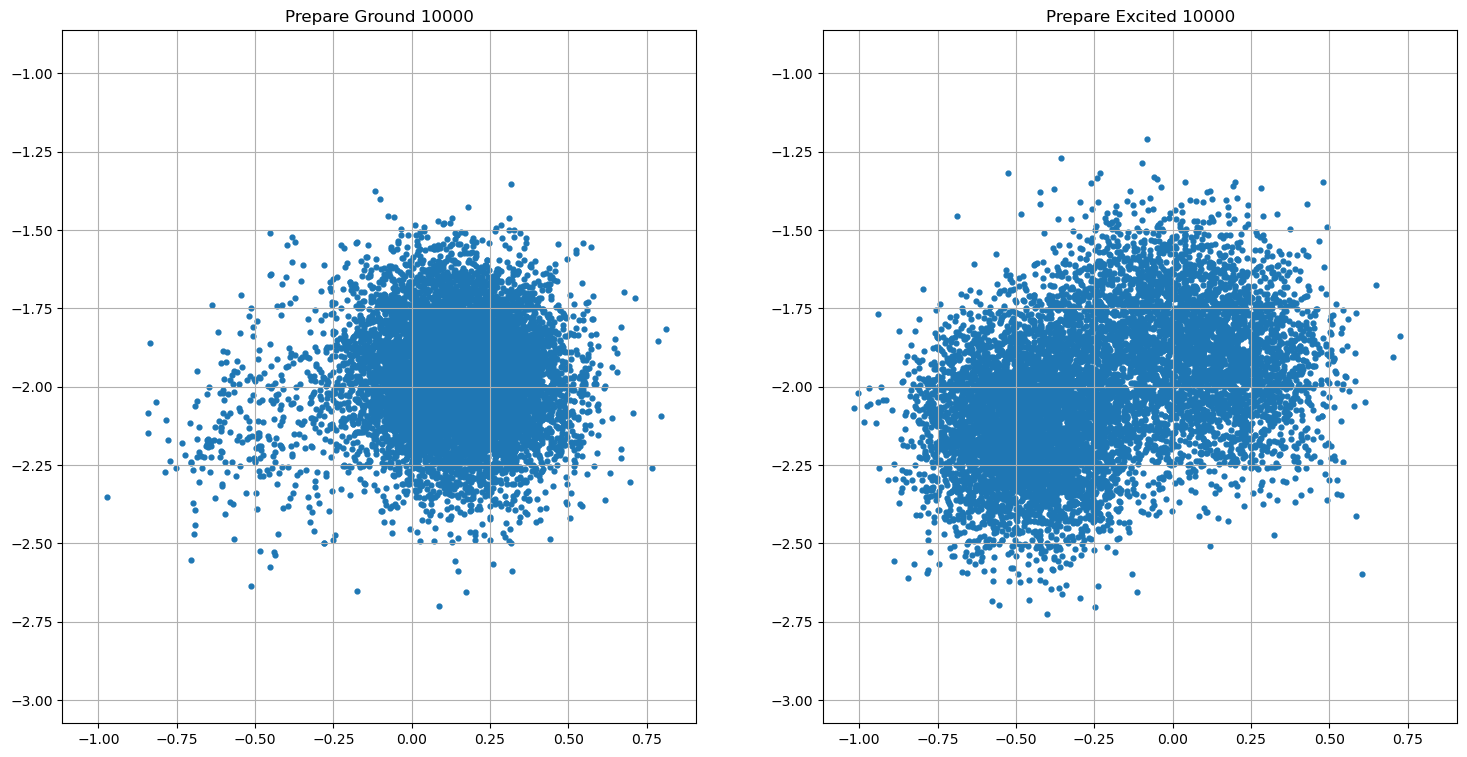

In [8]:
g = df[(df['XYL']==df['XYL'].unique()[0])]
e = df[(df['XYL']==df['XYL'].unique()[1])]

xaxis,yaxis = 'I','Q'
axis0_xrange=np.array([min(g[xaxis].min(),e[xaxis].min())-max(g[xaxis].var(),e[xaxis].var()),max(g[xaxis].max(),e[xaxis].max())+max(g[xaxis].var(),e[xaxis].var())])
axis0_yrange=np.array([min(g[yaxis].min(),e[yaxis].min())-max(g[yaxis].var(),e[yaxis].var()),max(g[yaxis].max(),e[yaxis].max())+max(g[yaxis].var(),e[yaxis].var())])
xrange = np.array([min(axis0_xrange.min(),axis0_xrange.min()),max(axis0_xrange.max(),axis0_xrange.max())])
yrange = np.array([min(axis0_yrange.min(),axis0_yrange.min()),max(axis0_yrange.max(),axis0_yrange.max())])


plt.figure(figsize=(18, 9))
ax1 = plt.subplot(121)
ax1.scatter(g['I'],g['Q'],s = 12)
ax1.title.set_text('Prepare Ground {:d}'.format(len(g)))
ax1.grid()
ax1.axis('equal')
# ax1.set_xlim(-0.1925,-0.105)
# ax1.set_ylim(-0.05,0.06)
ax1.set_xlim(xrange)
ax1.set_ylim(yrange)
ax2 = plt.subplot(122)
ax2.scatter(e['I'],e['Q'],s = 12)
ax2.title.set_text('Prepare Excited {:d}'.format(len(e)))
ax2.grid()
ax2.axis('equal')
# ax2.set_xlim(-0.1925,-0.105)
# ax2.set_ylim(-0.05,0.06)
ax2.set_xlim(xrange)
ax2.set_ylim(yrange)
# plt.suptitle("#{:d}_{:s}".format(pyqum.jobid,"JPA on"),fontsize=25)
# plt.savefig(r'.\figure\raw data for thesis1.png')
# plt.savefig(r'.\figure\raw data#{:d}_{:s}.png'.format(pyqum.jobid,"JPA on"))

S :  0.6077462024302633  ; N :  0.06342911398477119  ; SNR :  5.823121645008093
[0 1]
[[-0.44995809 -2.1180038 ]
 [ 0.13064594 -1.93840868]]


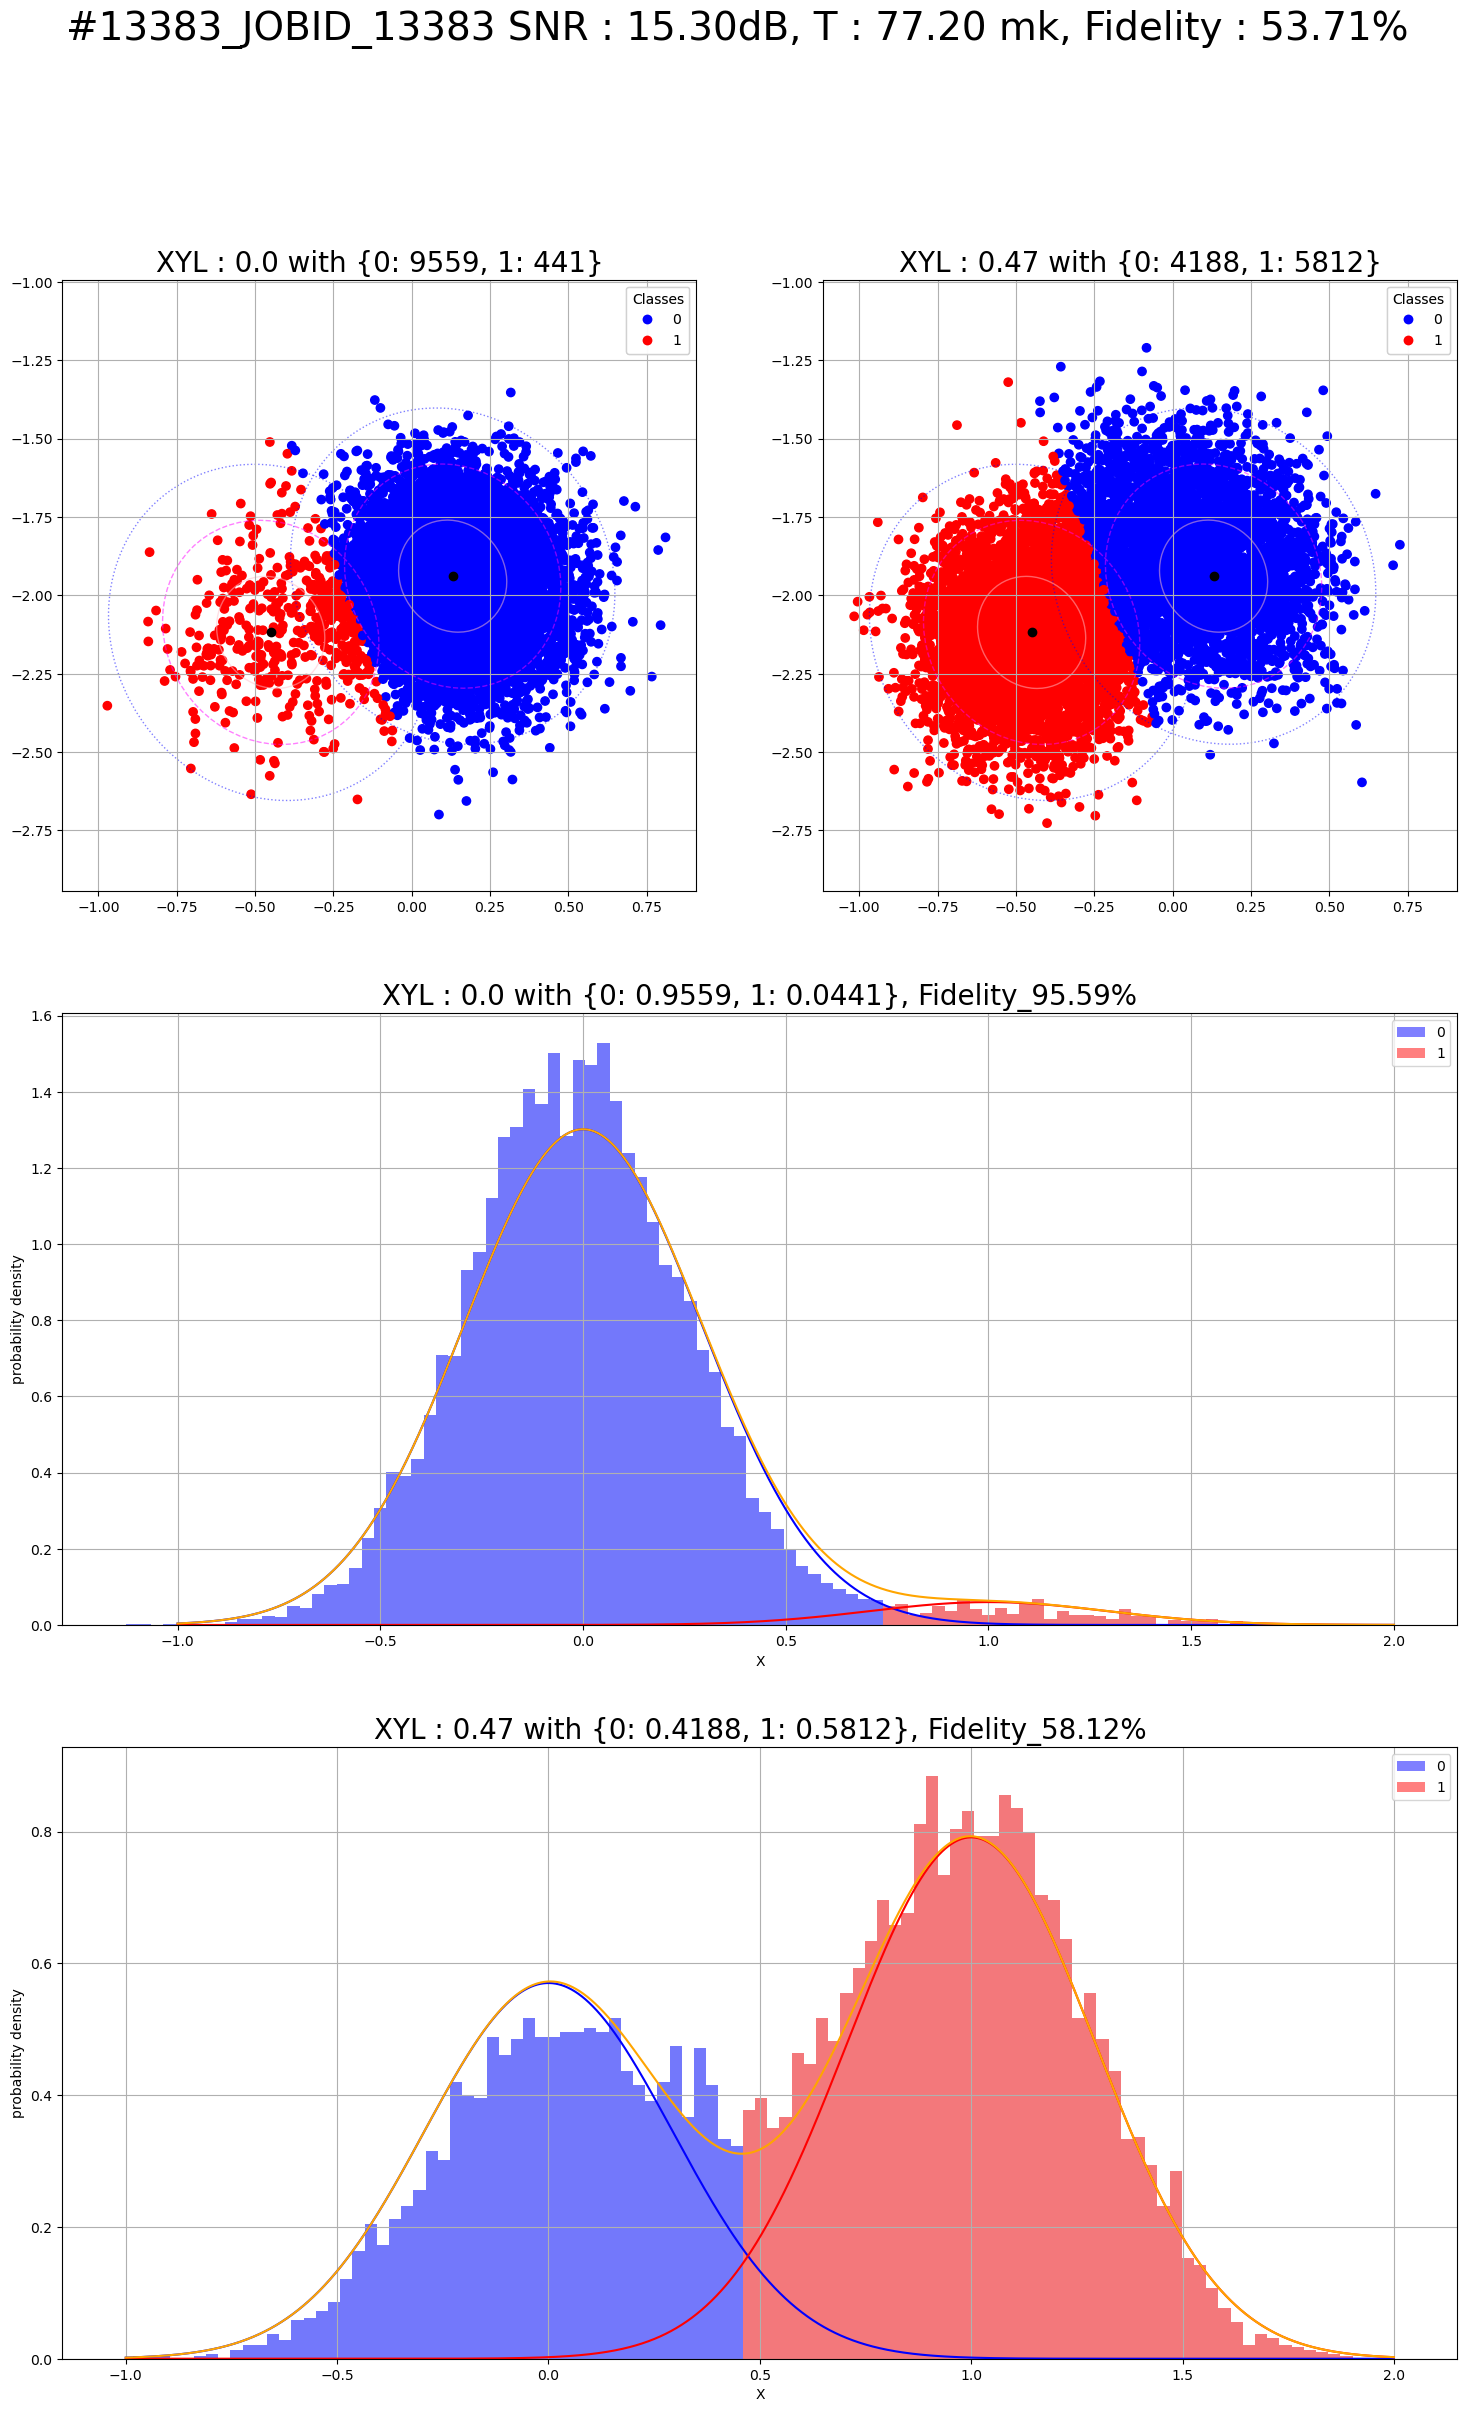

[[0.9515455622631486, 0.004354437736851402], [0.009281803087511236, 0.03481819691248876]]
[[0.39633807428045725, 0.022461925719542752], [0.020788155141842138, 0.5604118448581579]]


<Figure size 640x480 with 0 Axes>

In [9]:
title = "JOBID_13383"
ground, excited = g,e
ground_index, excited_index = 0,-1
XYL_ground, XYL_excited = df['XYL'].unique()[ground_index],df['XYL'].unique()[excited_index]
from tools.tool import gmm_analytic,confidence_ellipse_gmm,std_dev,cal_Tmk
import scipy
gmm, mark_gmm,data1,label1,data2,label2,S,N,SNR,SNR_dB = gmm_analytic(df,excited,ground,2)
print(np.unique(label1))
gmm_para = gmm, mark_gmm,data1,label1,data2,label2,SNR
jobid = pyqum.jobid
cluster_centers,cov,XYL,w_a = gmm.means_,gmm.covariances_,[XYL_ground,XYL_excited],float(pyqum.rjson()['XYF'])
if mark_gmm: 
    label1 = change_label(label1)
    label2 = change_label(label2)
unique1, counts1 = np.unique(label1, return_counts=True)
unique2, counts2 = np.unique(label2, return_counts=True)
plt.figure(figsize=(18, 27))
ax1 = plt.subplot(321)
ax1.axis('equal')
ax1.grid()
scatter1 = ax1.scatter(data1[:, 0],data1[:, 1],c=label1,cmap ='bwr')#,cmap ='bwr',s=marker_size
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes")
ax1.add_artist(legend1)
ax1.title.set_text("XYL : "+str(XYL[0])+" with "+str(dict(zip(unique1, counts1))))
ax1.title.set_size(20)
ax1.set_xlim(xrange)
ax1.set_ylim(yrange)
for i in range(len(cluster_centers)):
    confidence_ellipse_gmm(cluster_centers[i],cov, ax1, n_std=1,edgecolor='pink',alpha= 0.5)
    confidence_ellipse_gmm(cluster_centers[i],cov, ax1, n_std=2,edgecolor='fuchsia', linestyle='--',alpha= 0.5)
    confidence_ellipse_gmm(cluster_centers[i],cov, ax1, n_std=3,edgecolor='blue', linestyle=':',alpha= 0.5)
    ax1.scatter(cluster_centers[i][0],cluster_centers[i][1],color = "black")
ax2 = plt.subplot(322)
ax2.axis('equal')
ax2.grid()
scatter2 = ax2.scatter(data2[:, 0],data2[:, 1],c=label2,cmap ='bwr')#,cmap ='bwr',s=marker_size
legend2 = ax2.legend(*scatter2.legend_elements(), title="Classes")
ax2.add_artist(legend2)
ax2.title.set_text("XYL : "+str(XYL[-1])+" with "+str(dict(zip(unique2, counts2))))
ax2.title.set_size(20)
ax2.set_xlim(xrange)
ax2.set_ylim(yrange)
for i in range(len(cluster_centers)):
    confidence_ellipse_gmm(cluster_centers[i],cov, ax2, n_std=1,edgecolor='pink',alpha= 0.5)
    confidence_ellipse_gmm(cluster_centers[i],cov, ax2, n_std=2,edgecolor='fuchsia', linestyle='--',alpha= 0.5)
    confidence_ellipse_gmm(cluster_centers[i],cov, ax2, n_std=3,edgecolor='blue', linestyle=':',alpha= 0.5)
    ax2.scatter(cluster_centers[i][0],cluster_centers[i][1],color = "black")

p0_1,p1_1 = counts1[0]/(counts1[0]+counts1[1]),counts1[1]/(counts1[0]+counts1[1])
p0_2,p1_2 = counts2[0]/(counts2[0]+counts2[1]),counts2[1]/(counts2[0]+counts2[1])
bins = 100
if mark_gmm:
    refpoint = cluster_centers[1]
    diff = cluster_centers[0]-cluster_centers[1]
else:
    refpoint = cluster_centers[0]
    diff = cluster_centers[1]-cluster_centers[0]
# select groups which i want with label, often label = 0 and 1
data1_1D = (data1-refpoint)@diff/(scipy.linalg.norm(diff))**2
data2_1D = (data2-refpoint)@diff/(scipy.linalg.norm(diff))**2
x = np.linspace(-1,2,10000)
# sigma0_1 = std_dev(data1_1D[data1_1D<=0],0)
# sigma1_1= std_dev(data1_1D[data1_1D>=1],1)
# sigma0_2 = std_dev(data2_1D[data2_1D<=0],0)
# sigma1_2= std_dev(data2_1D[data2_1D>=1],1)


d = scipy.linalg.norm(diff)  # distance between g & e center
print(gmm.means_)
v = gmm.means_[1]-gmm.means_[0]
rotation_matrix = np.array([[ v[0]/d,  -v[1]/d],[ v[1]/d,  v[0]/d]])
cov = rotation_matrix @ gmm.covariances_ @ rotation_matrix.T/(d**2) # normalized rotated conv matrix
sigma = np.sqrt(cov[0][0])

best_fit_line0 = scipy.stats.norm.pdf(x,0, sigma)
best_fit_line1 = scipy.stats.norm.pdf(x,1, sigma)

cdf0 = scipy.stats.norm.cdf(x,0, sigma)   # cumulative distribution function
cdf1 = scipy.stats.norm.cdf(x,1, sigma)

# y-> 機率相減, pdf0->blue, pedf1->red, cdf0->cumulative blue, cdf1->cumulative red
a =pd.DataFrame({'x':x,'y':p0_1*best_fit_line0-p1_1*best_fit_line1,'pdf0':p0_1*best_fit_line0,'pdf1':p1_1*best_fit_line1,'cdf0':p0_1*cdf0,'cdf1':p1_1*cdf1})
b =pd.DataFrame({'x':x,'y':p0_2*best_fit_line0-p1_2*best_fit_line1,'pdf0':p0_2*best_fit_line0,'pdf1':p1_2*best_fit_line1,'cdf0':p0_2*cdf0,'cdf1':p1_2*cdf1})

# 鎖定中間交錯部分，0<x<1
df_pdf = a[(a['x']<1)&(a['x']>0)]
df_pdf_2 = b[(b['x']<1)&(b['x']>0)]
# 藍線紅線最接近的 x, 在鎖定部分
cut = float(df_pdf.iloc[(df_pdf['y']).abs().argsort()[:1]]['x'])
cut2 = float(df_pdf_2.iloc[(df_pdf_2['y']).abs().argsort()[:1]]['x'])

gg = float(df_pdf.iloc[(df_pdf['y']).abs().argsort()[:1]]['cdf0'])
eg = float(df_pdf.iloc[(df_pdf['y']).abs().argsort()[:1]]['cdf1'])
ge = p0_1-gg
ee = p1_1-eg
gg_2 = float(df_pdf_2.iloc[(df_pdf_2['y']).abs().argsort()[:1]]['cdf0'])
eg_2 = float(df_pdf_2.iloc[(df_pdf_2['y']).abs().argsort()[:1]]['cdf1'])
ge_2 = p0_2-gg_2
ee_2 = p1_2-eg_2

ax3 = plt.subplot(312)
ax3.grid()
n1,locbin1,patch1 =ax3.hist(data1_1D, bins, density=True,alpha=.1)
locbin1 = np.delete(locbin1, 0)
width1 = locbin1[1]-locbin1[0]
ax3.bar(locbin1[locbin1<cut]-width1/2,n1[locbin1<cut],width =width1,color='b',alpha =0.5,label=0)
ax3.bar(locbin1[locbin1>cut]-width1/2,n1[locbin1>cut],width =width1,color='r',alpha =0.5,label=1)
ax3.plot(x, p0_1*best_fit_line0,color='b')
ax3.plot(x, p1_1*best_fit_line1,color='r')
ax3.plot(x, p0_1*best_fit_line0+p1_1*best_fit_line1,color = 'orange')
ax3.legend()
ax3.set_xlabel("X")
ax3.set_ylabel("probability density")
ax3.title.set_text("XYL : "+str(XYL[0])+" with "+str(dict(zip(unique1, [round(p0_1,5),round(p1_1,5)])))+", Fidelity_{:.2f}%".format(100*p0_1 ))
ax3.title.set_size(20)

ax4 = plt.subplot(313)
ax4.grid()
n2,locbin2,patch2 =ax4.hist(data2_1D, bins, density=True,alpha=.1)
locbin2 = np.delete(locbin2, 0)
width2 = locbin2[1]-locbin2[0]
ax4.bar(locbin2[locbin2<cut2]-width2/2,n2[locbin2<cut2],width =width2,color='b',alpha =0.5,label=0)
ax4.bar(locbin2[locbin2>cut2]-width2/2,n2[locbin2>cut2],width =width2,color='r',alpha =0.5,label=1)
ax4.plot(x, p0_2*best_fit_line0,color='b')
ax4.plot(x, p1_2*best_fit_line1,color='r')
ax4.plot(x, p0_2*best_fit_line0+p1_2*best_fit_line1,color = 'orange')
ax4.legend()
ax4.set_xlabel("X")
ax4.set_ylabel("probability density")
ax4.title.set_text("XYL : "+str(XYL[-1])+" with "+str(dict(zip(unique2, [round(p0_2,5),round(p1_2,5)])))+", Fidelity_{:.2f}%".format(100*p1_2))
ax4.title.set_size(20)
T= cal_Tmk(p1_1,w_a)
plt.suptitle("#{:d}_{:s} SNR : {:.2f}dB, T : {:.2f} mk, Fidelity : {:.2f}%".format(jobid,title,SNR_dB,T,100*(1-p1_1-p0_2)),fontsize=28)
# sample_dir = "./"+samplename
# if not exists(sample_dir):
#     makedirs(sample_dir)
#     print("Sample folder for output created!")
# fig_dir = sample_dir+"/Figure/"
# if not exists(fig_dir):
#     makedirs(fig_dir)
# plt.savefig("D:\Experiment\self\week1_230214\#{:d}_{:s}.png".format(jobid,title))
plt.savefig("DR3_13383.png")
plt.show()
plt.clf()

print([[gg,ge],[eg,ee]])
print([[gg_2,ge_2],[eg_2,ee_2]])

In [6]:
distance = ((gmm.means_[0][0]-gmm.means_[1][0])**2+(gmm.means_[0][1]-gmm.means_[1][1])**2)**0.5
print("Distance: %.3f , Sigma: %.3f"%(distance,sigma))

Distance: 2.810 , Sigma: 0.158


In [12]:
{'S':S,'N':N,'SNR':SNR,'SNR_dB':SNR_dB,'T(mk)':T}

{'S': 1.2319840029414428,
 'N': 0.1961098006629071,
 'SNR': 7.73946319038149,
 'SNR_dB': 17.774216780737852,
 'T(mk)': -175.41963311677623}

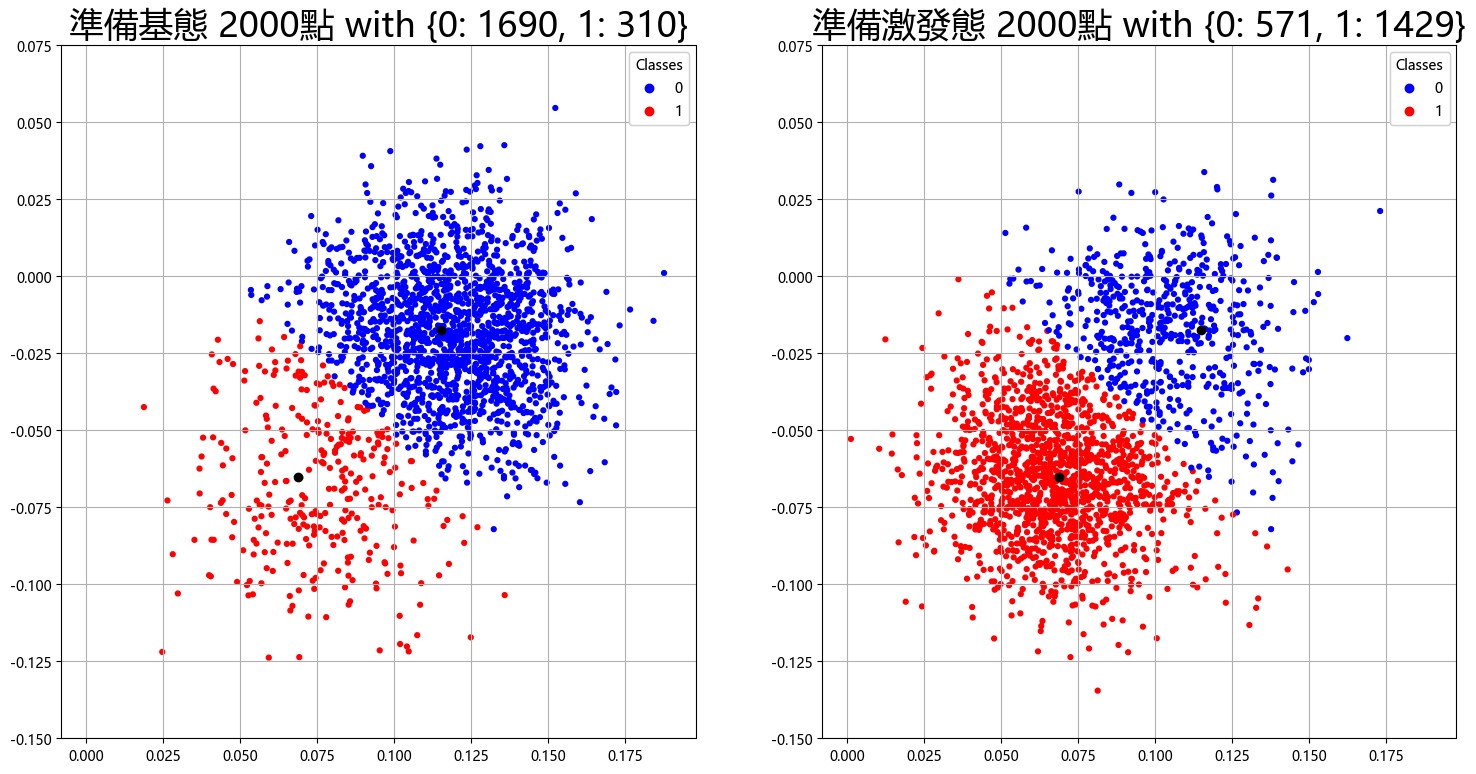

In [29]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.titlesize'] =25
plt.figure(figsize=(18, 9))
ax1 = plt.subplot(121)
ax1.axis('equal')
ax1.grid()
scatter1 = ax1.scatter(data1[:, 0],data1[:, 1],s = 12,c=label1,cmap ='bwr')
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes")
ax1.add_artist(legend1)
ax1.title.set_text('準備基態 2000點'+" with "+str(dict(zip(unique1, counts1))))
# ax1.set_xlim(-0.02,0.1) #JPA off
# ax1.set_ylim(-0.05,0.08) #JPA off
ax1.set_xlim(-0.015,0.205) #JPA on
ax1.set_ylim(-0.15,0.075) #JPA on
for i in range(len(cluster_centers)):
    ax1.scatter(cluster_centers[i][0],cluster_centers[i][1],color = "black")
ax2 = plt.subplot(122)
ax2.axis('equal')
ax2.grid()
scatter2 = ax2.scatter(data2[:, 0],data2[:, 1],s = 12,c=label2,cmap ='bwr')
legend2 = ax2.legend(*scatter2.legend_elements(), title="Classes")
ax2.add_artist(legend2)
ax2.title.set_text('準備激發態 2000點'+" with "+str(dict(zip(unique2, counts2))))
ax2.set_xlim(-0.015,0.205)
ax2.set_ylim(-0.15,0.075)
for i in range(len(cluster_centers)):
    ax2.scatter(cluster_centers[i][0],cluster_centers[i][1],color = "black")
# plt.suptitle("#{:d}_{:s}".format(pyqum.jobid,"JPA on"),fontsize=25)
plt.savefig(r'.\figure\raw data for thesis2.png')

In [7]:
model_dir = "./model/"
if not exists(model_dir):
    makedirs(model_dir)
gmm_backup = gmm, mark_gmm,{'S':S,'N':N,'SNR':SNR,'SNR_dB':SNR_dB}
modelname = model_dir+'gmm_model.sav'
pickle.dump(gmm_backup, open(modelname, 'wb'))

In [8]:
loaded_model = pickle.load(open(modelname, 'rb'))
gmm, mark_gmm,SNR_dict = loaded_model

In [9]:
from sklearn.cluster import KMeans
from tools.tool import confidence_ellipse
def kmeans_analytic(train,excited,ground):
    training = np.stack((train['I'], train['Q']), axis=1)
    kmeans = KMeans(n_clusters=2, n_init=1, random_state=0)
    label = kmeans.fit_predict(training)
    mark_kmeans= False
    data3 = np.stack((ground['I'], ground['Q']), axis=1)
    label3 = kmeans.predict(data3)
    data4 = np.stack((excited['I'], excited['Q']), axis=1)
    label4 = kmeans.predict(data4)
    unique3, counts3 = np.unique(label3, return_counts=True)
    unique4, counts4 = np.unique(label4, return_counts=True)
    if counts3[0]<counts4[0]:mark_kmeans= True
    else:mark_kmeans= False
    S = np.linalg.norm(kmeans.cluster_centers_[0]-kmeans.cluster_centers_[1])
    cluster_centers_ = kmeans.cluster_centers_
    if mark_kmeans:
        refpoint = cluster_centers_[1]
        diff = cluster_centers_[0]-cluster_centers_[1]
    else:
        refpoint = cluster_centers_[0]
        diff = cluster_centers_[1]-cluster_centers_[0]
    rotation_matrix = np.array([[ diff[0]/S,  -diff[1]/S],[ diff[1]/S,  diff[0]/S]])
    cov = (rotation_matrix @ np.sqrt(np.cov(data3[:, 0],data3[:, 1])*np.cov(data4[:, 0],data4[:, 1])) @ rotation_matrix.T)
    N = 2*cov[0][0]
    SNR = S**2/N
    SNR_dB = 20*np.log(SNR) #電壓增益
    print('S : ',S,' ; N : ',N,' ; SNR : ',SNR)
    return kmeans, mark_kmeans,data3,label3,data4,label4,S,N,SNR,SNR_dB

S :  0.03246637220053355  ; N :  0.0004969782034656981  ; SNR :  2.120948799188796


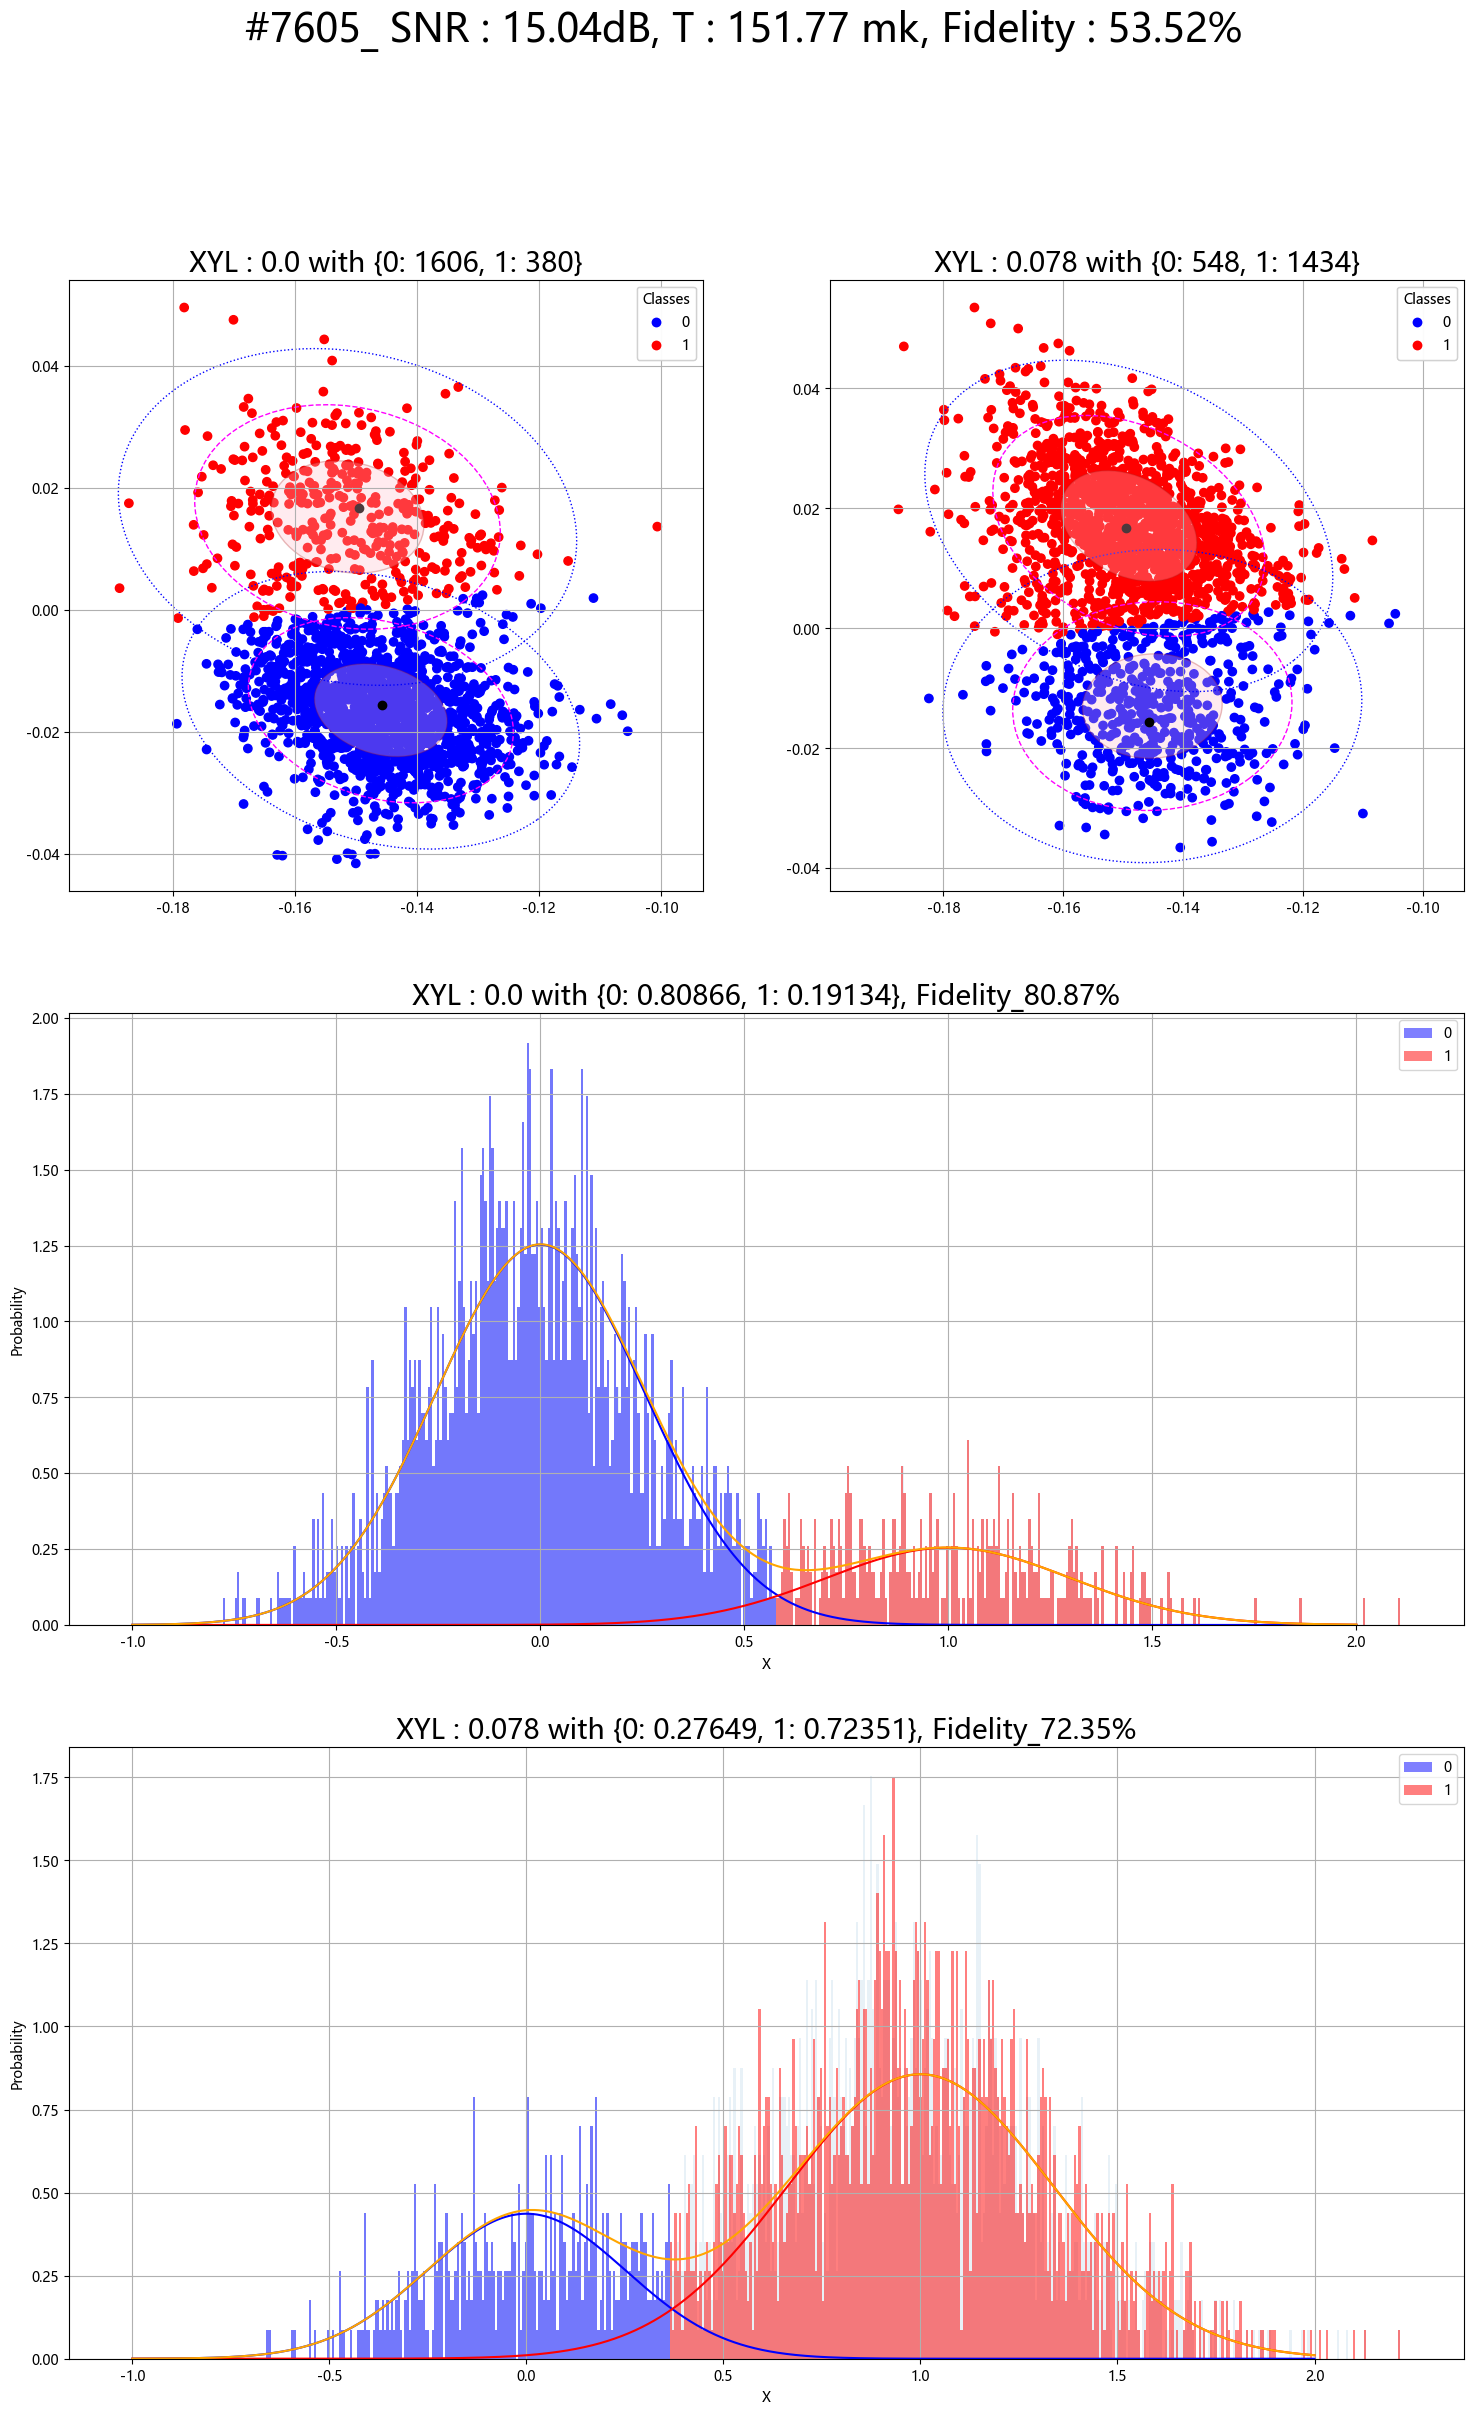

[[0.7991218714260822, 0.009538752944512008], [0.01567401451757007, 0.17566536111183578]]
[[0.25667707126377154, 0.019811324296268806], [0.022306345193469804, 0.7012052592464898]]


<Figure size 640x480 with 0 Axes>

In [10]:
kmeans, mark_kmeans,data3,label3,data4,label4,S_kmeans,N_kmeans,SNR_kmeans,SNR_dB_kmeans = kmeans_analytic(df,excited,ground)
jobid = pyqum.jobid
cluster_centers_kmeans,XYL,title,w_a = kmeans.cluster_centers_,[XYL_ground,XYL_excited],'',float(pyqum.rjson()['XYF'])
if mark_kmeans: 
    label3 = change_label(label3)
    label4 = change_label(label4)
unique3, counts3 = np.unique(label3, return_counts=True)
unique4, counts4 = np.unique(label4, return_counts=True)
plt.figure(figsize=(18, 27))
ax1 = plt.subplot(321)
ax1.axis('equal')
ax1.grid()
scatter1 = ax1.scatter(data3[:, 0],data3[:, 1],c=label3,cmap ='bwr')
legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes")
ax1.add_artist(legend1)
ax1.title.set_text("XYL : "+str(XYL[0])+" with "+str(dict(zip(unique3, counts3))))
ax1.title.set_size(20)
for i in range(len(cluster_centers)):
    confidence_ellipse(data3[label3==i][:, 0],data3[label3==i][:, 1], ax1, n_std=1,facecolor='pink', edgecolor='firebrick',alpha= 0.3)
    confidence_ellipse(data3[label3==i][:, 0],data3[label3==i][:, 1], ax1, n_std=2,edgecolor='fuchsia', linestyle='--')
    confidence_ellipse(data3[label3==i][:, 0],data3[label3==i][:, 1], ax1, n_std=3,edgecolor='blue', linestyle=':')
    ax1.scatter(cluster_centers_kmeans[i][0],cluster_centers_kmeans[i][1],color = "black")
ax2 = plt.subplot(322)
ax2.axis('equal')
ax2.grid()
scatter2 = ax2.scatter(data4[:, 0],data4[:, 1],c=label4,cmap ='bwr')
legend2 = ax2.legend(*scatter2.legend_elements(), title="Classes")
ax2.add_artist(legend2)
ax2.title.set_text("XYL : "+str(XYL[-1])+" with "+str(dict(zip(unique4, counts4))))
ax2.title.set_size(20)
for i in range(len(cluster_centers)):
    confidence_ellipse(data4[label4==i][:, 0],data4[label4==i][:, 1], ax2, n_std=1,facecolor='pink', edgecolor='firebrick',alpha= 0.3)
    confidence_ellipse(data4[label4==i][:, 0],data4[label4==i][:, 1], ax2, n_std=2,edgecolor='fuchsia', linestyle='--')
    confidence_ellipse(data4[label4==i][:, 0],data4[label4==i][:, 1], ax2, n_std=3,edgecolor='blue', linestyle=':')
    ax2.scatter(cluster_centers_kmeans[i][0],cluster_centers_kmeans[i][1],color = "black")

p0_3,p1_3 = counts3[0]/(counts3[0]+counts3[1]),counts3[1]/(counts3[0]+counts3[1])
p0_4,p1_4 = counts4[0]/(counts4[0]+counts4[1]),counts4[1]/(counts4[0]+counts4[1])
bins = 500
if mark_kmeans:
    refpoint = cluster_centers_kmeans[1]
    diff = cluster_centers_kmeans[0]-cluster_centers_kmeans[1]
else:
    refpoint = cluster_centers_kmeans[0]
    diff = cluster_centers_kmeans[1]-cluster_centers_kmeans[0]
data3_1D = (data3-refpoint)@diff/(scipy.linalg.norm(diff))**2
data4_1D = (data4-refpoint)@diff/(scipy.linalg.norm(diff))**2
x = np.linspace(-1,2,10000)
sigma0_3 = std_dev(data3_1D[data3_1D<=0],0)
sigma1_3= std_dev(data3_1D[data3_1D>=1],1)
sigma0_4 = std_dev(data4_1D[data4_1D<=0],0)
sigma1_4= std_dev(data2_1D[data4_1D>=1],1)
best_fit_line0_3 = scipy.stats.norm.pdf(x,0, sigma0_3)
best_fit_line1_3 = scipy.stats.norm.pdf(x,1, sigma1_3)
best_fit_line0_4 = scipy.stats.norm.pdf(x,0, sigma0_4)
best_fit_line1_4 = scipy.stats.norm.pdf(x,1, sigma1_4)
cdf0_3 = scipy.stats.norm.cdf(x,0, sigma0_3)
cdf1_3 = scipy.stats.norm.cdf(x,1, sigma1_3)
cdf0_4 = scipy.stats.norm.cdf(x,0, sigma0_4)
cdf1_4 = scipy.stats.norm.cdf(x,1, sigma1_4)
a =pd.DataFrame({'x':x,'y':p0_3*best_fit_line0_3-p1_3*best_fit_line1_3,'pdf0':p0_3*best_fit_line0_3,'pdf1':p1_3*best_fit_line1_3,'cdf0':p0_3*cdf0_3,'cdf1':p1_3*cdf1_3})
b =pd.DataFrame({'x':x,'y':p0_4*best_fit_line0_4-p1_4*best_fit_line1_4,'pdf0':p0_4*best_fit_line0_4,'pdf1':p1_4*best_fit_line1_4,'cdf0':p0_4*cdf0_4,'cdf1':p1_4*cdf1_4})
df_pdf_3 = a[(a['x']<1)&(a['x']>0)]
df_pdf_4 = b[(b['x']<1)&(b['x']>0)]
gg_3 = float(df_pdf_3.iloc[(df_pdf_3['y']).abs().argsort()[:1]]['cdf0'])
eg_3 = float(df_pdf_3.iloc[(df_pdf_3['y']).abs().argsort()[:1]]['cdf1'])
ge_3 = p0_3-gg_3
ee_3 = p1_3-eg_3
gg_4 = float(df_pdf_4.iloc[(df_pdf_4['y']).abs().argsort()[:1]]['cdf0'])
eg_4 = float(df_pdf_4.iloc[(df_pdf_4['y']).abs().argsort()[:1]]['cdf1'])
ge_4 = p0_4-gg_4
ee_4 = p1_4-eg_4
cut3 = float(df_pdf_3.iloc[(df_pdf_3['y']).abs().argsort()[:1]]['x'])
cut4 = float(df_pdf_4.iloc[(df_pdf_4['y']).abs().argsort()[:1]]['x'])

ax3 = plt.subplot(312)
ax3.grid()
n3,locbin3,patch3 =ax3.hist(data3_1D, bins, density=True,alpha=.1)
locbin3 = np.delete(locbin3, 0)
width3 = locbin3[1]-locbin3[0]
ax3.bar(locbin3[locbin3<cut3]-width1/2,n3[locbin3<cut3],width =width3,color='b',alpha =0.5,label=0)
ax3.bar(locbin3[locbin3>cut3]-width1/2,n3[locbin3>cut3],width =width3,color='r',alpha =0.5,label=1)
ax3.plot(x, p0_3*best_fit_line0_3,color='b')
ax3.plot(x, p1_3*best_fit_line1_3,color='r')
ax3.plot(x, p0_3*best_fit_line0_3+p1_3*best_fit_line1_3,color = 'orange')
ax3.legend()
ax3.set_xlabel("X")
ax3.set_ylabel("Probability")
ax3.title.set_text("XYL : "+str(XYL[0])+" with "+str(dict(zip(unique3, [round(p0_3,5),round(p1_3,5)])))+", Fidelity_{:.2f}%".format(100*p0_3))
ax3.title.set_size(20)

ax4 = plt.subplot(313)
ax4.grid()
n4,locbin4,patch4 =ax4.hist(data4_1D, bins, density=True,alpha=.1)
locbin4 = np.delete(locbin4, 0)
width4 = locbin4[1]-locbin4[0]
ax4.bar(locbin4[locbin4<cut4]-width4/2,n4[locbin4<cut4],width =width4,color='b',alpha =0.5,label=0)
ax4.bar(locbin4[locbin4>cut4]-width4/2,n2[locbin4>cut4],width =width4,color='r',alpha =0.5,label=1)
ax4.plot(x, p0_4*best_fit_line0_4,color='b')
ax4.plot(x, p1_4*best_fit_line1_4,color='r')
ax4.plot(x, p0_4*best_fit_line0_4+p1_4*best_fit_line1_4,color = 'orange')
ax4.legend()
ax4.set_xlabel("X")
ax4.set_ylabel("Probability")
ax4.title.set_text("XYL : "+str(XYL[-1])+" with "+str(dict(zip(unique4, [round(p0_4,5),round(p1_4,5)])))+", Fidelity_{:.2f}%".format(100*p1_4))
ax4.title.set_size(20)
T_kmeans= cal_Tmk(p1_3,w_a)
plt.suptitle("#{:d}_{:s} SNR : {:.2f}dB, T : {:.2f} mk, Fidelity : {:.2f}%".format(jobid,title,SNR_dB_kmeans,T_kmeans,100*(1-p1_1-p0_2)),fontsize=28)
sample_dir = "./"+samplename
if not exists(sample_dir):
    makedirs(sample_dir)
    print("Sample folder for output created!")
fig_dir = sample_dir+"/Figure/"
if not exists(fig_dir):
    makedirs(fig_dir)
# plt.savefig("D:\Experiment\self\week1_230214\#{:d}_{:s}.png".format(jobid,title))
plt.savefig(r".\figure\KMeans#{:d}_{:s}.png".format(jobid,title))
plt.show()
plt.clf()

print([[gg_3,ge_3],[eg_3,ee_3]])
print([[gg_4,ge_4],[eg_4,ee_4]])

In [11]:
model_dir = "./model/"
if not exists(model_dir):
    makedirs(model_dir)
kmeans_backup = kmeans, mark_kmeans,{'S':S_kmeans,'N':N_kmeans,'SNR':SNR_kmeans,'SNR_dB':SNR_dB_kmeans}
modelname_kmeans = model_dir+'kmeans_model.sav'
pickle.dump(kmeans_backup, open(modelname_kmeans, 'wb'))

In [41]:
x = np.zeros(2,2)
print(x)
for i in range(x.shape[0]):
    x[i] = [i+1,i+2]
print(x)

TypeError: Cannot interpret '2' as a data type

In [8]:
x = np.array([[1,1,1,1,1],[2,2,2,2,2]]).transpose()
y = np.array([[3,3,3,3,3],[4,4,4,4,4]]).transpose()
z = []
print(x.reshape(-1))
print(x.reshape(10))

[1 2 1 2 1 2 1 2 1 2]
[1 2 1 2 1 2 1 2 1 2]


In [43]:
x = "10"
print(10+(-int(x)));

0


In [7]:
for i in range(3):
    for j in range(3):
        for k in range(3):
            print(i+1,j+1,k+1)

1 1 1
1 1 2
1 1 3
1 2 1
1 2 2
1 2 3
1 3 1
1 3 2
1 3 3
2 1 1
2 1 2
2 1 3
2 2 1
2 2 2
2 2 3
2 3 1
2 3 2
2 3 3
3 1 1
3 1 2
3 1 3
3 2 1
3 2 2
3 2 3
3 3 1
3 3 2
3 3 3


In [8]:
x = np.zeros([3,3])
for i in range(3):
    for j in range(3):
        x[i] = np.array([i+1,i+2,i+3])
print(x)

[[1. 2. 3.]
 [2. 3. 4.]
 [3. 4. 5.]]


In [13]:
z = np.zeros([2,10])
x = np.array([[1,1,1,1,1],[2,2,2,2,2]]).transpose().reshape(-1)
y = np.array([[3,3,3,3,3],[4,4,4,4,4]]).transpose().reshape(-1)
z[0] = x
z[1] = y
print(x)
print(z)
print(z.reshape(-1))


[1 2 1 2 1 2 1 2 1 2]
[[1. 2. 1. 2. 1. 2. 1. 2. 1. 2.]
 [3. 4. 3. 4. 3. 4. 3. 4. 3. 4.]]
[1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 3. 4. 3. 4. 3. 4. 3. 4. 3. 4.]


In [40]:
def cal_amp(i,q):
    return np.sqrt(i**2+q**2)
def cal_pha(i,q):
    return np.arctan2(q,i)

def plot_results(df,e,g,xrange,yrange,title,saveornot):
    ground, excited = g,e
    ground_index, excited_index = 0,-1
    XYL_ground, XYL_excited = df['XYL'].unique()[ground_index],df['XYL'].unique()[excited_index]
    from tools.tool import gmm_analytic,confidence_ellipse_gmm,std_dev,cal_Tmk
    import scipy
    gmm, mark_gmm,data1,label1,data2,label2,S,N,SNR,SNR_dB = gmm_analytic(df,excited,ground,2)
#     print(np.unique(label1))
    gmm_para = gmm, mark_gmm,data1,label1,data2,label2,SNR
    jobid = pyqum.jobid
    cluster_centers,cov,XYL,w_a = gmm.means_,gmm.covariances_,[XYL_ground,XYL_excited],float(pyqum.rjson()['XYF'])
    print("center: ",cluster_centers)
    print("covariances: ",cov)
    
    if mark_gmm: 
        label1 = change_label(label1)
        label2 = change_label(label2)
    unique1, counts1 = np.unique(label1, return_counts=True)
    unique2, counts2 = np.unique(label2, return_counts=True)
    plt.figure(figsize=(18, 27))
    ax1 = plt.subplot(321)
    ax1.axis('equal')
    ax1.grid()
    scatter1 = ax1.scatter(data1[:, 0],data1[:, 1],c=label1,cmap ='bwr')#,cmap ='bwr',s=marker_size
    legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes")
    ax1.add_artist(legend1)
    ax1.title.set_text("XYL : "+str(XYL[0])+" with "+str(dict(zip(unique1, counts1))))
    ax1.title.set_size(20)
    ax1.set_xlim(xrange)
    ax1.set_ylim(yrange)
    for i in range(len(cluster_centers)):
        confidence_ellipse_gmm(cluster_centers[i],cov, ax1, n_std=1,edgecolor='pink',alpha= 0.5)
        confidence_ellipse_gmm(cluster_centers[i],cov, ax1, n_std=2,edgecolor='fuchsia', linestyle='--',alpha= 0.5)
        confidence_ellipse_gmm(cluster_centers[i],cov, ax1, n_std=3,edgecolor='blue', linestyle=':',alpha= 0.5)
        ax1.scatter(cluster_centers[i][0],cluster_centers[i][1],color = "black")
    ax2 = plt.subplot(322)
    ax2.axis('equal')
    ax2.grid()
    scatter2 = ax2.scatter(data2[:, 0],data2[:, 1],c=label2,cmap ='bwr')#,cmap ='bwr',s=marker_size
    legend2 = ax2.legend(*scatter2.legend_elements(), title="Classes")
    ax2.add_artist(legend2)
    ax2.title.set_text("XYL : "+str(XYL[-1])+" with "+str(dict(zip(unique2, counts2))))
    ax2.title.set_size(20)
    ax2.set_xlim(xrange)
    ax2.set_ylim(yrange)
    for i in range(len(cluster_centers)):
        confidence_ellipse_gmm(cluster_centers[i],cov, ax2, n_std=1,edgecolor='pink',alpha= 0.5)
        confidence_ellipse_gmm(cluster_centers[i],cov, ax2, n_std=2,edgecolor='fuchsia', linestyle='--',alpha= 0.5)
        confidence_ellipse_gmm(cluster_centers[i],cov, ax2, n_std=3,edgecolor='blue', linestyle=':',alpha= 0.5)
        ax2.scatter(cluster_centers[i][0],cluster_centers[i][1],color = "black")

    p0_1,p1_1 = counts1[0]/(counts1[0]+counts1[1]),counts1[1]/(counts1[0]+counts1[1])
    p0_2,p1_2 = counts2[0]/(counts2[0]+counts2[1]),counts2[1]/(counts2[0]+counts2[1])
    bins = 100
    if mark_gmm:
        refpoint = cluster_centers[1]
        diff = cluster_centers[0]-cluster_centers[1]
    else:
        refpoint = cluster_centers[0]
        diff = cluster_centers[1]-cluster_centers[0]
    # select groups which i want with label, often label = 0 and 1
    data1_1D = (data1-refpoint)@diff/(scipy.linalg.norm(diff))**2
    data2_1D = (data2-refpoint)@diff/(scipy.linalg.norm(diff))**2
    x = np.linspace(-1,2,10000)
    # sigma0_1 = std_dev(data1_1D[data1_1D<=0],0)
    # sigma1_1= std_dev(data1_1D[data1_1D>=1],1)
    # sigma0_2 = std_dev(data2_1D[data2_1D<=0],0)
    # sigma1_2= std_dev(data2_1D[data2_1D>=1],1)


    d = scipy.linalg.norm(diff)  # distance between g & e center
#     print(gmm.means_)
    v = gmm.means_[1]-gmm.means_[0]
    rotation_matrix = np.array([[ v[0]/d,  -v[1]/d],[ v[1]/d,  v[0]/d]])
    cov = rotation_matrix @ gmm.covariances_ @ rotation_matrix.T/(d**2) # normalized rotated conv matrix
    sigma = np.sqrt(cov[0][0])

    best_fit_line0 = scipy.stats.norm.pdf(x,0, sigma)
    best_fit_line1 = scipy.stats.norm.pdf(x,1, sigma)

    cdf0 = scipy.stats.norm.cdf(x,0, sigma)   # cumulative distribution function
    cdf1 = scipy.stats.norm.cdf(x,1, sigma)

    # y-> 機率相減, pdf0->blue, pedf1->red, cdf0->cumulative blue, cdf1->cumulative red
    a =pd.DataFrame({'x':x,'y':p0_1*best_fit_line0-p1_1*best_fit_line1,'pdf0':p0_1*best_fit_line0,'pdf1':p1_1*best_fit_line1,'cdf0':p0_1*cdf0,'cdf1':p1_1*cdf1})
    b =pd.DataFrame({'x':x,'y':p0_2*best_fit_line0-p1_2*best_fit_line1,'pdf0':p0_2*best_fit_line0,'pdf1':p1_2*best_fit_line1,'cdf0':p0_2*cdf0,'cdf1':p1_2*cdf1})

    # 鎖定中間交錯部分，0<x<1
    df_pdf = a[(a['x']<1)&(a['x']>0)]
    df_pdf_2 = b[(b['x']<1)&(b['x']>0)]
    # 藍線紅線最接近的 x, 在鎖定部分
    cut = float(df_pdf.iloc[(df_pdf['y']).abs().argsort()[:1]]['x'])
    cut2 = float(df_pdf_2.iloc[(df_pdf_2['y']).abs().argsort()[:1]]['x'])

    gg = float(df_pdf.iloc[(df_pdf['y']).abs().argsort()[:1]]['cdf0'])
    eg = float(df_pdf.iloc[(df_pdf['y']).abs().argsort()[:1]]['cdf1'])
    ge = p0_1-gg
    ee = p1_1-eg
    gg_2 = float(df_pdf_2.iloc[(df_pdf_2['y']).abs().argsort()[:1]]['cdf0'])
    eg_2 = float(df_pdf_2.iloc[(df_pdf_2['y']).abs().argsort()[:1]]['cdf1'])
    ge_2 = p0_2-gg_2
    ee_2 = p1_2-eg_2

    ax3 = plt.subplot(312)
    ax3.grid()
    n1,locbin1,patch1 =ax3.hist(data1_1D, bins, density=True,alpha=.1)
    locbin1 = np.delete(locbin1, 0)
    width1 = locbin1[1]-locbin1[0]
    ax3.bar(locbin1[locbin1<cut]-width1/2,n1[locbin1<cut],width =width1,color='b',alpha =0.5,label=0)
    ax3.bar(locbin1[locbin1>cut]-width1/2,n1[locbin1>cut],width =width1,color='r',alpha =0.5,label=1)
    ax3.plot(x, p0_1*best_fit_line0,color='b')
    ax3.plot(x, p1_1*best_fit_line1,color='r')
    ax3.plot(x, p0_1*best_fit_line0+p1_1*best_fit_line1,color = 'orange')
    ax3.legend()
    ax3.set_xlabel("X")
    ax3.set_ylabel("probability density")
    ax3.title.set_text("XYL : "+str(XYL[0])+" with "+str(dict(zip(unique1, [round(p0_1,5),round(p1_1,5)])))+", Fidelity_{:.2f}%".format(100*p0_1 ))
    ax3.title.set_size(20)

    ax4 = plt.subplot(313)
    ax4.grid()
    n2,locbin2,patch2 =ax4.hist(data2_1D, bins, density=True,alpha=.1)
    locbin2 = np.delete(locbin2, 0)
    width2 = locbin2[1]-locbin2[0]
    ax4.bar(locbin2[locbin2<cut2]-width2/2,n2[locbin2<cut2],width =width2,color='b',alpha =0.5,label=0)
    ax4.bar(locbin2[locbin2>cut2]-width2/2,n2[locbin2>cut2],width =width2,color='r',alpha =0.5,label=1)
    ax4.plot(x, p0_2*best_fit_line0,color='b')
    ax4.plot(x, p1_2*best_fit_line1,color='r')
    ax4.plot(x, p0_2*best_fit_line0+p1_2*best_fit_line1,color = 'orange')
    ax4.legend()
    ax4.set_xlabel("X")
    ax4.set_ylabel("probability density")
    ax4.title.set_text("XYL : "+str(XYL[-1])+" with "+str(dict(zip(unique2, [round(p0_2,5),round(p1_2,5)])))+", Fidelity_{:.2f}%".format(100*p1_2))
    ax4.title.set_size(20)
    T= cal_Tmk(p1_1,w_a)
    plt.suptitle("#{:d}_{:s} SNR : {:.2f}dB, T : {:.2f} mk, Fidelity : {:.2f}%".format(jobid,title,SNR_dB,T,100*(1-p1_1-p0_2)),fontsize=28)
    # sample_dir = "./"+samplename
    # if not exists(sample_dir):
    #     makedirs(sample_dir)
    #     print("Sample folder for output created!")
    # fig_dir = sample_dir+"/Figure/"
    # if not exists(fig_dir):
    #     makedirs(fig_dir)
    # plt.savefig("D:\Experiment\self\week1_230214\#{:d}_{:s}.png".format(jobid,title))
    if saveornot :
        plt.savefig(title+".png")
    plt.show()
    plt.clf()
    return T

S :  0.82860115461355  ; N :  0.06421756896465272  ; SNR :  10.691464726807432
center:  [[-0.1508062  -0.12611235]
 [-0.97062141 -0.24645726]]
covariances:  [[ 0.03177312 -0.00123383]
 [-0.00123383  0.0308753 ]]


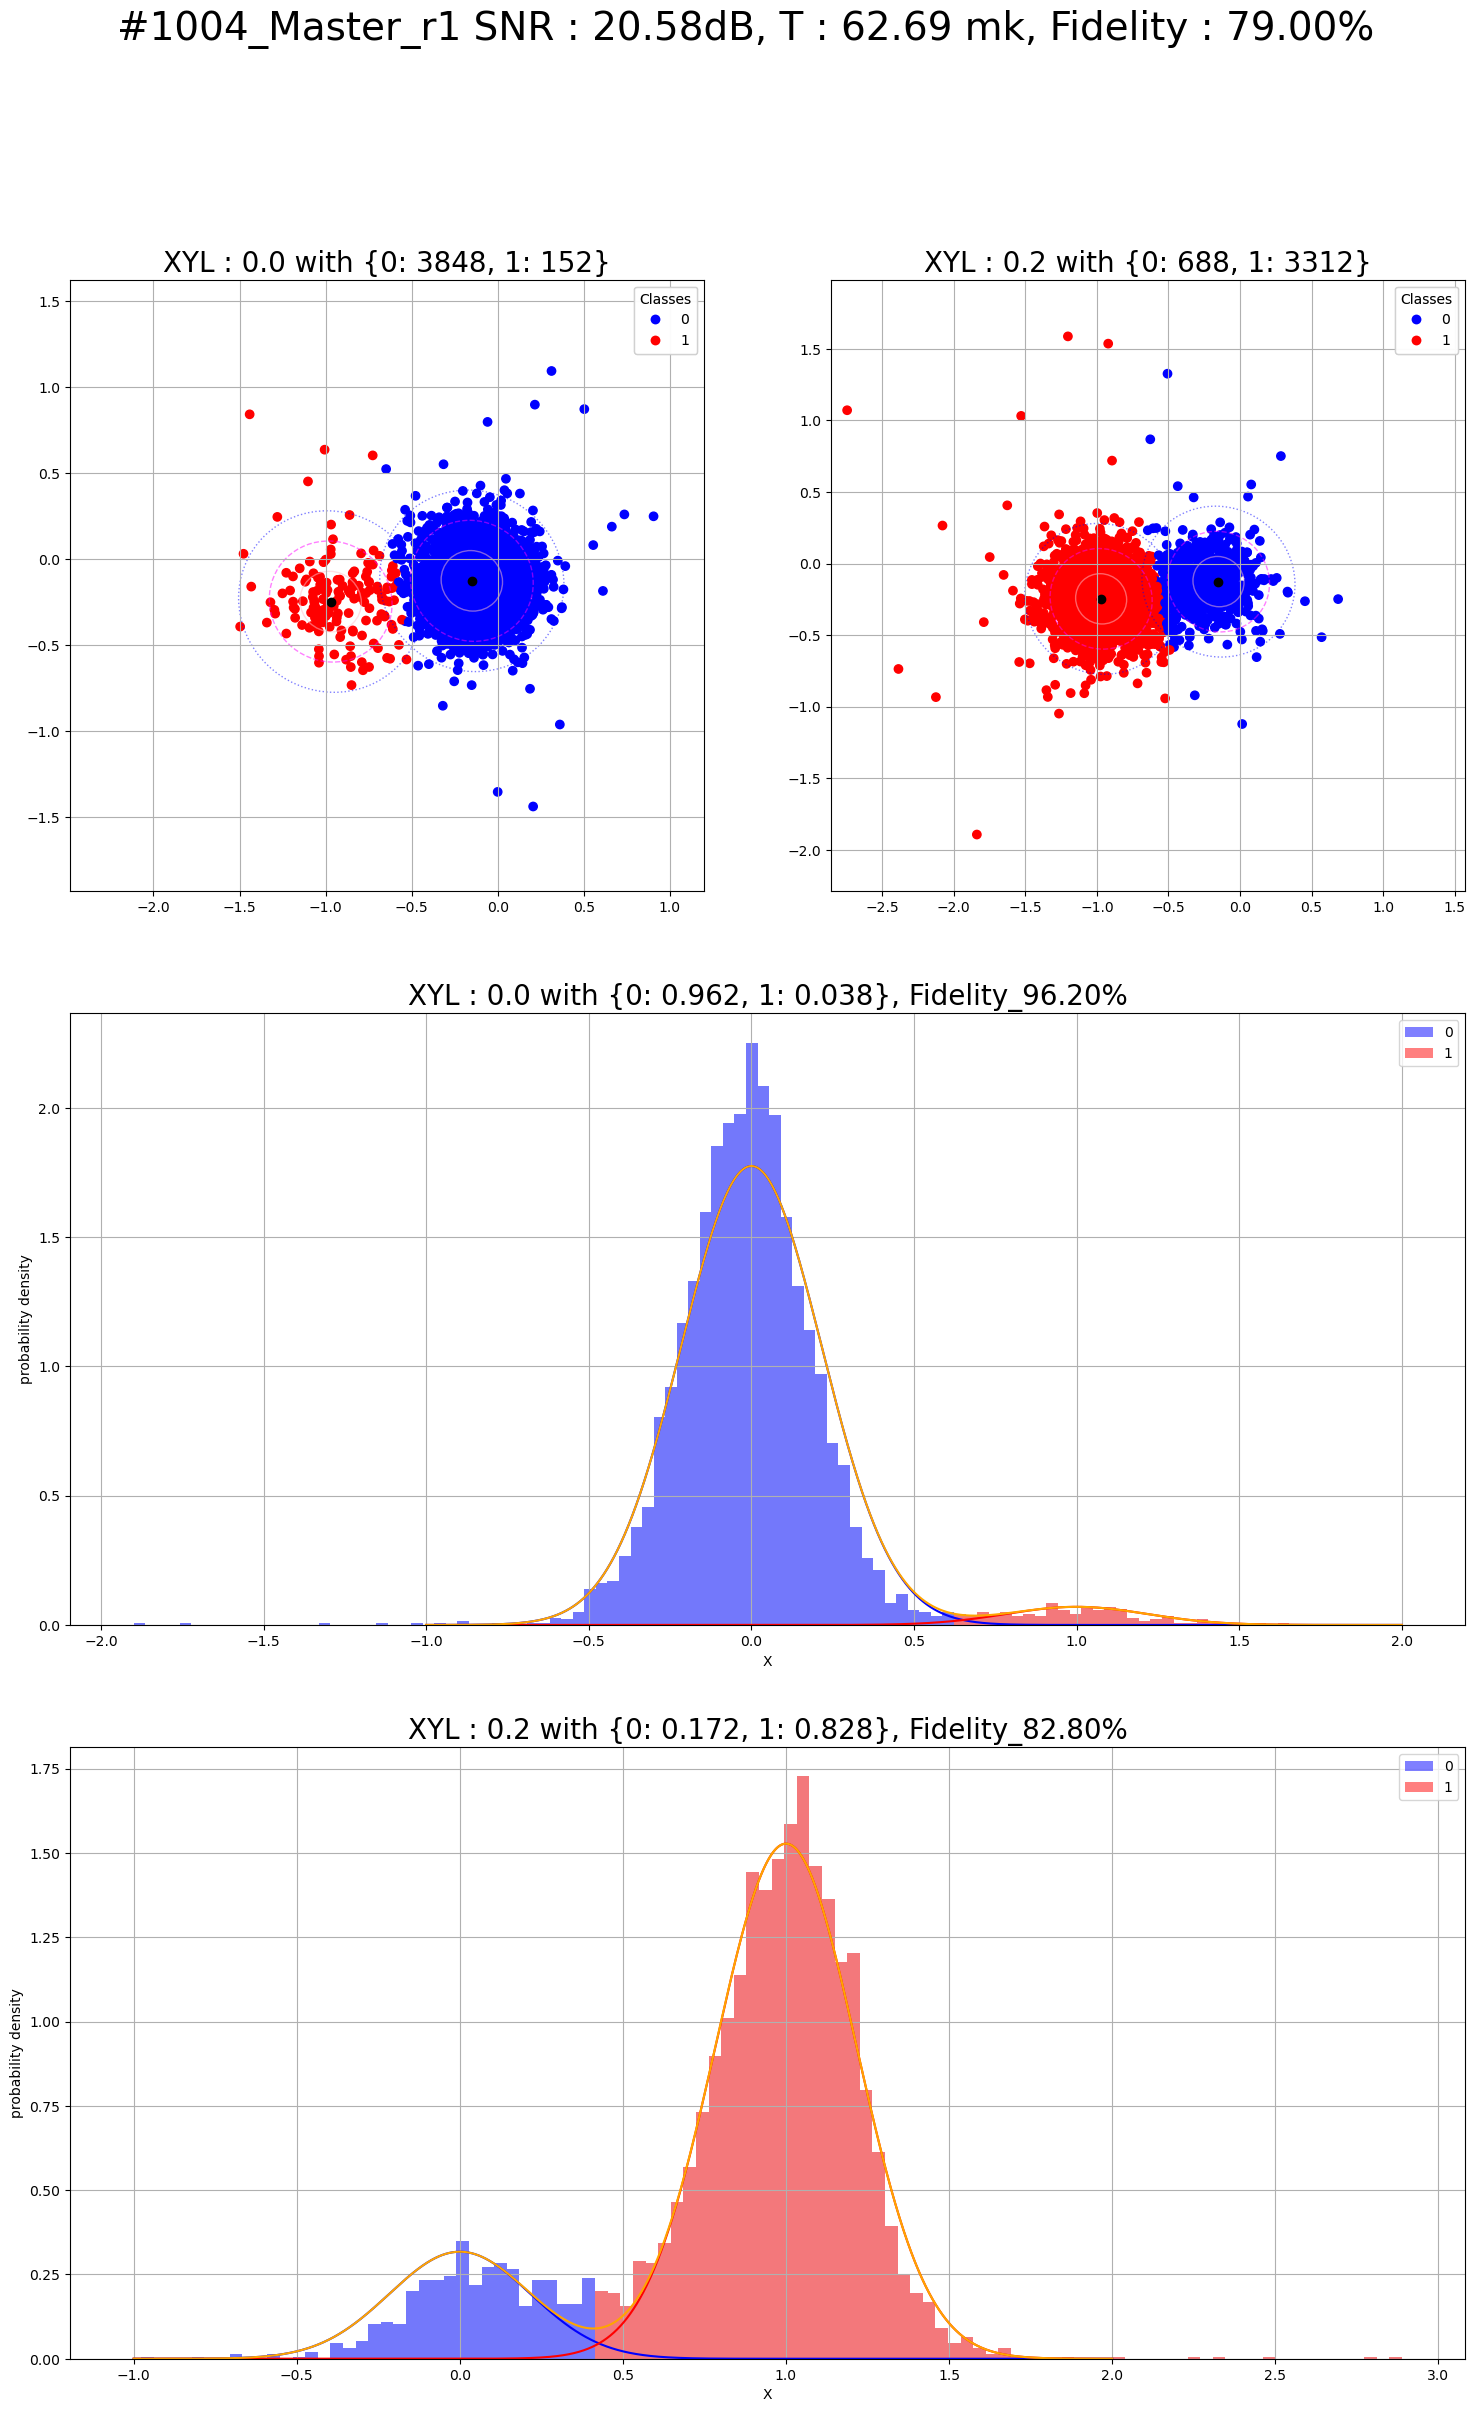

S :  0.8357823487471114  ; N :  0.062657389590023  ; SNR :  11.148439777779478
center:  [[-0.14284816 -0.12242061]
 [-0.96952989 -0.24542243]]
covariances:  [[ 0.03129176 -0.00029038]
 [-0.00029038  0.02909369]]


<Figure size 640x480 with 0 Axes>

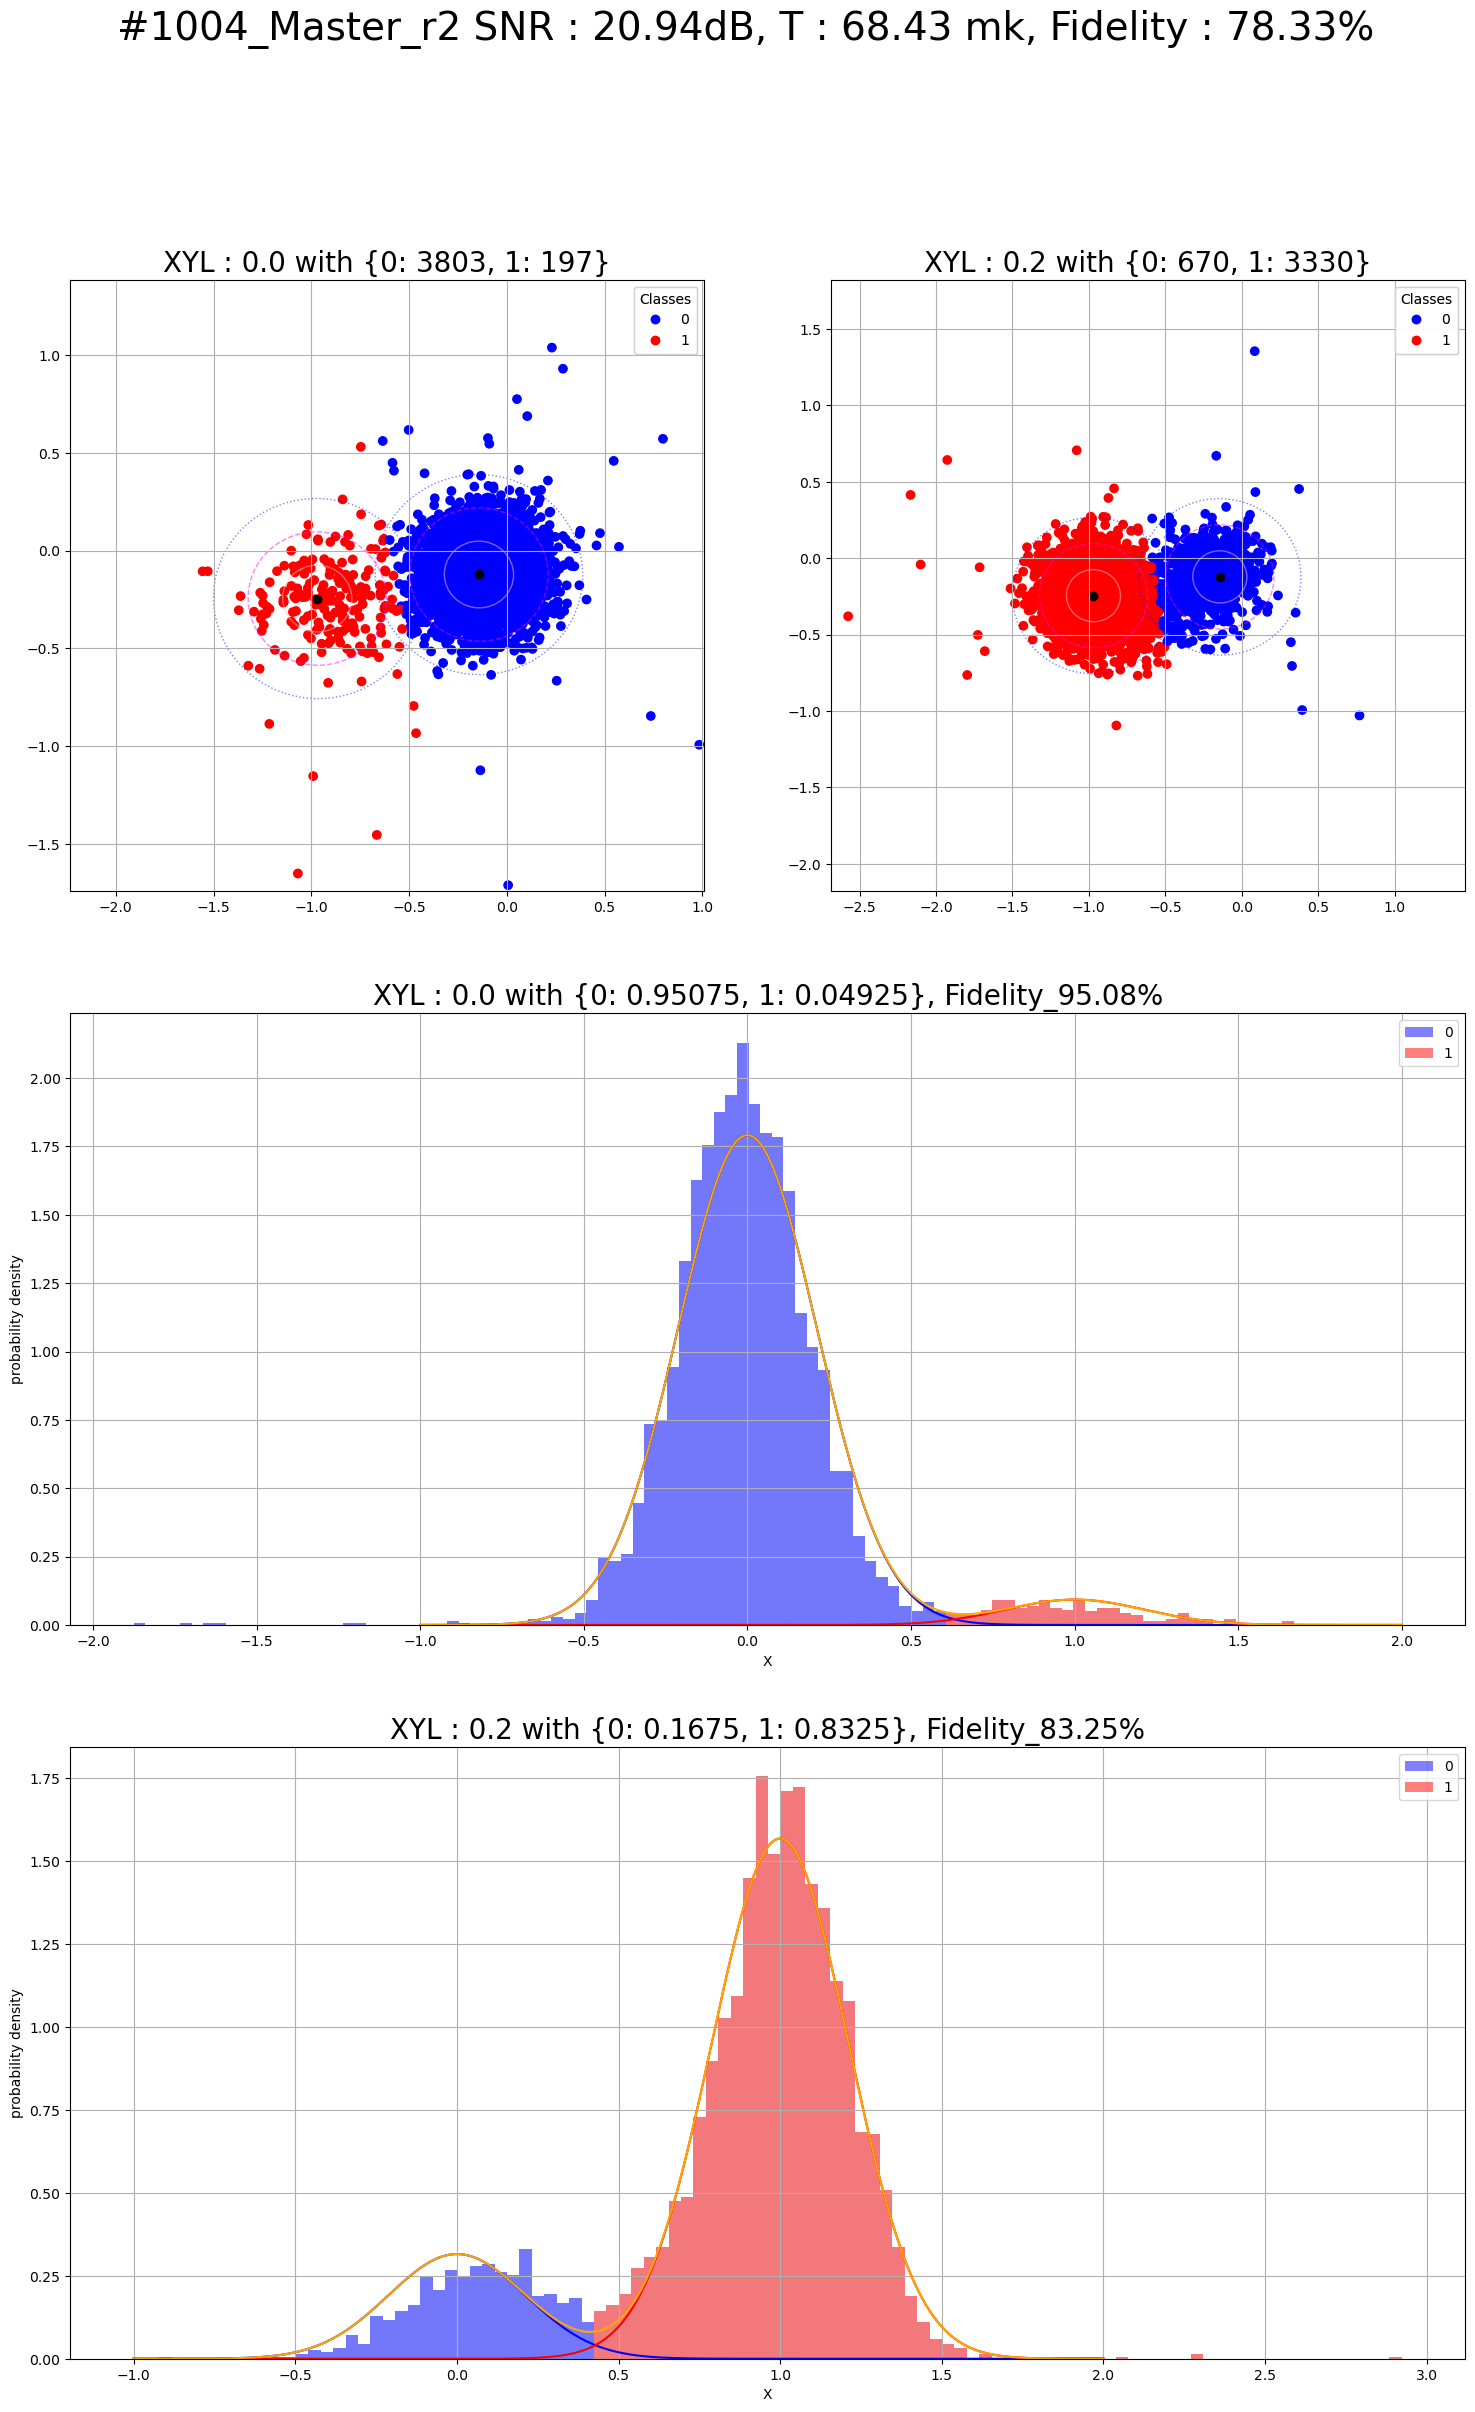

S :  0.8280034605980375  ; N :  0.0581935337326755  ; SNR :  11.7812012226604
center:  [[-0.96687745 -0.24529607]
 [-0.14748217 -0.12621166]]
covariances:  [[2.91303076e-02 4.44168803e-05]
 [4.44168803e-05 2.81200171e-02]]


<Figure size 640x480 with 0 Axes>

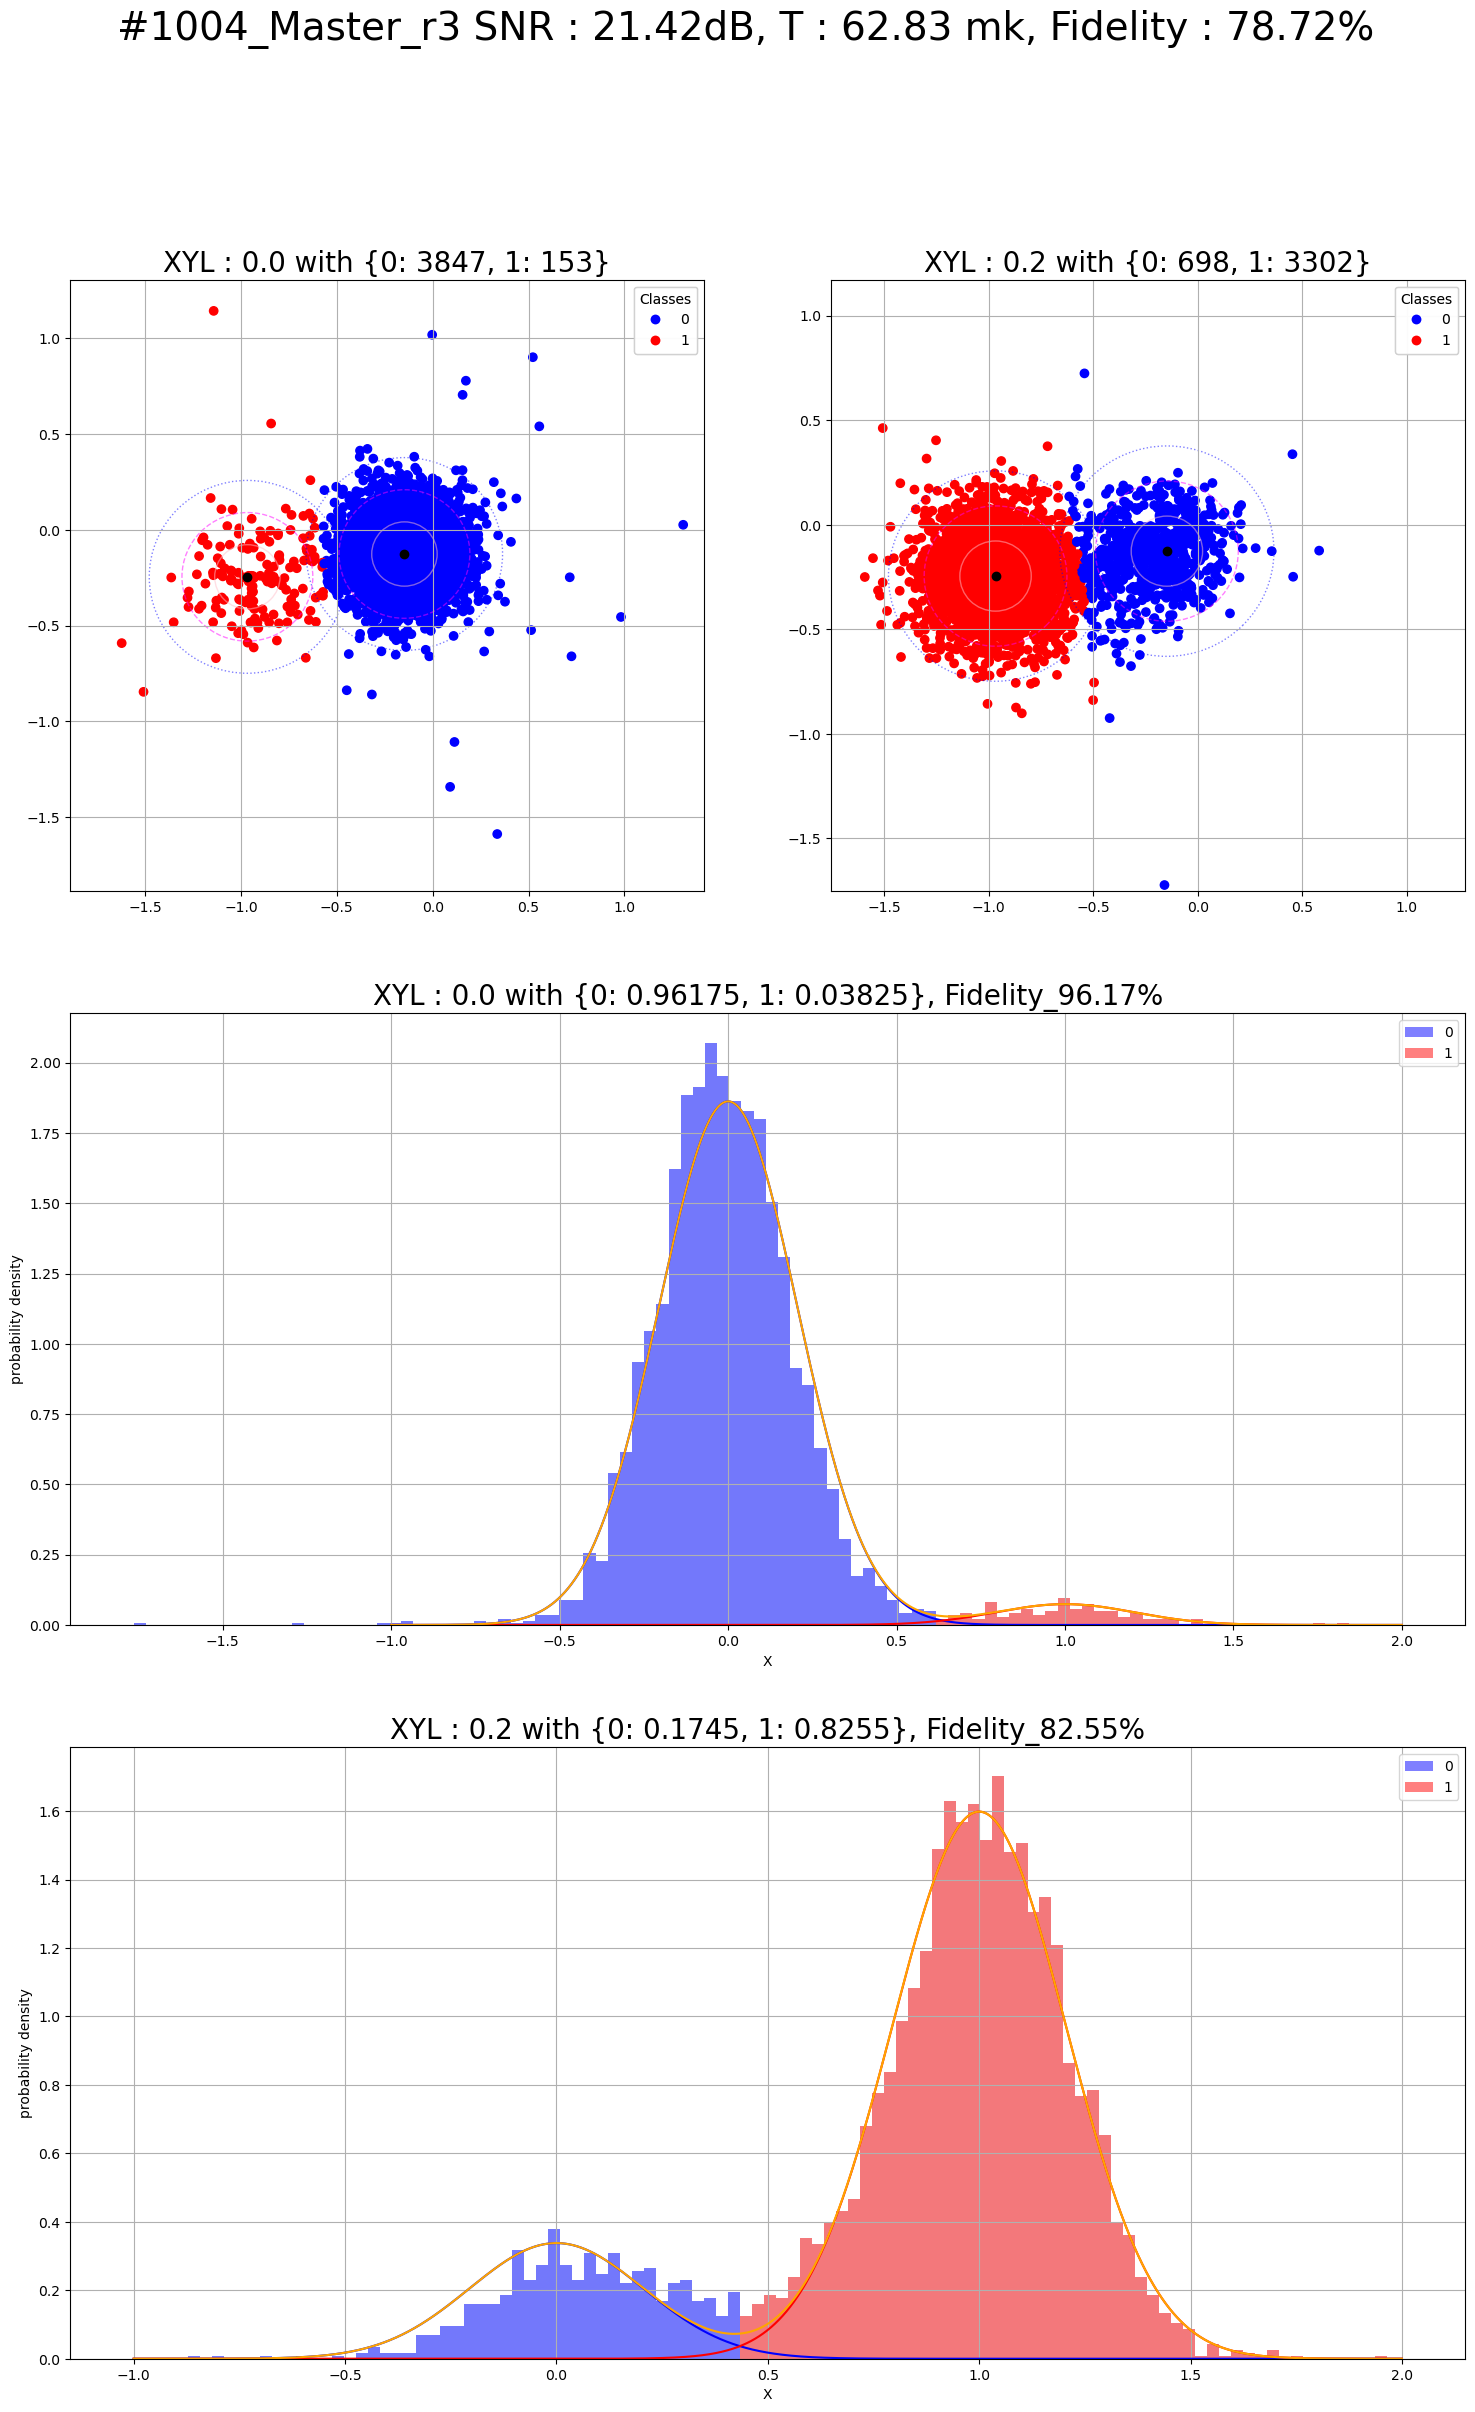

S :  0.8276159076270929  ; N :  0.06890032584837787  ; SNR :  9.941144430357475
center:  [[-0.15171359 -0.123777  ]
 [-0.97117118 -0.23969655]]
covariances:  [[ 0.03419682 -0.00098063]
 [-0.00098063  0.03324598]]


<Figure size 640x480 with 0 Axes>

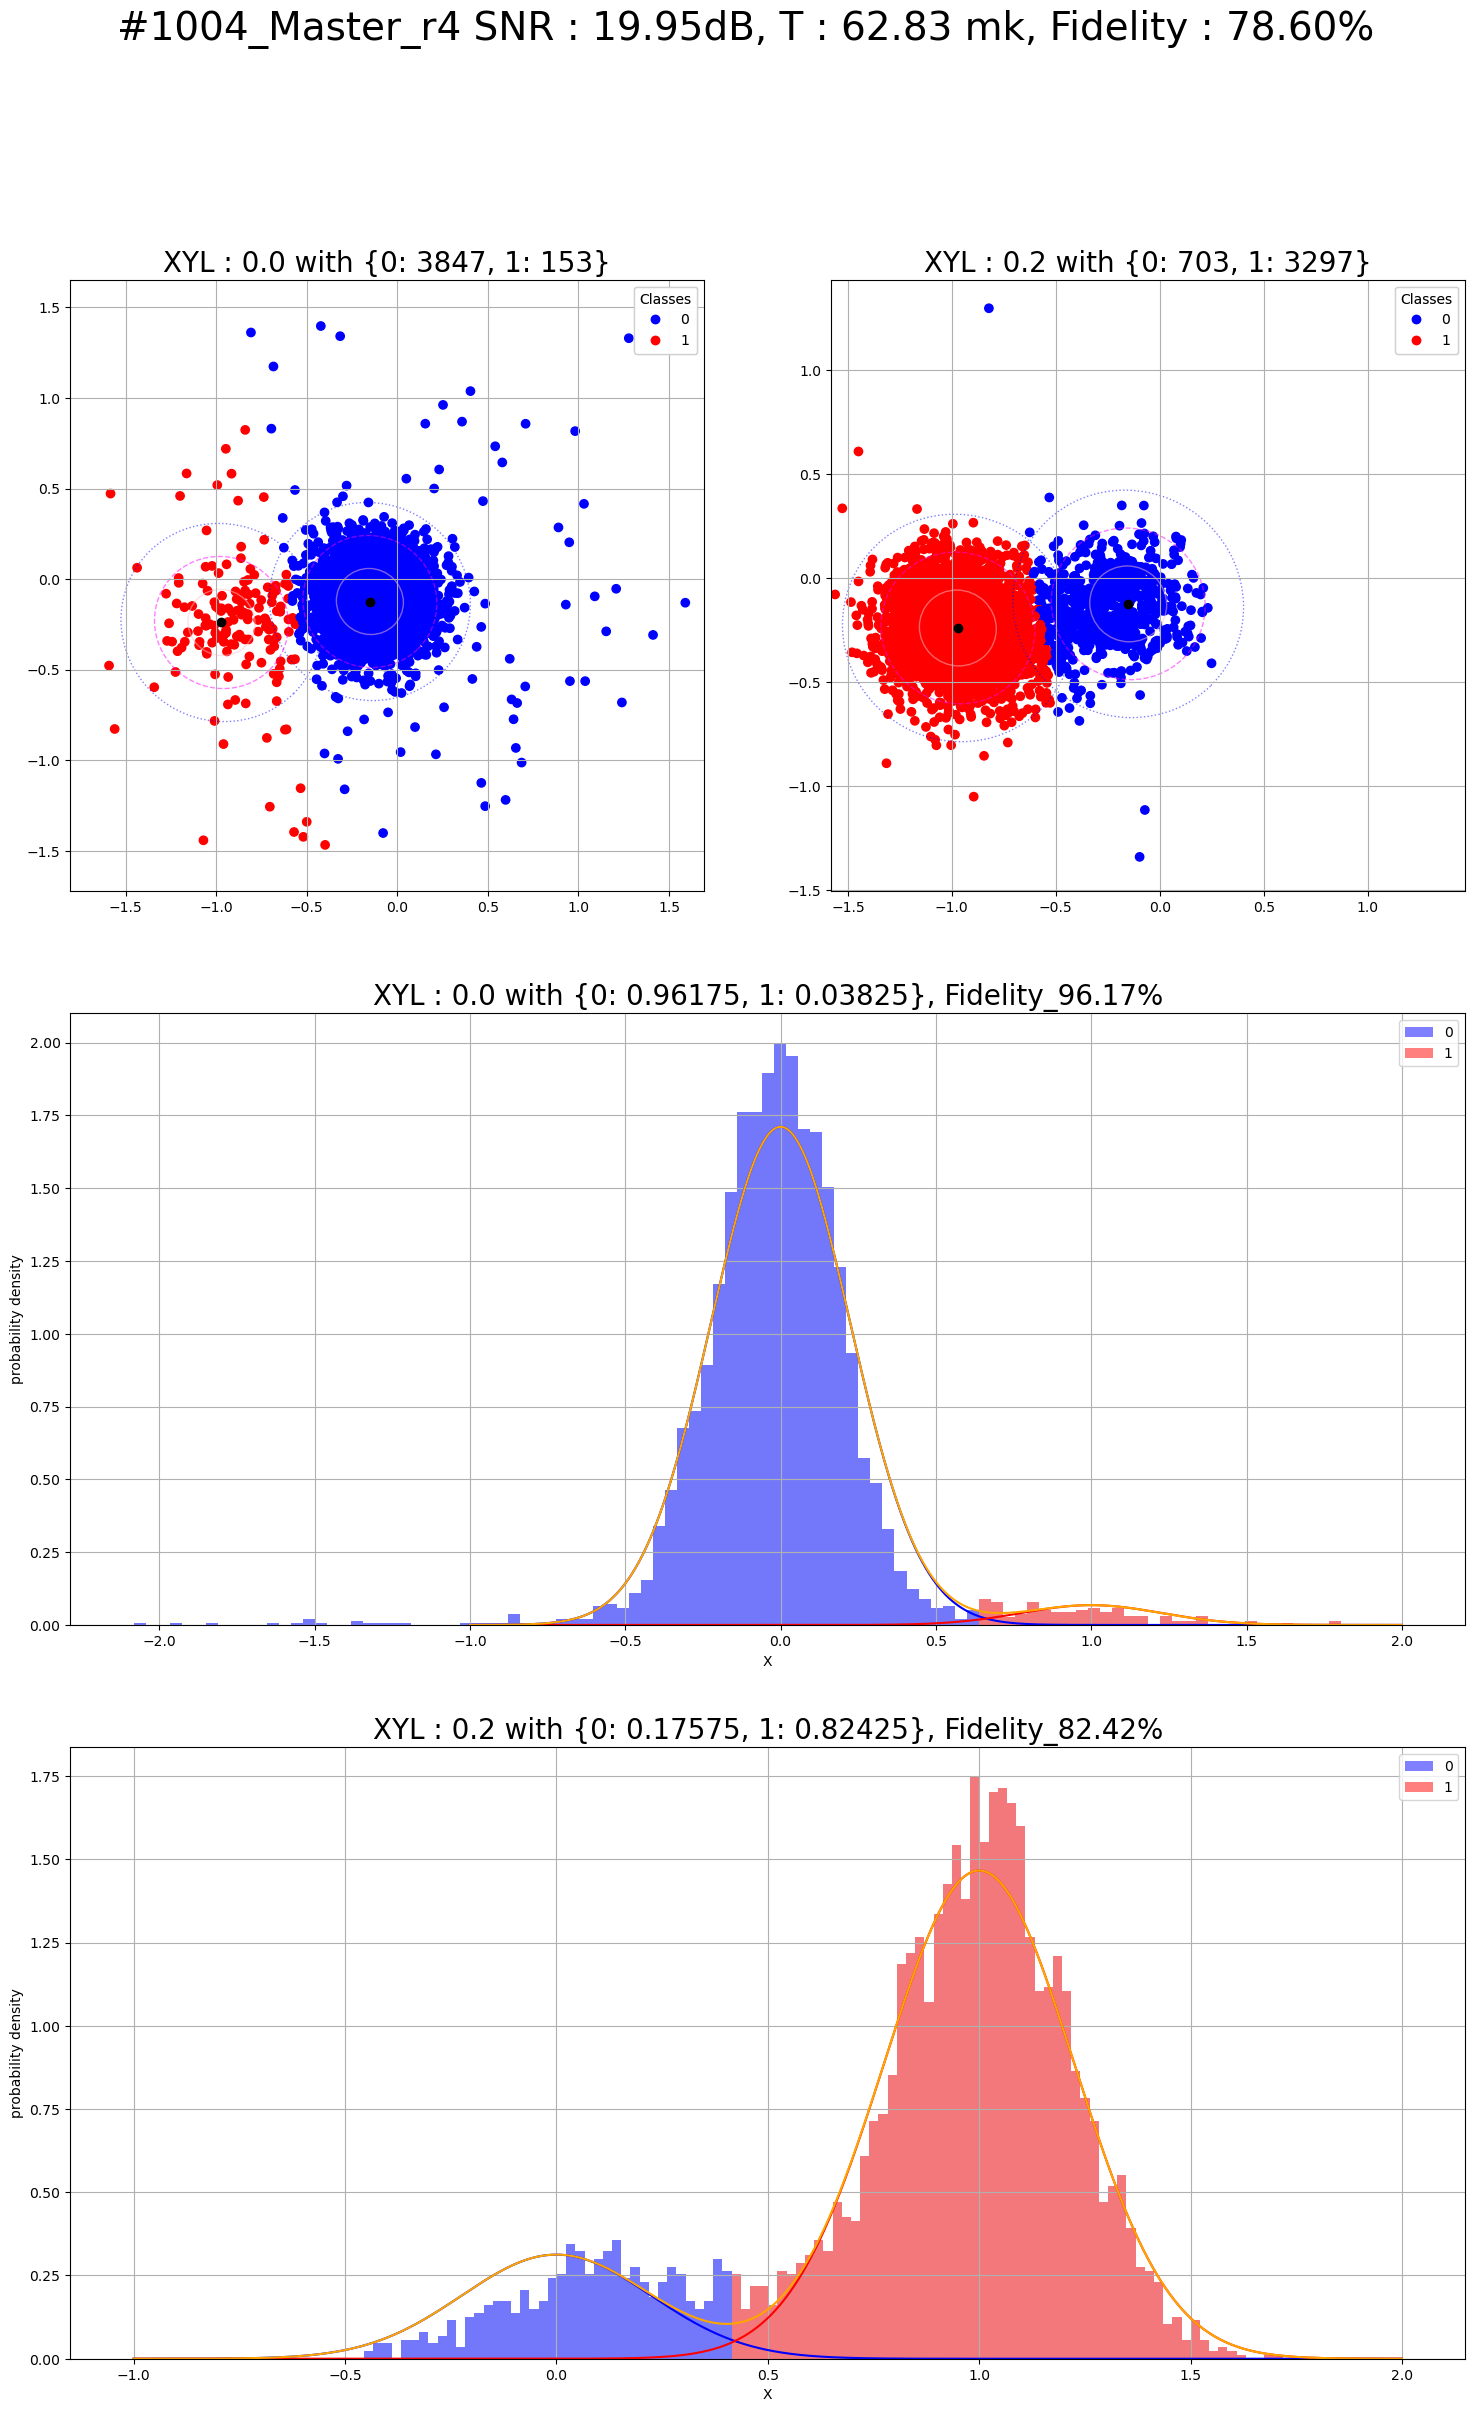

S :  0.8260010579682142  ; N :  0.05999107982738589  ; SNR :  11.372986612805555
center:  [[-0.97307704 -0.23894374]
 [-0.15467755 -0.12714027]]
covariances:  [[ 0.02982517 -0.00069258]
 [-0.00069258  0.02898507]]


<Figure size 640x480 with 0 Axes>

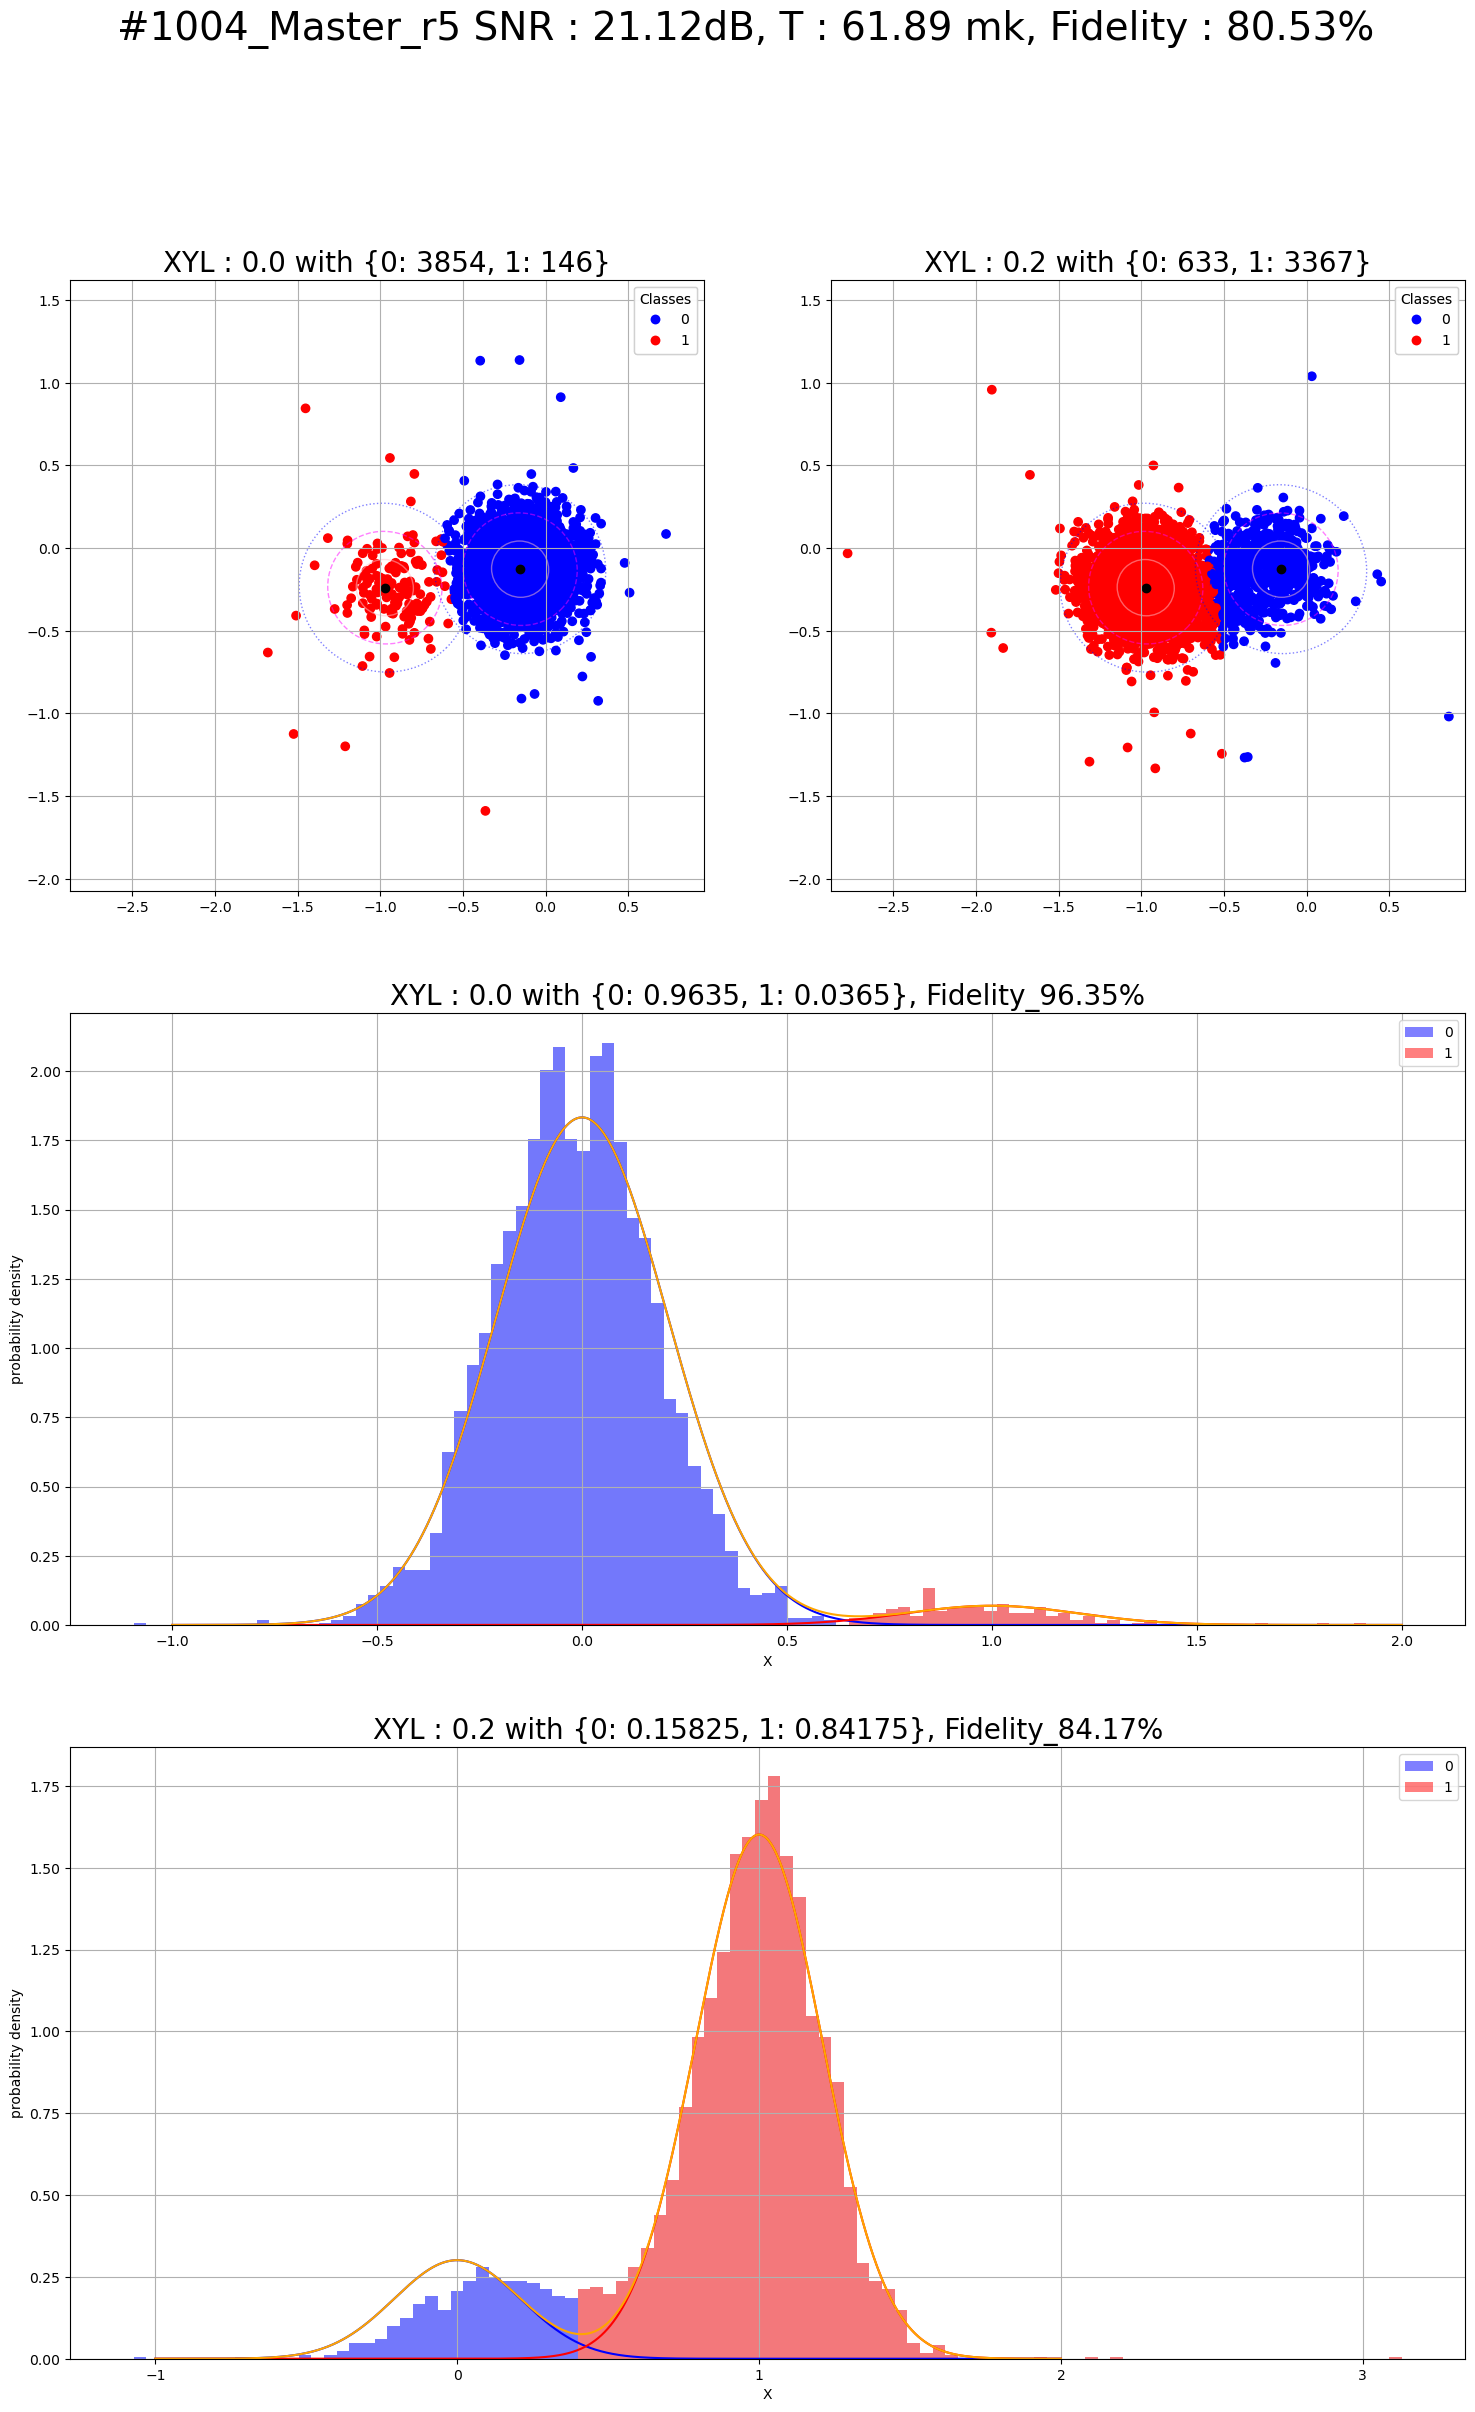

S :  0.8189267712026909  ; N :  0.06223799781686022  ; SNR :  10.775427875521862
center:  [[-0.15698422 -0.11800581]
 [-0.96523349 -0.24981693]]
covariances:  [[ 0.03070704 -0.00129647]
 [-0.00129647  0.0307092 ]]


<Figure size 640x480 with 0 Axes>

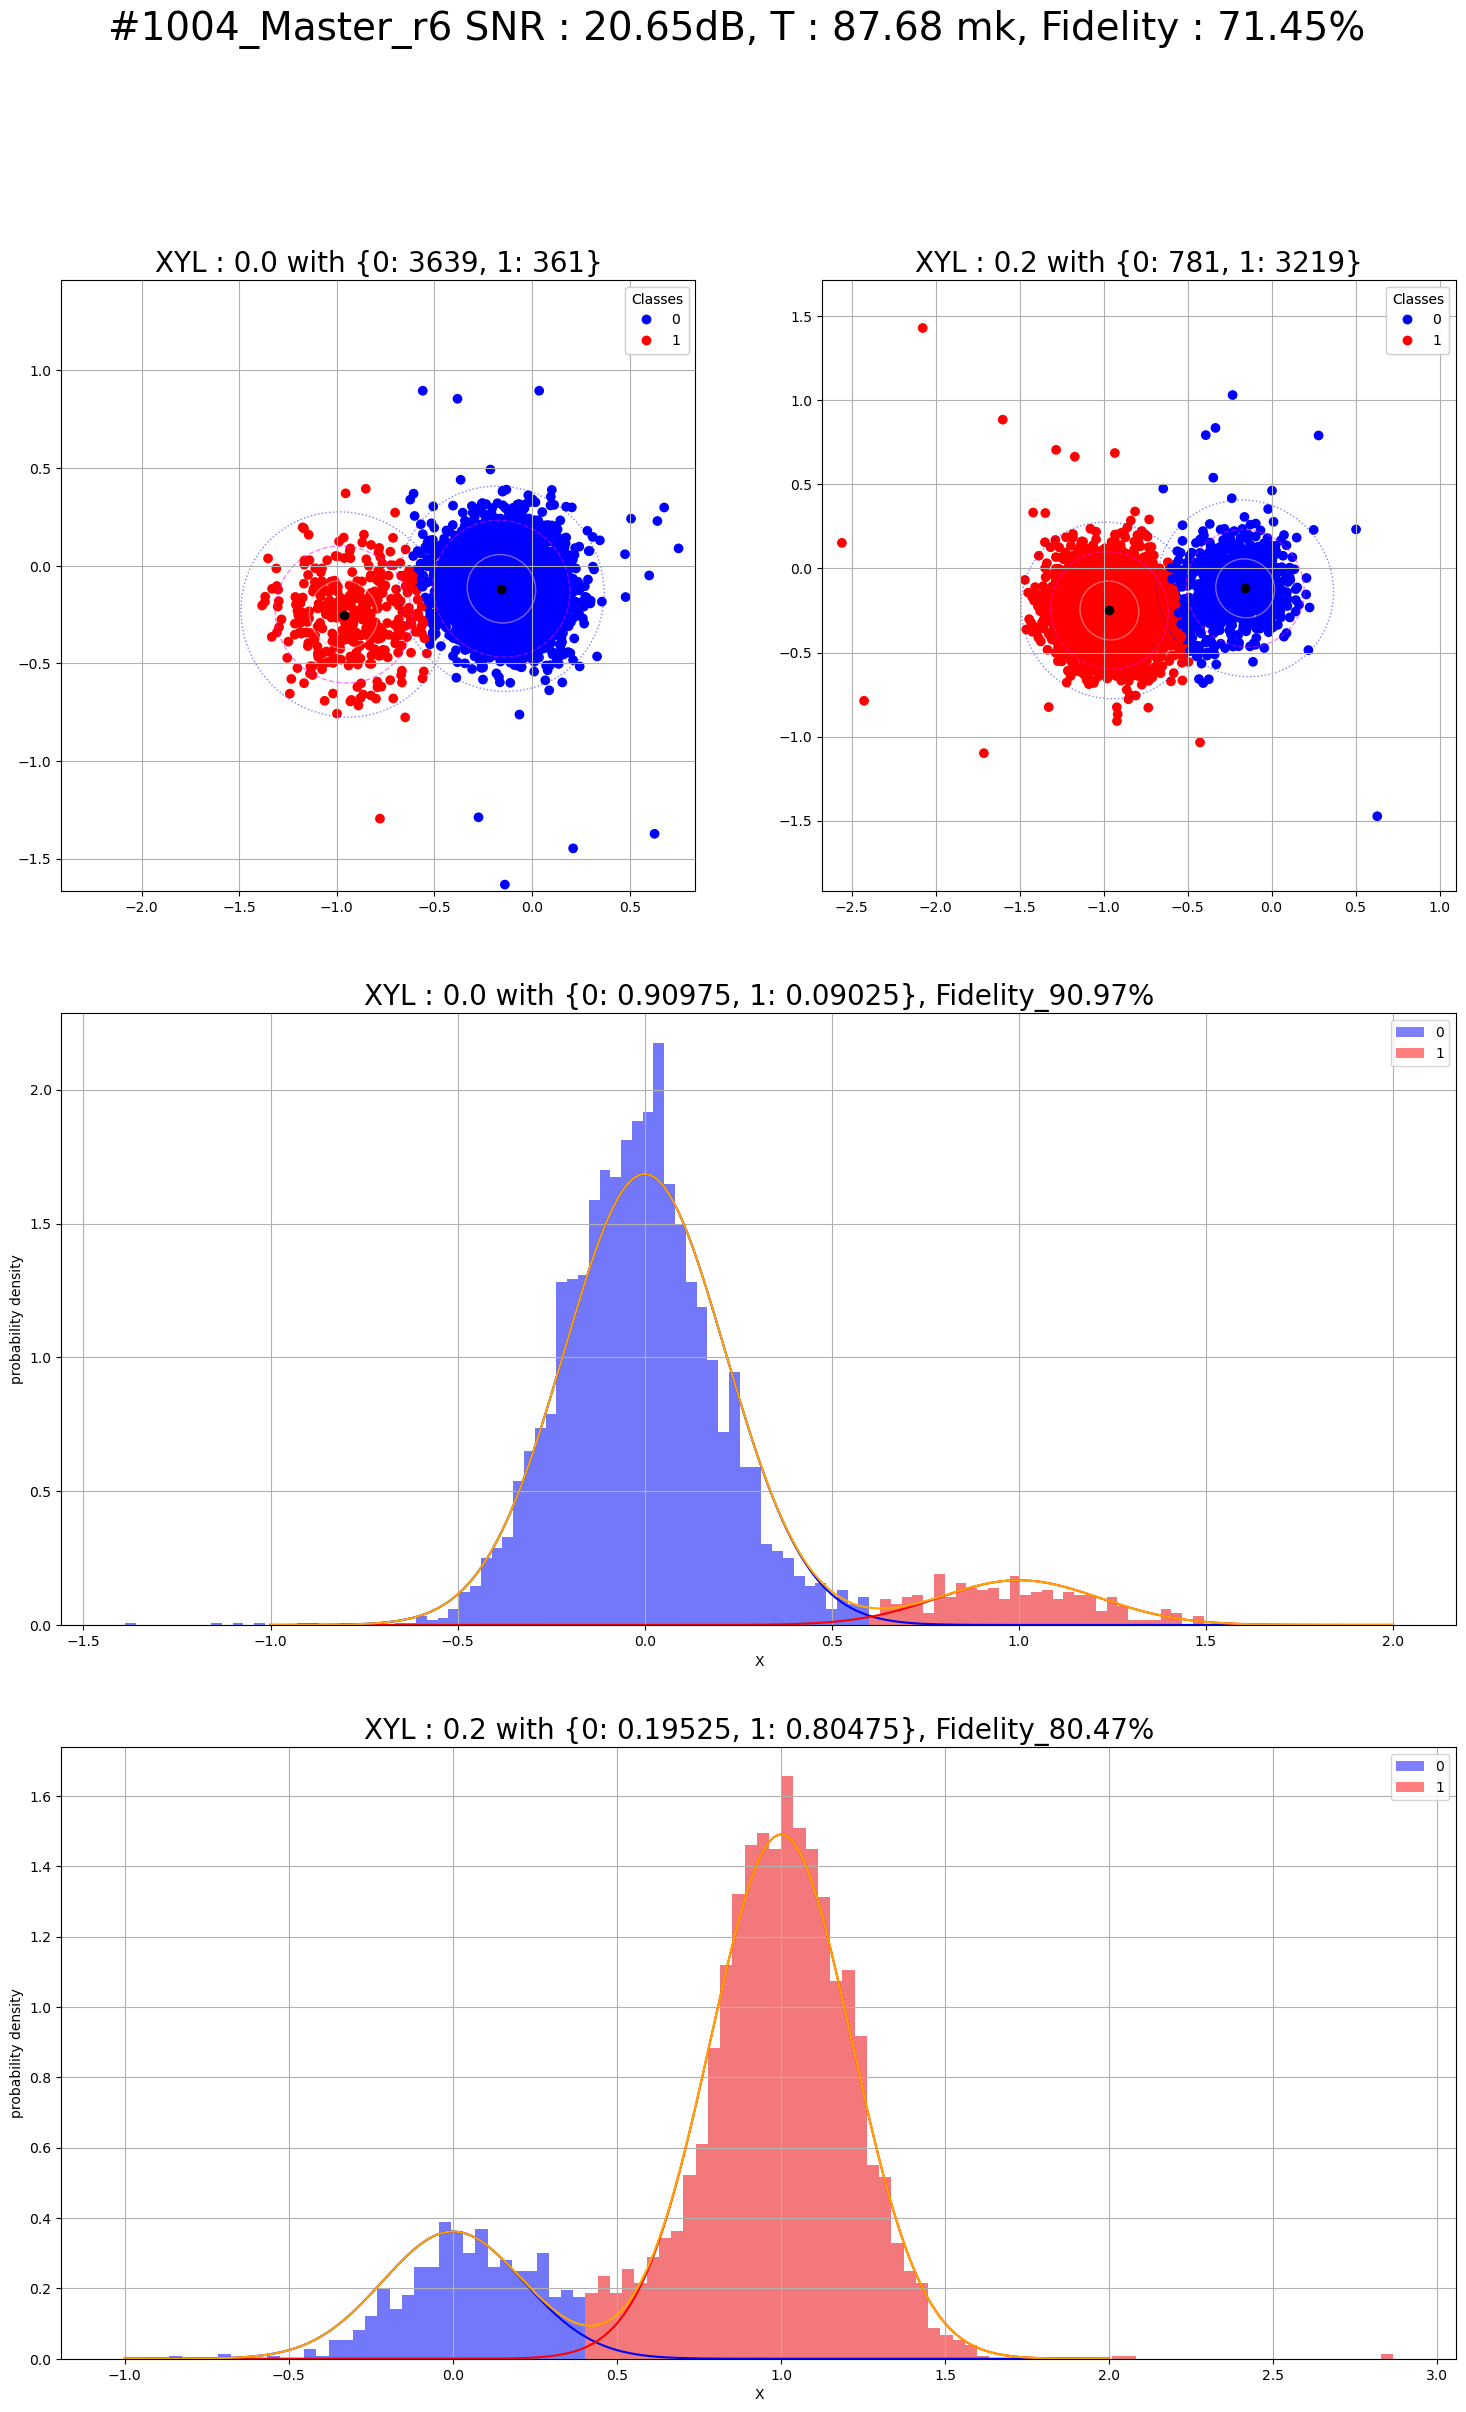

S :  0.8277285503797985  ; N :  0.061618725010772694  ; SNR :  11.1189342686669
center:  [[-0.15335928 -0.11347618]
 [-0.9703149  -0.24658542]]
covariances:  [[ 0.03052192 -0.00103061]
 [-0.00103061  0.02898639]]


<Figure size 640x480 with 0 Axes>

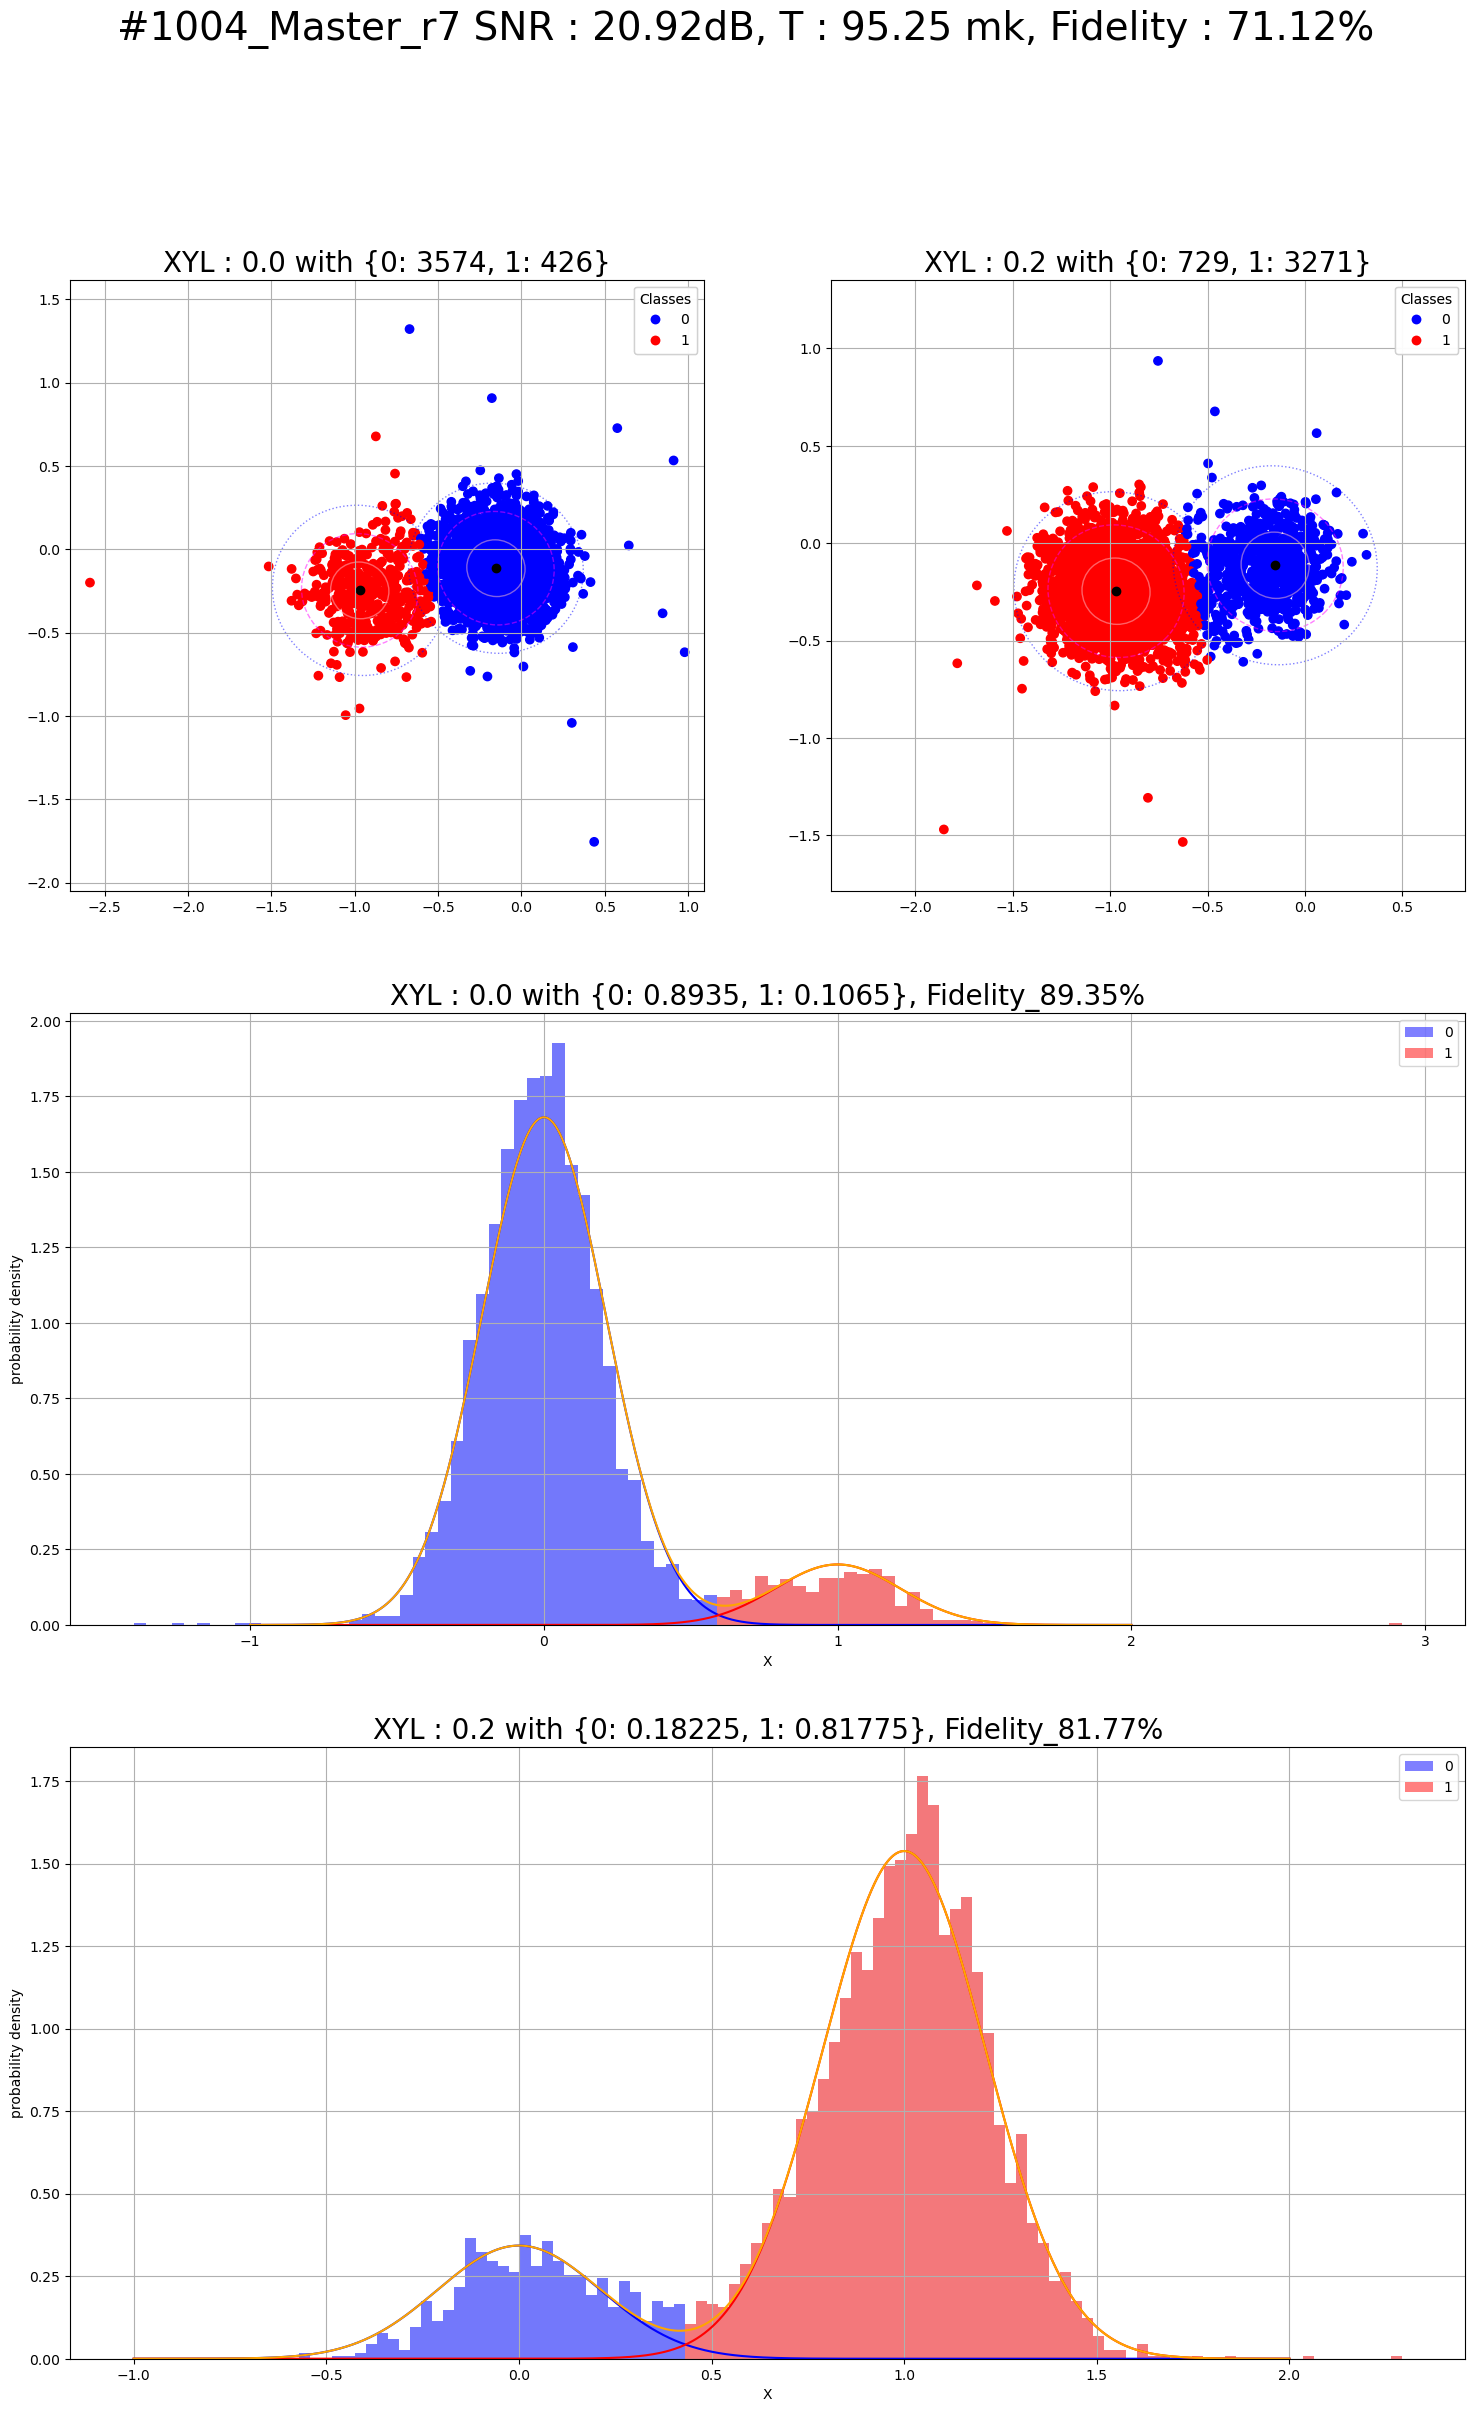

S :  0.8205171993930029  ; N :  0.06432385737808574  ; SNR :  10.46654386011843
center:  [[-0.15663871 -0.11378208]
 [-0.96630894 -0.24675803]]
covariances:  [[ 0.03199951 -0.0006693 ]
 [-0.0006693   0.03003306]]


<Figure size 640x480 with 0 Axes>

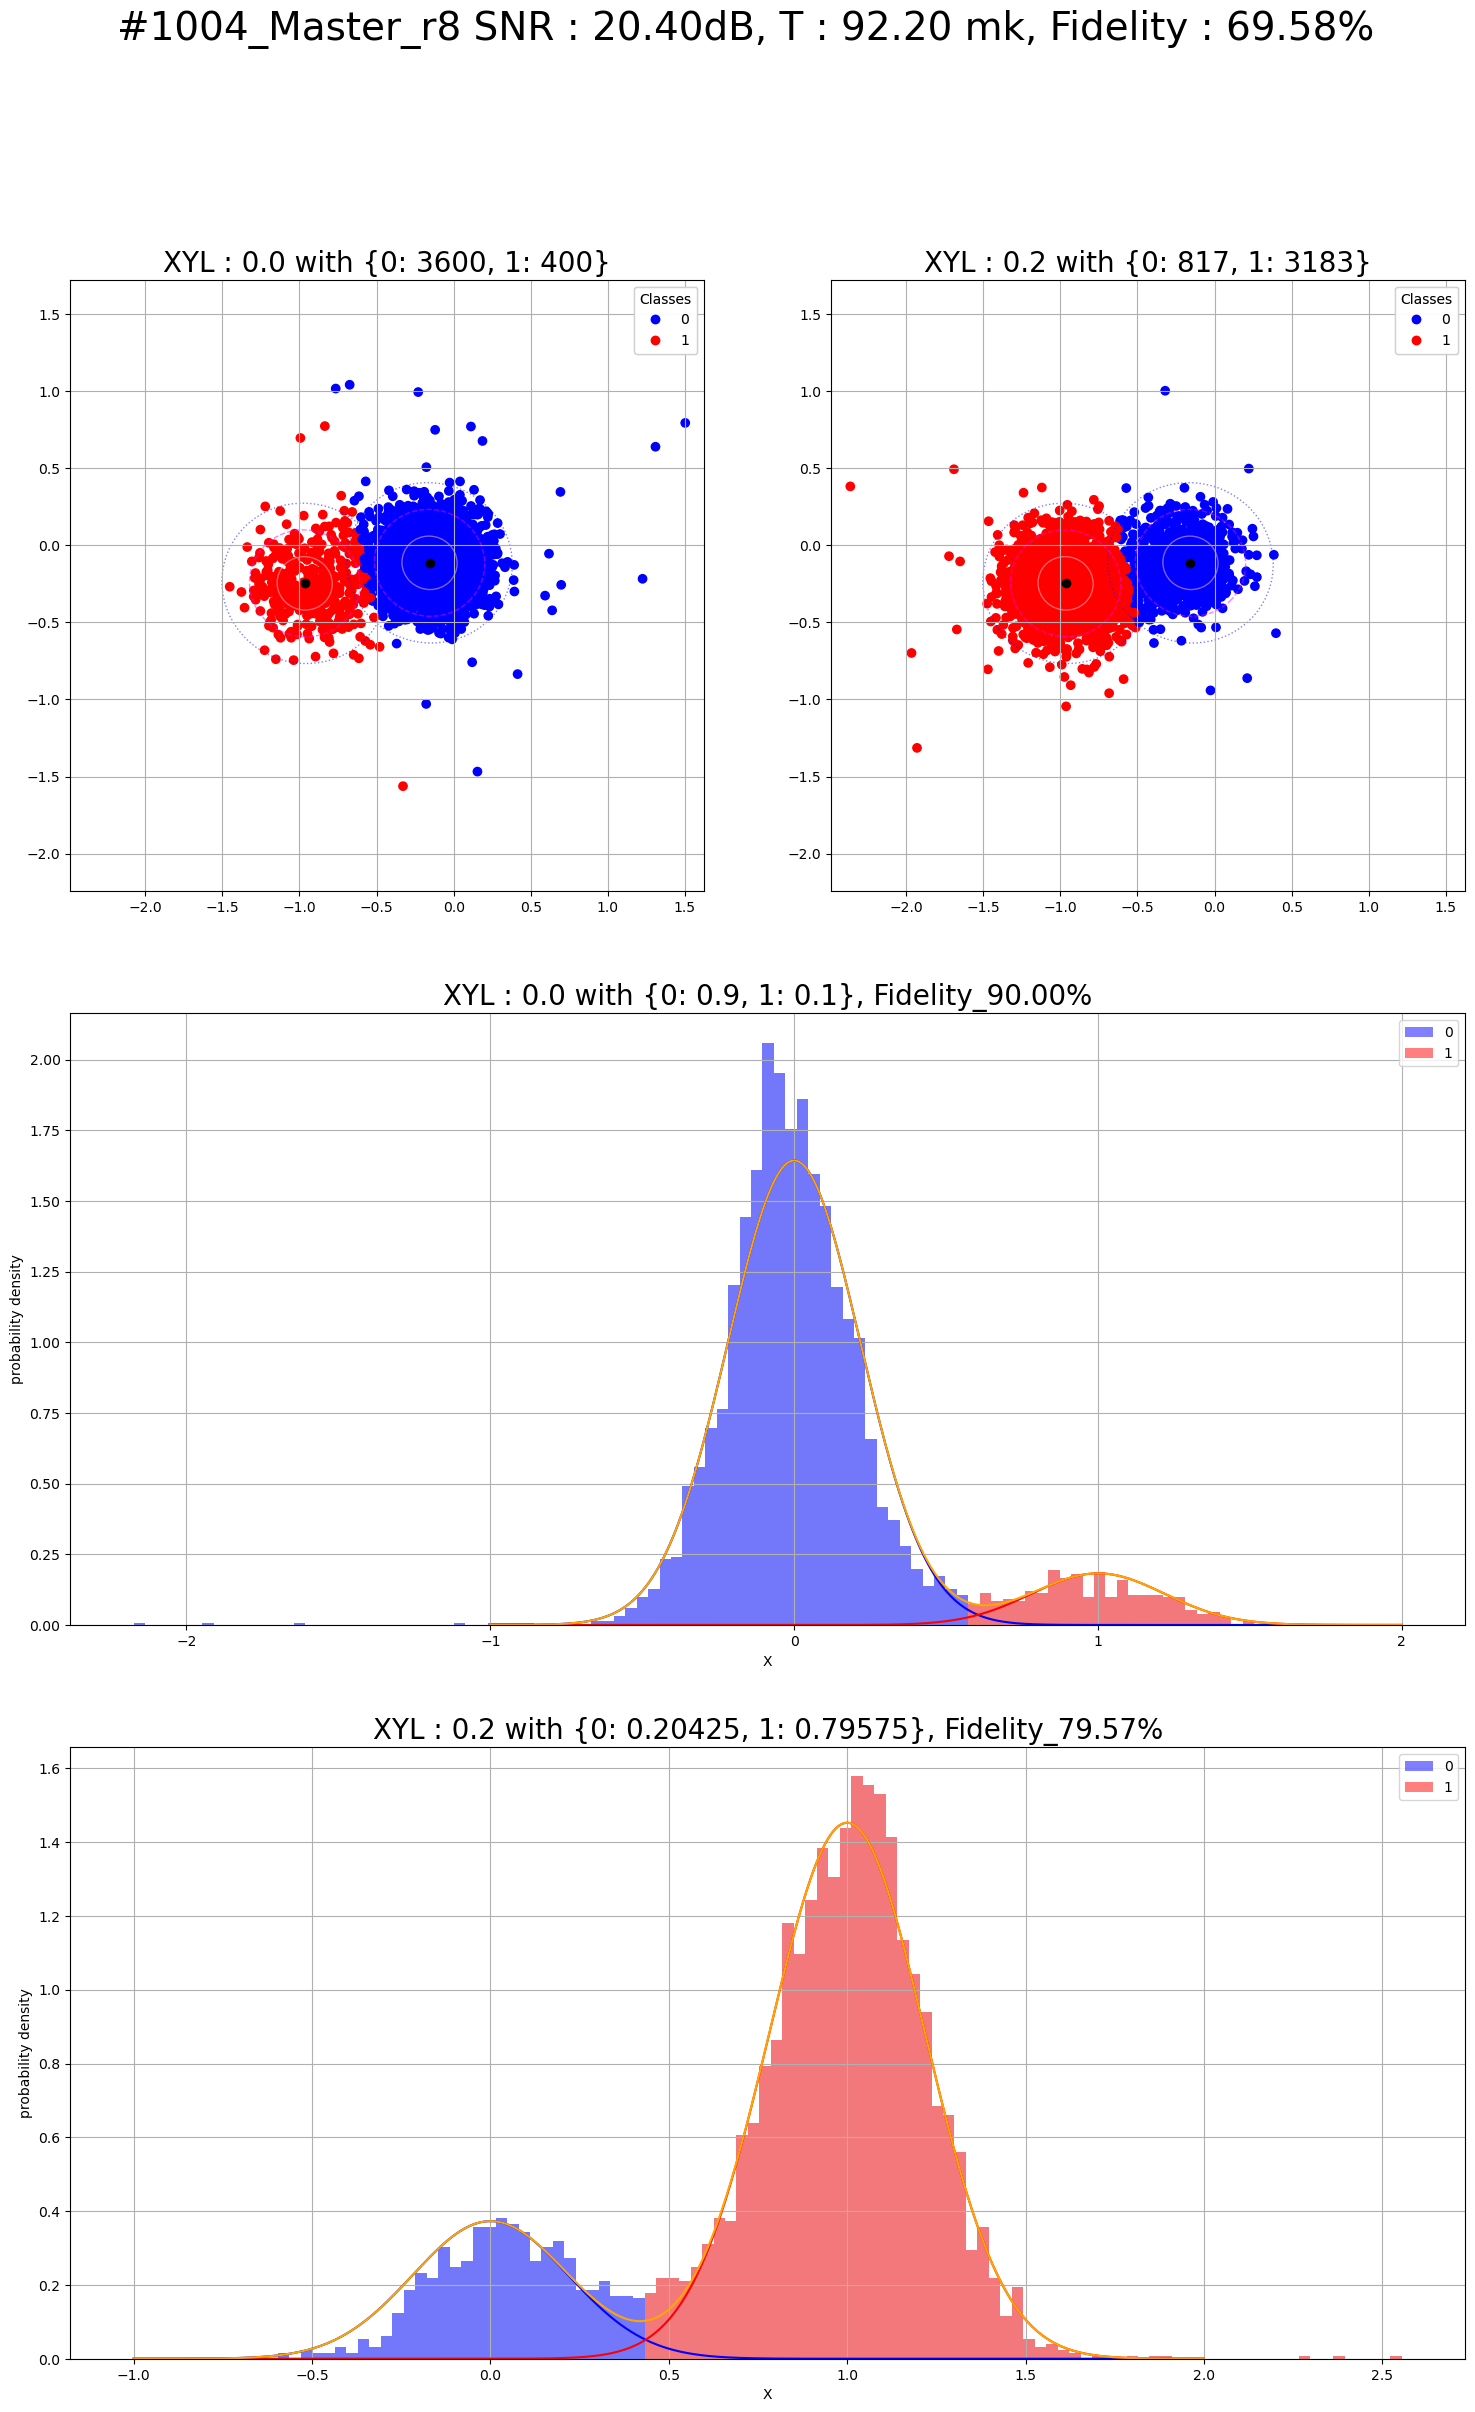

S :  0.8128970448189227  ; N :  0.06132133577782527  ; SNR :  10.77604714726866
center:  [[-0.96417259 -0.24952672]
 [-0.16222524 -0.11655282]]
covariances:  [[ 0.03028334 -0.00117794]
 [-0.00117794  0.03017656]]


<Figure size 640x480 with 0 Axes>

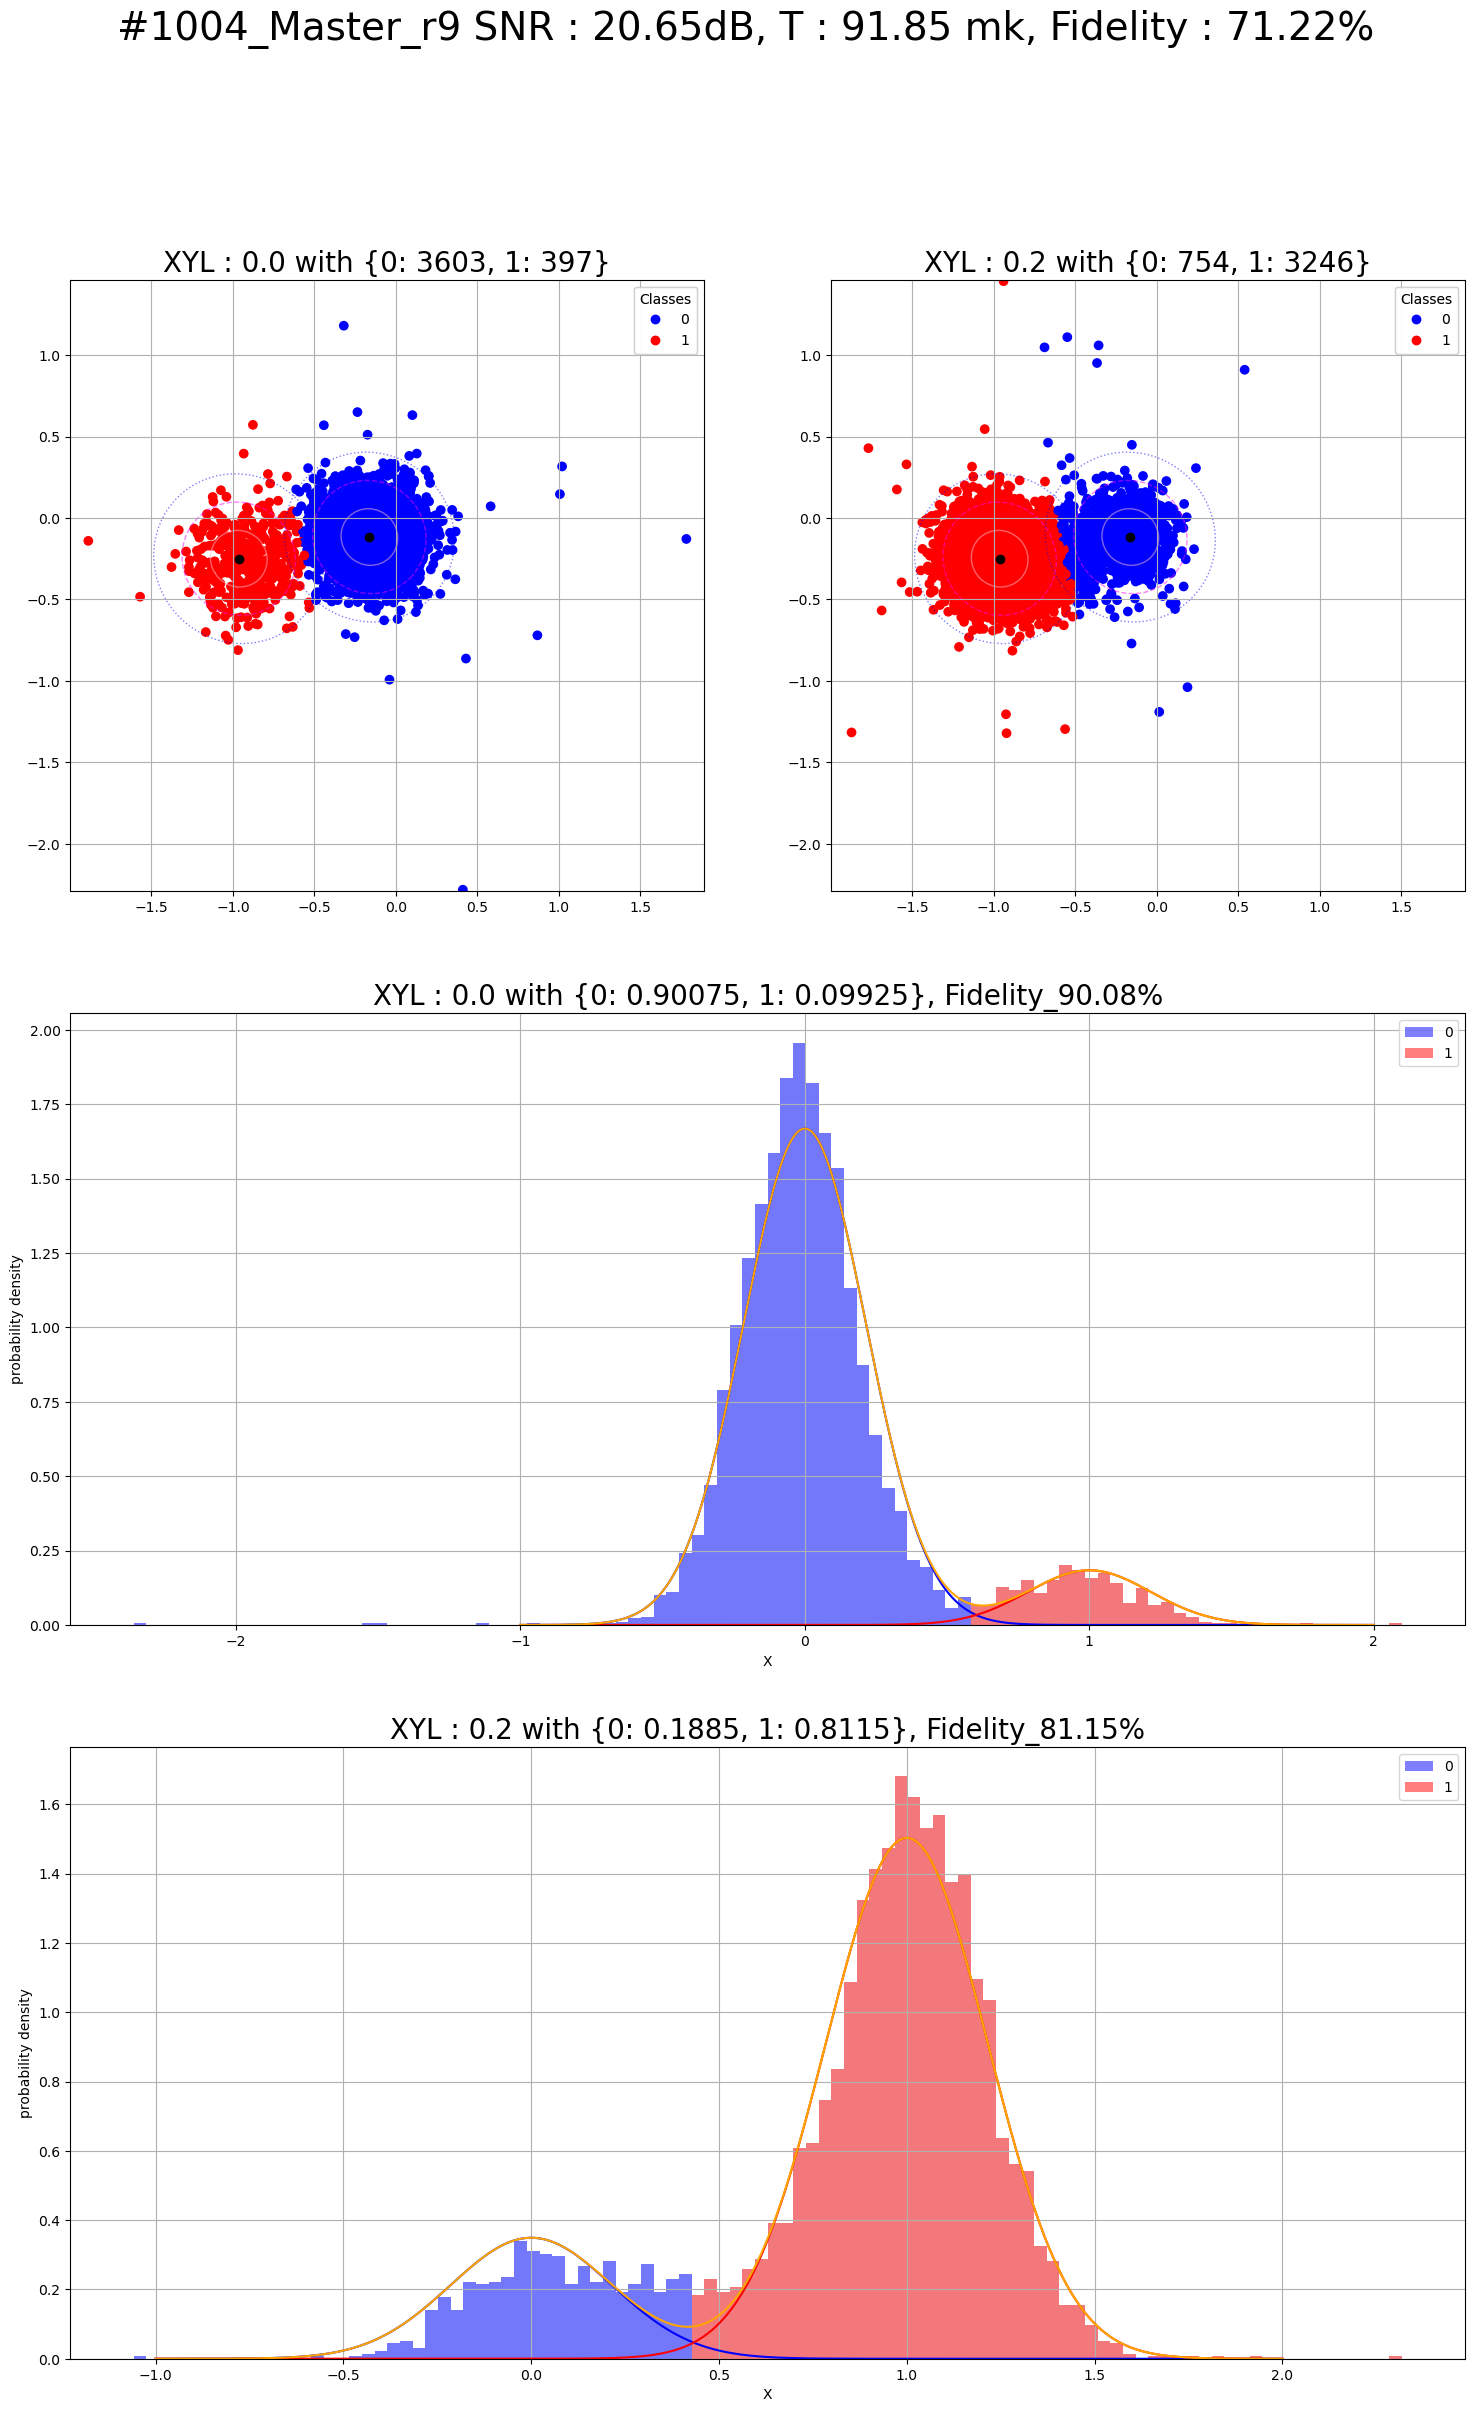

S :  0.8266763973990291  ; N :  0.07774848284709039  ; SNR :  8.789803234626234
center:  [[-0.15016285 -0.1113152 ]
 [-0.96623228 -0.2433173 ]]
covariances:  [[ 0.03859048 -0.00076069]
 [-0.00076069  0.04031395]]


<Figure size 640x480 with 0 Axes>

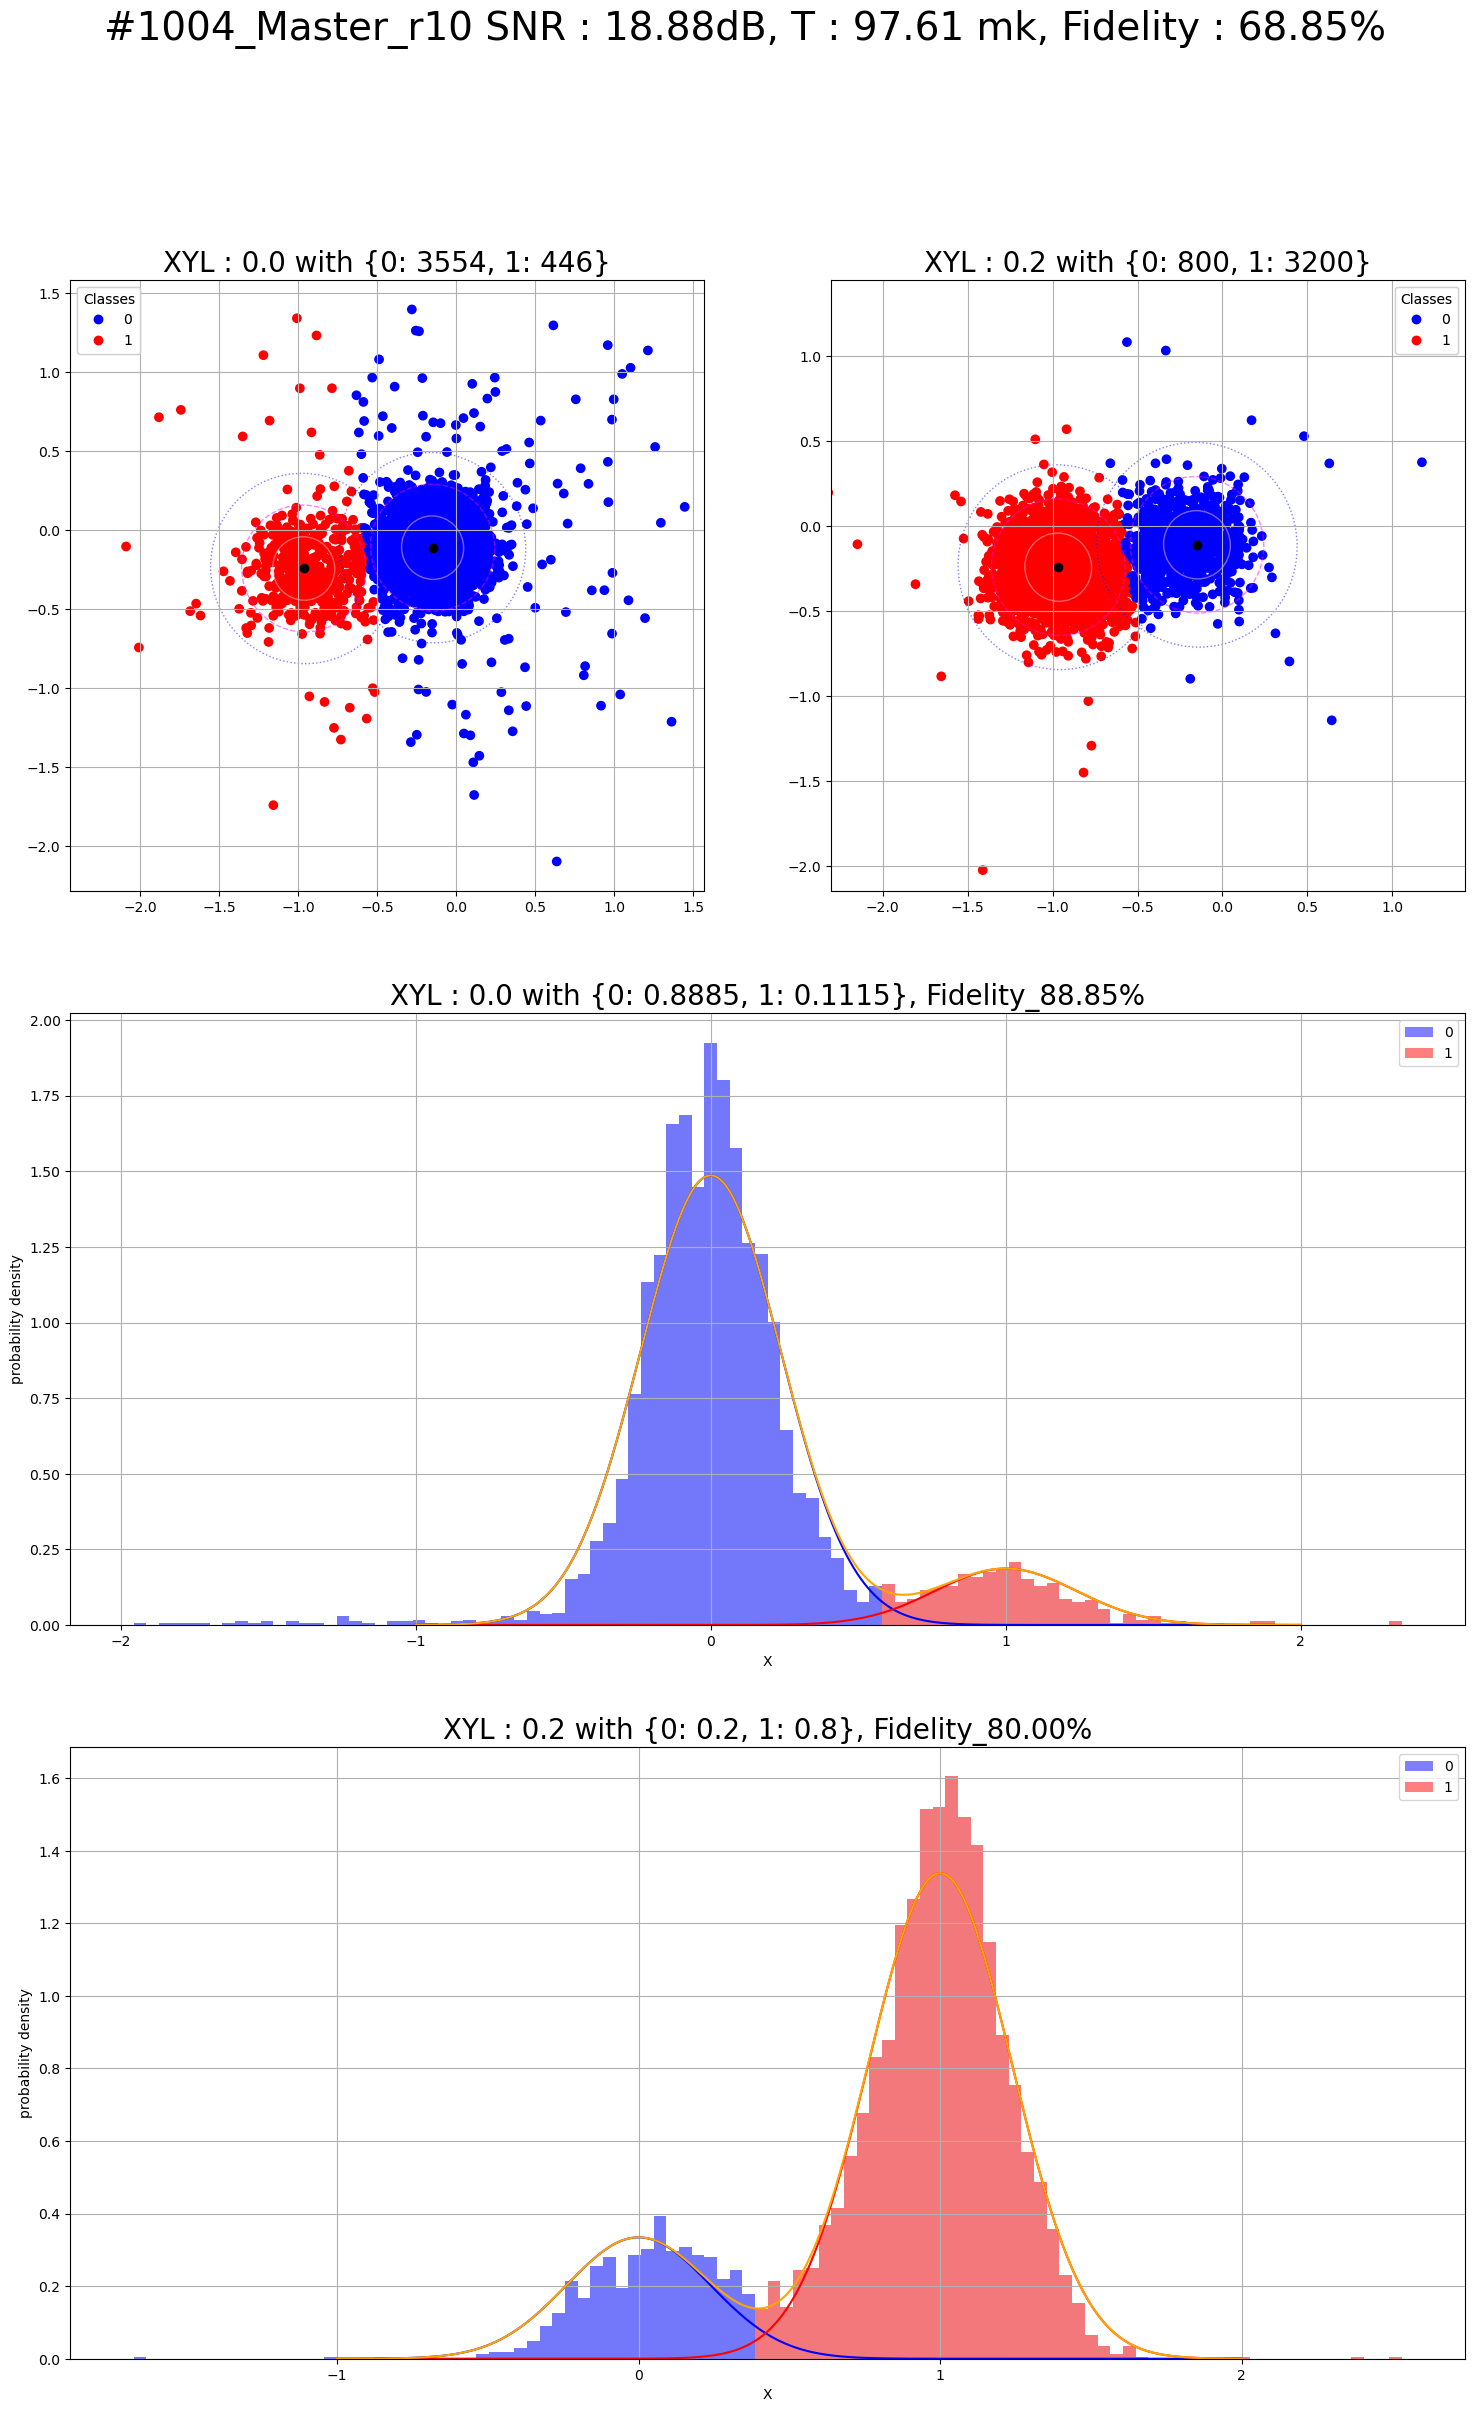

78.32569307574246


<Figure size 640x480 with 0 Axes>

In [41]:
T_eff_list = []
for idx in df['R'].unique():
    df_idx = df[df["R"]==idx]
    
    g = df_idx[(df_idx['XYL']==df_idx['XYL'].unique()[0])]
    e = df_idx[(df_idx['XYL']==df_idx['XYL'].unique()[1])]

    xaxis,yaxis = 'I','Q'
    axis0_xrange=np.array([min(g[xaxis].min(),e[xaxis].min())-max(g[xaxis].var(),e[xaxis].var()),max(g[xaxis].max(),e[xaxis].max())+max(g[xaxis].var(),e[xaxis].var())])
    axis0_yrange=np.array([min(g[yaxis].min(),e[yaxis].min())-max(g[yaxis].var(),e[yaxis].var()),max(g[yaxis].max(),e[yaxis].max())+max(g[yaxis].var(),e[yaxis].var())])
    xrange = np.array([min(axis0_xrange.min(),axis0_xrange.min()),max(axis0_xrange.max(),axis0_xrange.max())])
    yrange = np.array([min(axis0_yrange.min(),axis0_yrange.min()),max(axis0_yrange.max(),axis0_yrange.max())])
    
    T_eff = plot_results(df_idx,e,g,xrange,yrange,title="Master_r"+str(int(idx+1)),saveornot=False)
    T_eff_list.append(T_eff)
print(np.average(np.array(T_eff_list)))

In [38]:
print(T_eff_list)

[62.693035399396955, 68.4340063902637, 62.825577846614436, 62.825577846614436, 61.891824715594154, 87.67820252303726, 95.24584847435878, 92.20179417439294, 91.85226232110749, 97.60880106604463]


In [43]:
def give_GEinfo(df):
    g = df[(df['XYL']==df['XYL'].unique()[0])]
    e = df[(df['XYL']==df['XYL'].unique()[1])]

    xaxis,yaxis = 'I','Q'
    axis0_xrange=np.array([min(g[xaxis].min(),e[xaxis].min())-max(g[xaxis].var(),e[xaxis].var()),max(g[xaxis].max(),e[xaxis].max())+max(g[xaxis].var(),e[xaxis].var())])
    axis0_yrange=np.array([min(g[yaxis].min(),e[yaxis].min())-max(g[yaxis].var(),e[yaxis].var()),max(g[yaxis].max(),e[yaxis].max())+max(g[yaxis].var(),e[yaxis].var())])
    xrange = np.array([min(axis0_xrange.min(),axis0_xrange.min()),max(axis0_xrange.max(),axis0_xrange.max())])
    yrange = np.array([min(axis0_yrange.min(),axis0_yrange.min()),max(axis0_yrange.max(),axis0_yrange.max())])
    return [g,e], [xrange,yrange]


In [108]:
foldername = r"./data/"
master_pyqum_path = find_file(foldername,34)
multiplex_pyqum_path = find_file(foldername,31)
master_df = Load_pyqum(master_pyqum_path).dataframe
multip_df = Load_pyqum(multiplex_pyqum_path).dataframe

master_df['I']*=1000
master_df['Q']*=1000
multip_df['I']*=1000
multip_df['Q']*=1000

def center_diff_cal(center_1,center_2):
    return np.sqrt((center_1[0]-center_2[0])**2+(center_1[1]-center_2[1])**2)


def plot_results(dfs={},GandE={},plotrange={},Fq=4.3,title='',saveornot=False,idx=0):
    g_multip, e_multip = GandE["multiplex"][0],GandE["multiplex"][1]
    g_multip_idx, e_multip_idx = 0,-1
    g_master, e_master = GandE["master"][0],GandE["master"][1]
    g_master_idx, e_master_idx = 0,-1
    
    XYL_ground_multip, XYL_excited_multip = dfs["multiplex"]['XYL'].unique()[g_multip_idx],dfs["multiplex"]['XYL'].unique()[e_multip_idx]
    XYL_ground_master, XYL_excited_master = dfs["master"]['XYL'].unique()[g_master_idx],dfs["master"]['XYL'].unique()[e_master_idx]
    gmm_para = {}
    fig_info = {}
    from tools.tool import gmm_analytic,confidence_ellipse_gmm,std_dev,cal_Tmk
    import scipy
    for i in dfs.keys():
        gmm, mark_gmm,data1,label1,data2,label2,S,N,SNR,SNR_dB = gmm_analytic(dfs[i],GandE[i][1],GandE[i][0],2)
    #     print(np.unique(label1))
        gmm_para[i] = {"model":gmm,"mark":mark_gmm,"data":[data1,data2],"label":[label1,label2],"SNR":SNR}
        jobid = "jobidNotFound"
        fig_info[i] = {}
        fig_info[i]["cluster_centers"],fig_info[i]["cov"],fig_info[i]["XYL"],fig_info[i]["w_a"] = gmm.means_,gmm.covariances_,[XYL_ground,XYL_excited],Fq
#     print("center: ",cluster_centers)
#     print("covariances: ",cov)
    
        if gmm_para[i]["mark"]: 
            gmm_para[i]["label"][0] = change_label(gmm_para[i]["label"][0])
            gmm_para[i]["label"][1] = change_label(gmm_para[i]["label"][1])
            
    
    unique1_multip, counts1_multip = np.unique(gmm_para["multiplex"]["label"][0], return_counts=True)
    unique2_multip, counts2_multip = np.unique(gmm_para["multiplex"]["label"][1], return_counts=True)
    unique1_master, counts1_master = np.unique(gmm_para["master"]["label"][0], return_counts=True)
    unique2_master, counts2_master = np.unique(gmm_para["master"]["label"][1], return_counts=True)
    
    plt.figure(figsize=(18, 18))
    ax1 = plt.subplot(111)
    ax1.axis('equal')
    ax1.grid()
#     scatter1 = ax1.scatter(data1[:, 0],data1[:, 1],c=label1,cmap ='bwr')#,cmap ='bwr',s=marker_size
#     legend1 = ax1.legend(*scatter1.legend_elements(), title="Classes")
#     ax1.add_artist(legend1)
    
    ax1.set_xlim(xrange)
    ax1.set_xlabel("I (mV)")
    ax1.set_ylim(yrange)
    ax1.set_ylabel("Q (mV)")
    center_shape = ["o","x"]
    area_color = ["red","blue"]
    compa_key = list(dfs.keys())
    for j in range(len(compa_key)):
        for i in range(len(fig_info[compa_key[j]]["cluster_centers"])):
#             confidence_ellipse_gmm(cluster_centers[i],cov, ax1, n_std=1,edgecolor='pink',alpha= 0.5)
#             confidence_ellipse_gmm(cluster_centers[i],cov, ax1, n_std=2,edgecolor='fuchsia', linestyle='--',alpha= 0.5)
            if i == 0:
                confidence_ellipse_gmm(fig_info[compa_key[j]]["cluster_centers"][i],fig_info[compa_key[j]]["cov"], ax1, n_std=3,edgecolor=area_color[j], linestyle=':',alpha= 0.5,label=compa_key[j])
                ax1.scatter(fig_info[compa_key[j]]["cluster_centers"][i][0],fig_info[compa_key[j]]["cluster_centers"][i][1],s=10,c=area_color[j],marker=center_shape[j],label=compa_key[j])
            else:
                confidence_ellipse_gmm(fig_info[compa_key[j]]["cluster_centers"][i],fig_info[compa_key[j]]["cov"], ax1, n_std=3,edgecolor=area_color[j], linestyle=':',alpha= 0.5)
                ax1.scatter(fig_info[compa_key[j]]["cluster_centers"][i][0],fig_info[compa_key[j]]["cluster_centers"][i][1],s=10,c=area_color[j],marker=center_shape[j])
            ax1.legend()
            
    g_center_diff = center_diff_cal(fig_info["multiplex"]["cluster_centers"][0],fig_info["master"]["cluster_centers"][0])    
    e_center_diff = center_diff_cal(fig_info["multiplex"]["cluster_centers"][1],fig_info["master"]["cluster_centers"][1])
    if g_center_diff > 0.05 or e_center_diff > 0.05:
        g_center_diff = center_diff_cal(fig_info["multiplex"]["cluster_centers"][0],fig_info["master"]["cluster_centers"][1])    
        e_center_diff = center_diff_cal(fig_info["multiplex"]["cluster_centers"][1],fig_info["master"]["cluster_centers"][0])
    
    ax1.title.set_text("r_%d Ground center diff: %.3f mV,Excited center diff: %.3f mV"%(idx+1, g_center_diff, e_center_diff))
    ax1.title.set_size(20)
#     ax2 = plt.subplot(322)
#     ax2.axis('equal')
#     ax2.grid()
#     scatter2 = ax2.scatter(data2[:, 0],data2[:, 1],c=label2,cmap ='bwr')#,cmap ='bwr',s=marker_size
#     legend2 = ax2.legend(*scatter2.legend_elements(), title="Classes")
#     ax2.add_artist(legend2)
#     ax2.title.set_text("XYL : "+str(XYL[-1])+" with "+str(dict(zip(unique2, counts2))))
#     ax2.title.set_size(20)
#     ax2.set_xlim(xrange)
#     ax2.set_ylim(yrange)
#     for i in range(len(cluster_centers)):
#         confidence_ellipse_gmm(cluster_centers[i],cov, ax2, n_std=1,edgecolor='pink',alpha= 0.5)
#         confidence_ellipse_gmm(cluster_centers[i],cov, ax2, n_std=2,edgecolor='fuchsia', linestyle='--',alpha= 0.5)
#         confidence_ellipse_gmm(cluster_centers[i],cov, ax2, n_std=3,edgecolor='blue', linestyle=':',alpha= 0.5)
#         ax2.scatter(cluster_centers[i][0],cluster_centers[i][1],color = "black")

    if saveornot:
        plt.savefig("master&multiplexCompa_r"+str(int(idx+1))+".png")
    plt.show()
    plt.clf()

./data/Master_r_oneshot.pyqum
Comment : 
Master repeat OneShot

	Data Checked!

Start load data....
R-JSON :
	 ROSTART  :  41000
	 ROW  :  8000
	 ROL  :  0.08
	 ROF  :  5.7477
	 ROdelay  :  280
	 R  :  0 to 9 * 9
	 ROSTART,ROdelay,XYW>ROSTART-ROdelay-XYW  :  0
	 XYF  :  4.22125
	 XYW  :  19
	 XYL  :  0 0.2
	 Q1Z  :  -0.03
	 Q2Z  :  -0.075
	 Q3Z  :  -0.1
RECORD-SUM :  4000
RECORD_TIME_NS :  2000
Change : 
	 ['R' 'XYL' 'RECORD-SUM']
Change command : 
	 ['0to9*9' '0 0.2' '1to4000*3999']


       R        :  0.0   to  9.0   *  10  
      XYL       :  0.0   to  0.2   *   2  
./data/Multiplex_r_oneshot.pyqum
Comment : 
Multiplex repeat OneShot

	Data Checked!

Start load data....
R-JSON :
	 ROSTART  :  41000
	 ROW  :  8000
	 ROL  :  0.08
	 ROF  :  5.7477
	 ROdelay  :  280
	 R  :  0 to 9 * 9
	 ROSTART,ROdelay,XYW>ROSTART-ROdelay-XYW  :  0
	 XYF  :  4.22125
	 XYW  :  19
	 XYL  :  0 0.2
	 Q1Z  :  -0.03
	 Q2Z  :  -0.075
	 Q3Z  :  -0.1
RECORD-SUM :  4000
RECORD_TIME_NS :  2000
Change : 
	 ['R' 'X

./data/Master_r_oneshot.pyqum
Comment : 
Master repeat OneShot

	Data Checked!

Start load data....
R-JSON :
	 ROSTART  :  41000
	 ROW  :  8000
	 ROL  :  0.08
	 ROF  :  5.7477
	 ROdelay  :  280
	 R  :  0 to 9 * 9
	 ROSTART,ROdelay,XYW>ROSTART-ROdelay-XYW  :  0
	 XYF  :  4.22125
	 XYW  :  19
	 XYL  :  0 0.2
	 Q1Z  :  -0.03
	 Q2Z  :  -0.075
	 Q3Z  :  -0.1
RECORD-SUM :  4000
RECORD_TIME_NS :  2000
Change : 
	 ['R' 'XYL' 'RECORD-SUM']
Change command : 
	 ['0to9*9' '0 0.2' '1to4000*3999']


       R        :  0.0   to  9.0   *  10  
      XYL       :  0.0   to  0.2   *   2  
S :  0.822074292454464  ; N :  0.06671060347053205  ; SNR :  10.130415663426431
S :  0.82860115461355  ; N :  0.06421756896465272  ; SNR :  10.691464726807432


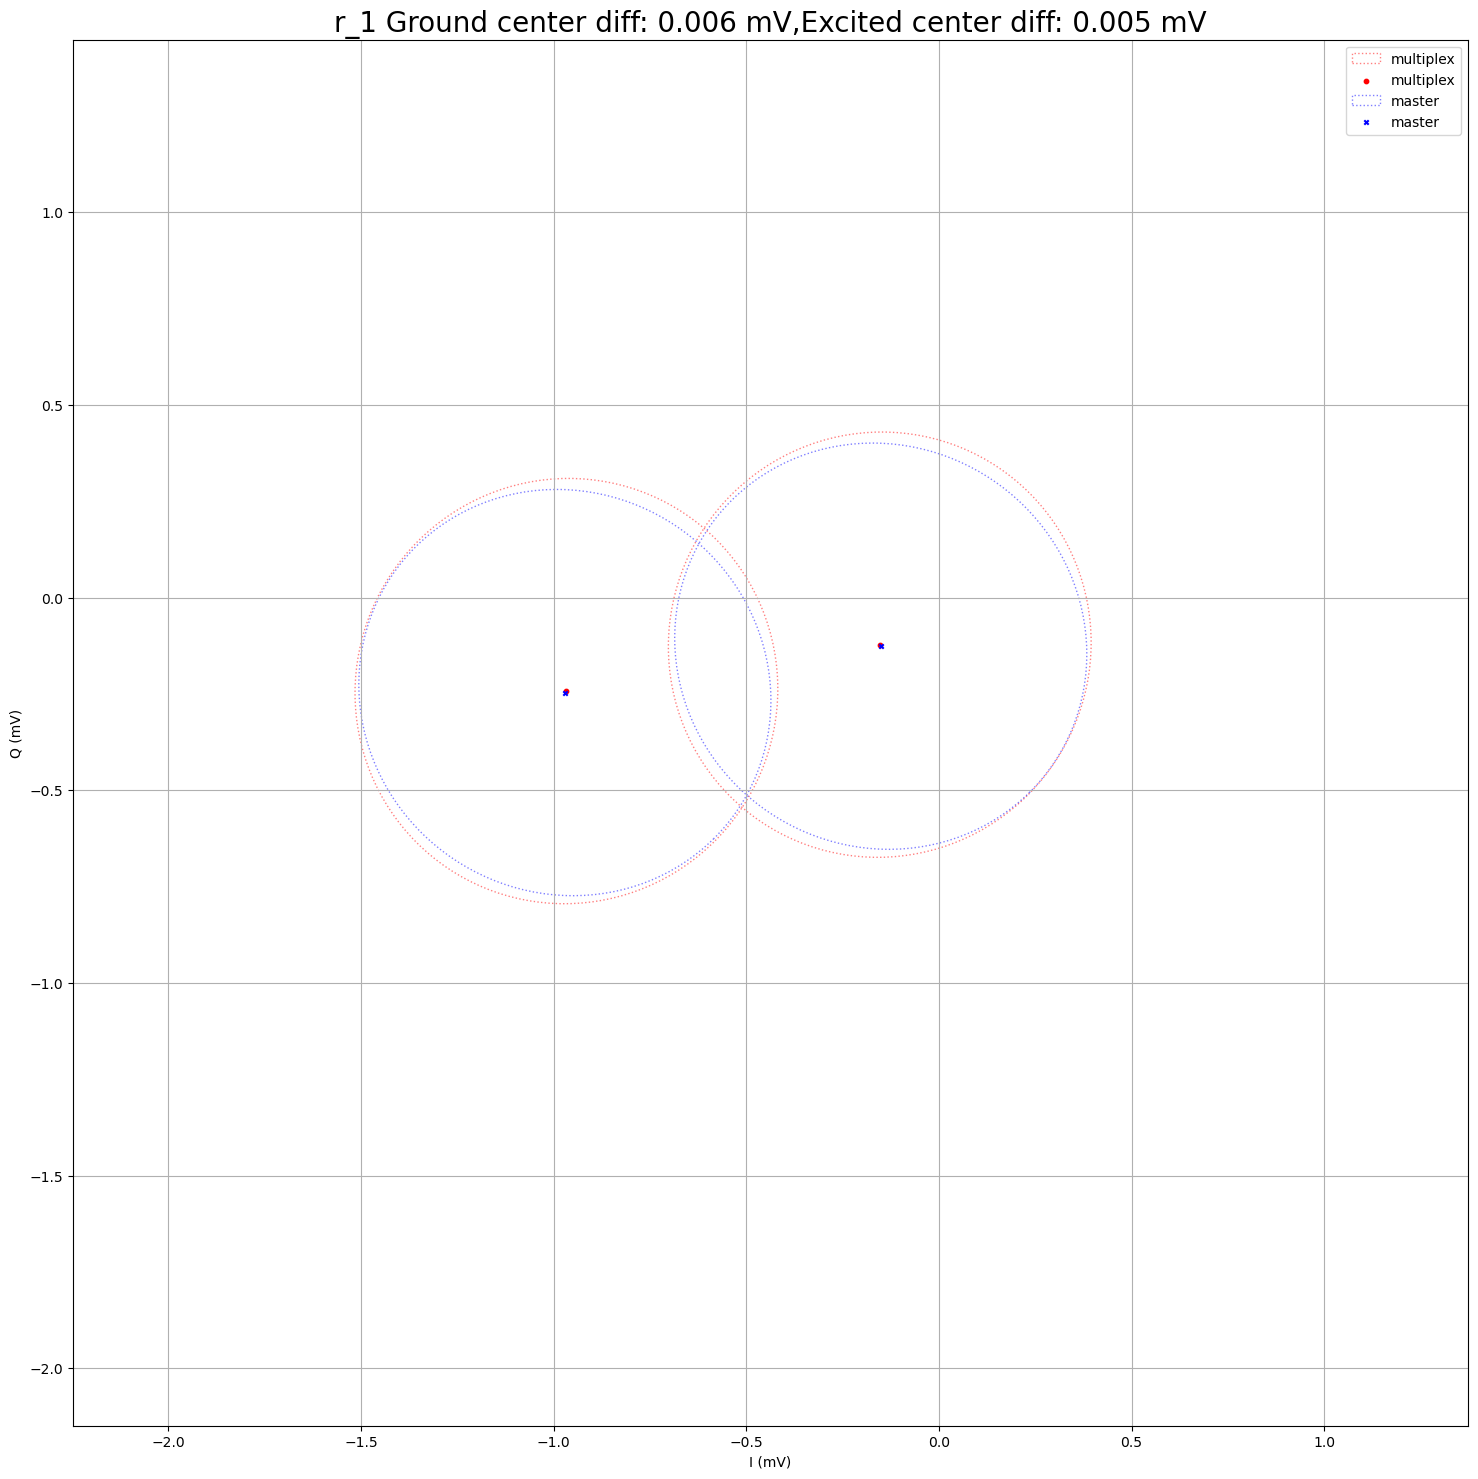

./data/Master_r_oneshot.pyqum
Comment : 
Master repeat OneShot

	Data Checked!

Start load data....
R-JSON :
	 ROSTART  :  41000
	 ROW  :  8000
	 ROL  :  0.08
	 ROF  :  5.7477
	 ROdelay  :  280
	 R  :  0 to 9 * 9
	 ROSTART,ROdelay,XYW>ROSTART-ROdelay-XYW  :  0
	 XYF  :  4.22125
	 XYW  :  19
	 XYL  :  0 0.2
	 Q1Z  :  -0.03
	 Q2Z  :  -0.075
	 Q3Z  :  -0.1
RECORD-SUM :  4000
RECORD_TIME_NS :  2000
Change : 
	 ['R' 'XYL' 'RECORD-SUM']
Change command : 
	 ['0to9*9' '0 0.2' '1to4000*3999']


       R        :  0.0   to  9.0   *  10  
      XYL       :  0.0   to  0.2   *   2  
S :  0.8227307041555361  ; N :  0.06247576405846396  ; SNR :  10.834374285152299
S :  0.8357823487471114  ; N :  0.062657389590023  ; SNR :  11.148439777779478


<Figure size 640x480 with 0 Axes>

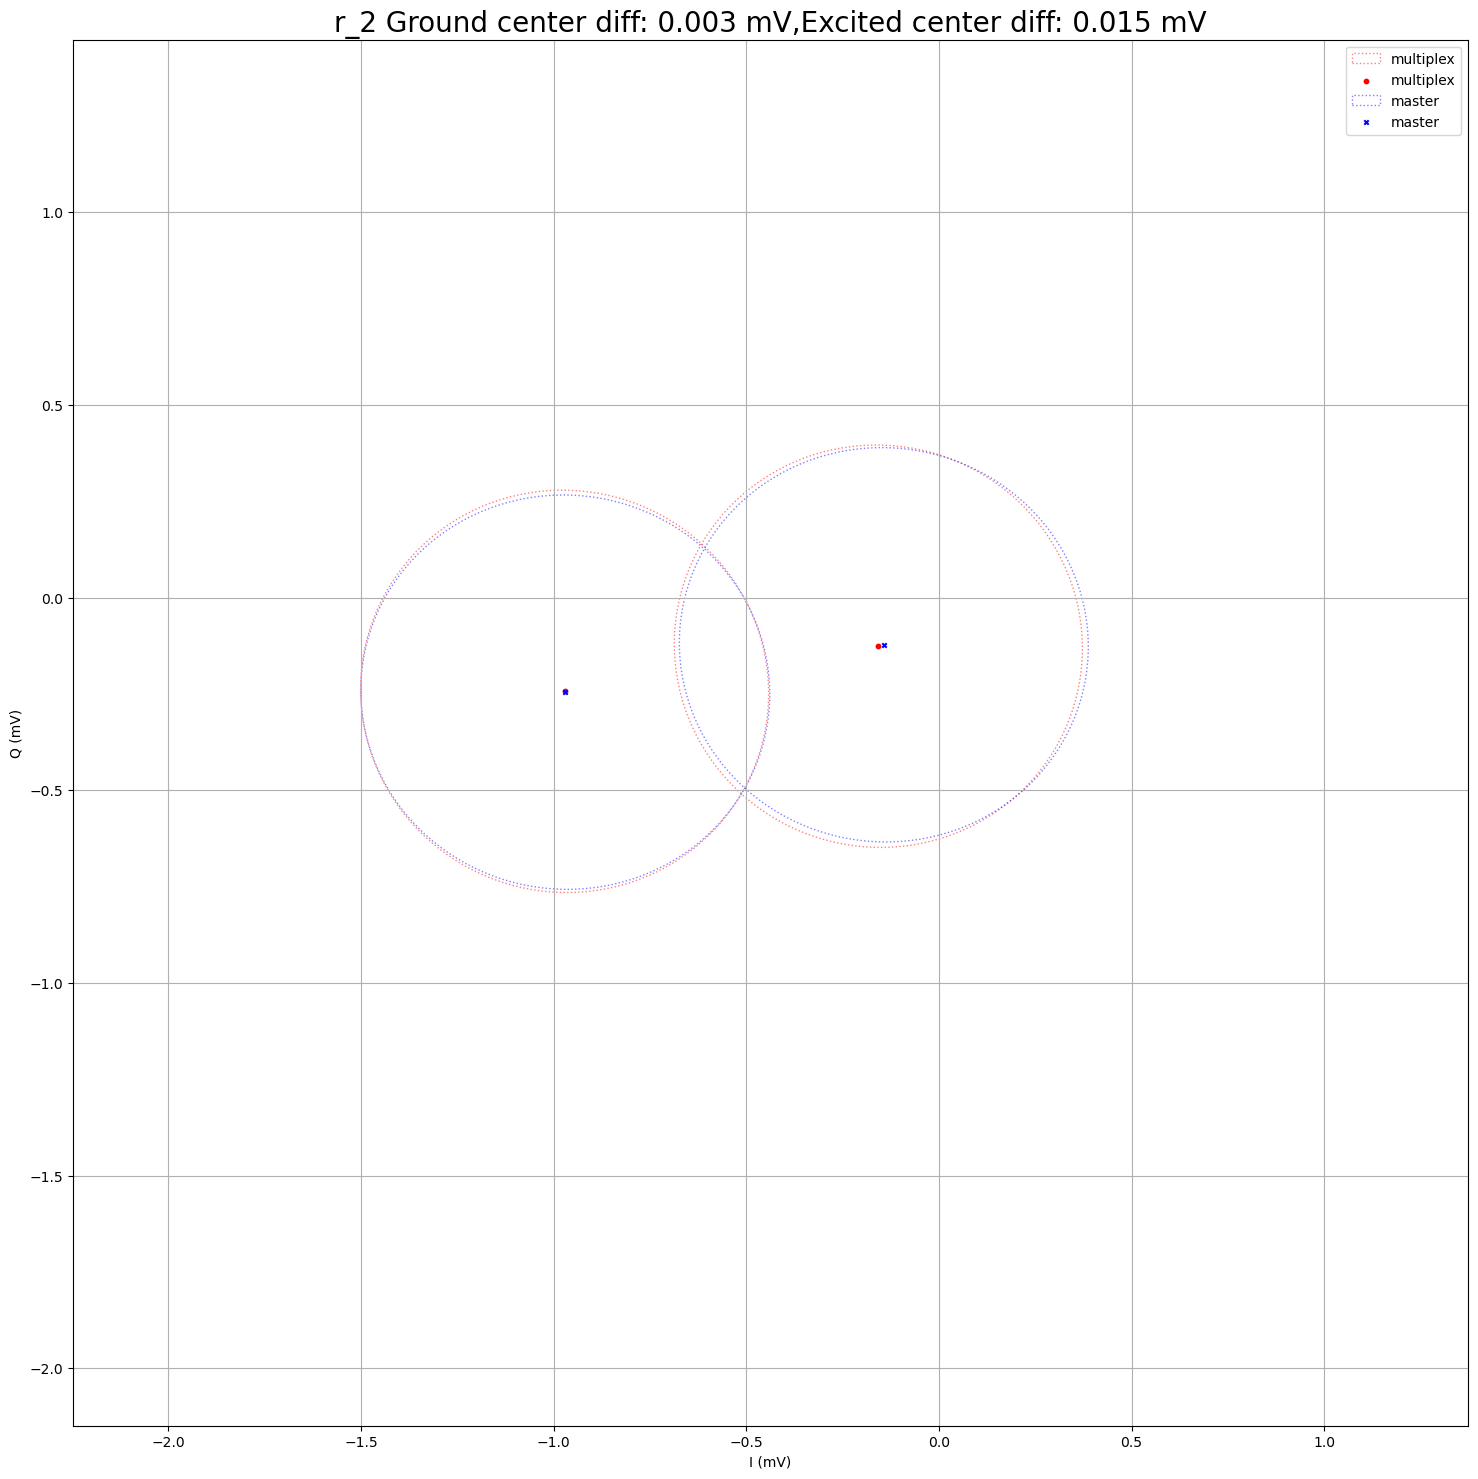

./data/Master_r_oneshot.pyqum
Comment : 
Master repeat OneShot

	Data Checked!

Start load data....
R-JSON :
	 ROSTART  :  41000
	 ROW  :  8000
	 ROL  :  0.08
	 ROF  :  5.7477
	 ROdelay  :  280
	 R  :  0 to 9 * 9
	 ROSTART,ROdelay,XYW>ROSTART-ROdelay-XYW  :  0
	 XYF  :  4.22125
	 XYW  :  19
	 XYL  :  0 0.2
	 Q1Z  :  -0.03
	 Q2Z  :  -0.075
	 Q3Z  :  -0.1
RECORD-SUM :  4000
RECORD_TIME_NS :  2000
Change : 
	 ['R' 'XYL' 'RECORD-SUM']
Change command : 
	 ['0to9*9' '0 0.2' '1to4000*3999']


       R        :  0.0   to  9.0   *  10  
      XYL       :  0.0   to  0.2   *   2  
S :  0.8206010490232455  ; N :  0.06584891191611271  ; SNR :  10.226229440448487
S :  0.8280034605980375  ; N :  0.0581935337326755  ; SNR :  11.7812012226604


<Figure size 640x480 with 0 Axes>

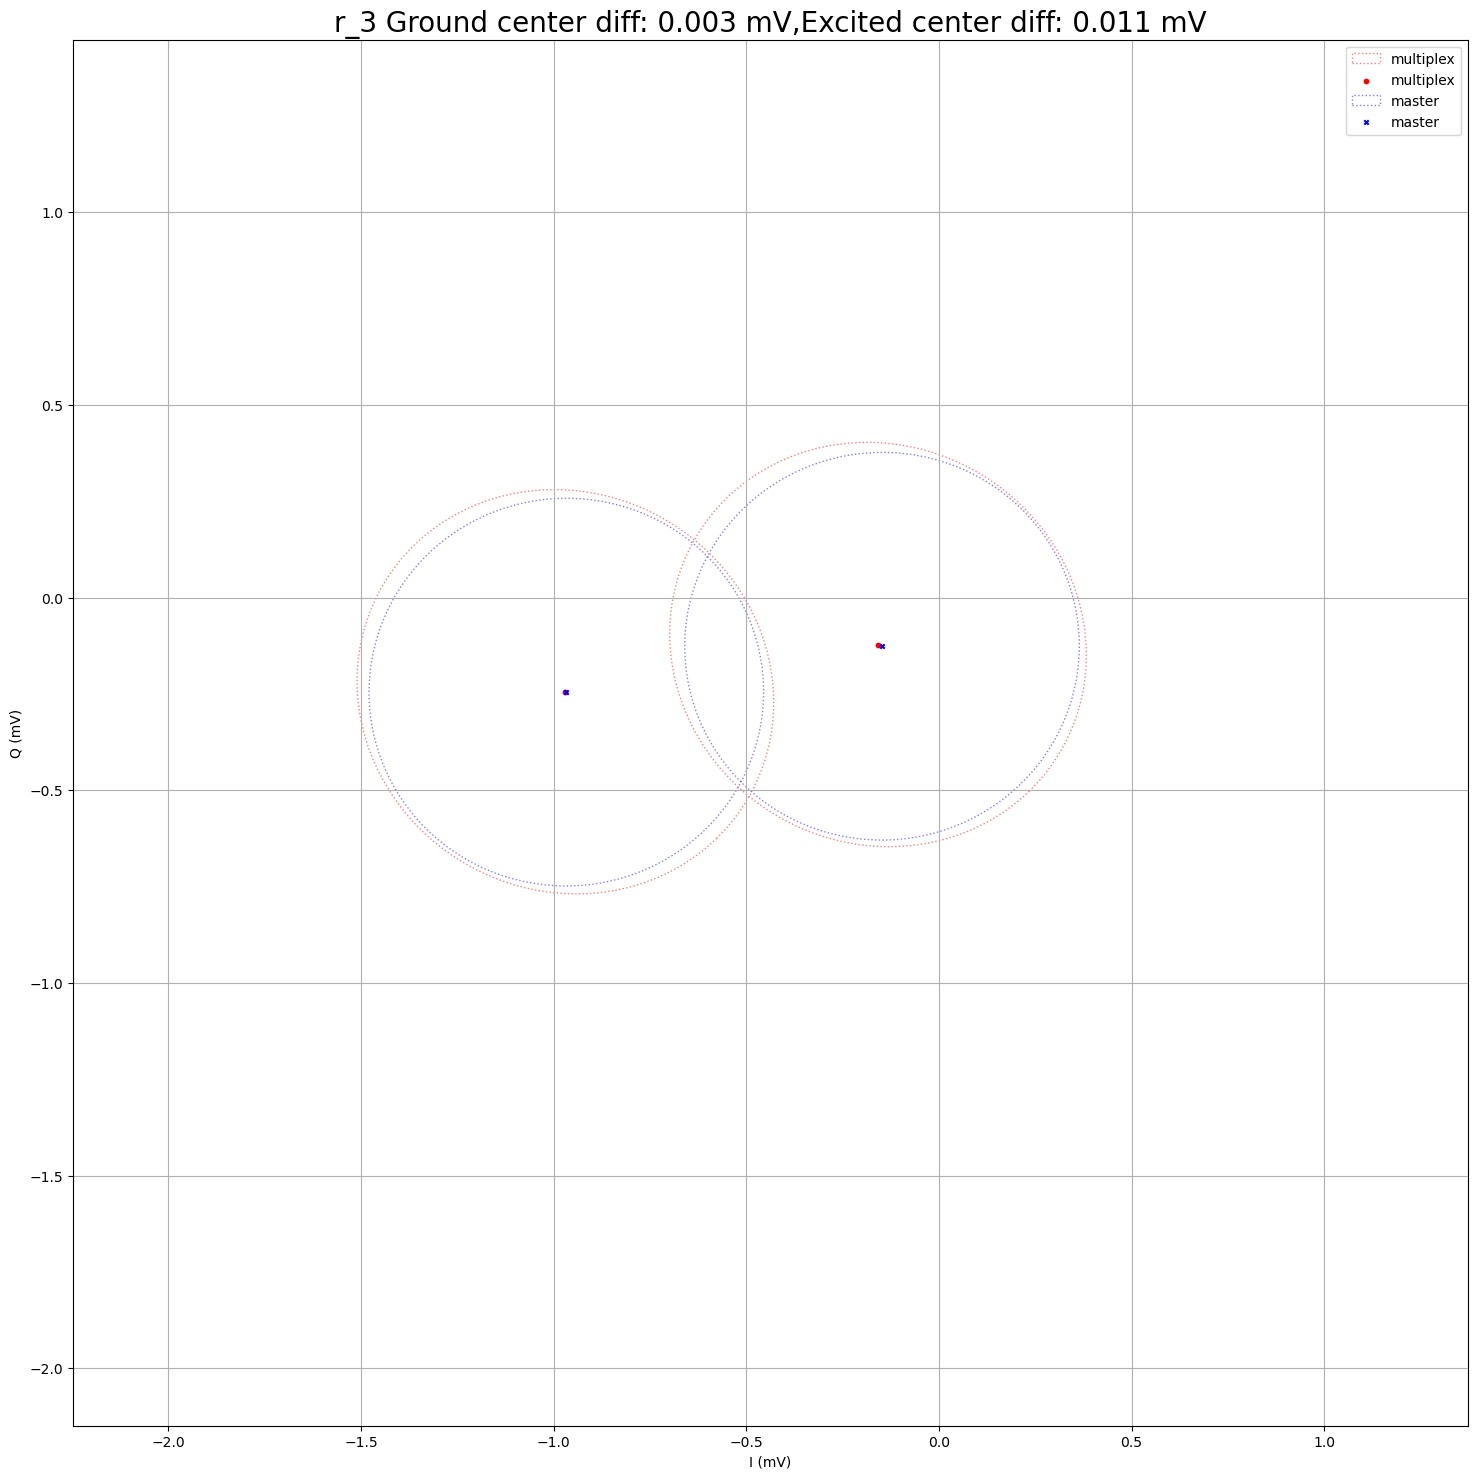

./data/Master_r_oneshot.pyqum
Comment : 
Master repeat OneShot

	Data Checked!

Start load data....
R-JSON :
	 ROSTART  :  41000
	 ROW  :  8000
	 ROL  :  0.08
	 ROF  :  5.7477
	 ROdelay  :  280
	 R  :  0 to 9 * 9
	 ROSTART,ROdelay,XYW>ROSTART-ROdelay-XYW  :  0
	 XYF  :  4.22125
	 XYW  :  19
	 XYL  :  0 0.2
	 Q1Z  :  -0.03
	 Q2Z  :  -0.075
	 Q3Z  :  -0.1
RECORD-SUM :  4000
RECORD_TIME_NS :  2000
Change : 
	 ['R' 'XYL' 'RECORD-SUM']
Change command : 
	 ['0to9*9' '0 0.2' '1to4000*3999']


       R        :  0.0   to  9.0   *  10  
      XYL       :  0.0   to  0.2   *   2  
S :  0.8256888340396029  ; N :  0.06423512213887442  ; SNR :  10.61354019353664
S :  0.8276159076270929  ; N :  0.06890032584837787  ; SNR :  9.941144430357475


<Figure size 640x480 with 0 Axes>

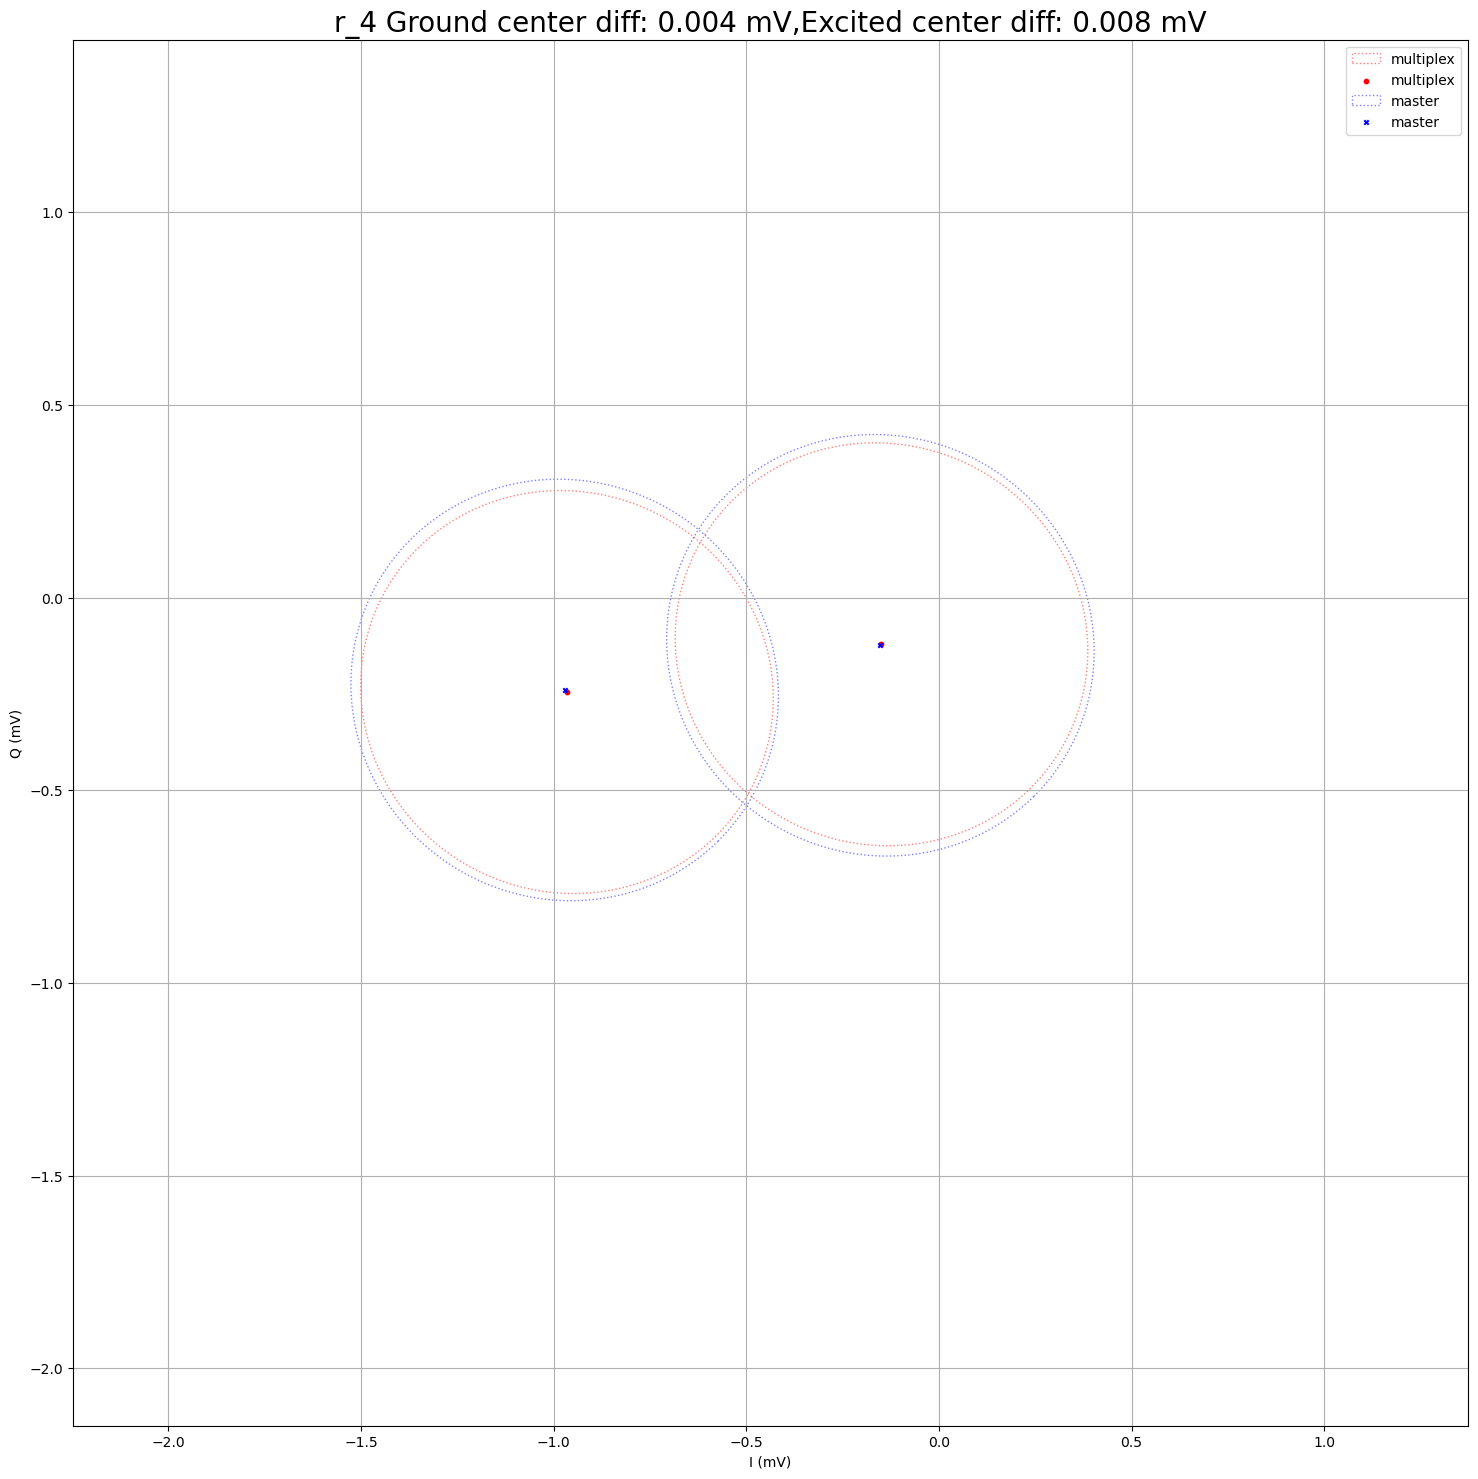

./data/Master_r_oneshot.pyqum
Comment : 
Master repeat OneShot

	Data Checked!

Start load data....
R-JSON :
	 ROSTART  :  41000
	 ROW  :  8000
	 ROL  :  0.08
	 ROF  :  5.7477
	 ROdelay  :  280
	 R  :  0 to 9 * 9
	 ROSTART,ROdelay,XYW>ROSTART-ROdelay-XYW  :  0
	 XYF  :  4.22125
	 XYW  :  19
	 XYL  :  0 0.2
	 Q1Z  :  -0.03
	 Q2Z  :  -0.075
	 Q3Z  :  -0.1
RECORD-SUM :  4000
RECORD_TIME_NS :  2000
Change : 
	 ['R' 'XYL' 'RECORD-SUM']
Change command : 
	 ['0to9*9' '0 0.2' '1to4000*3999']


       R        :  0.0   to  9.0   *  10  
      XYL       :  0.0   to  0.2   *   2  
S :  0.8194455354943617  ; N :  0.06397965623873361  ; SNR :  10.495382831318139
S :  0.8260010579682142  ; N :  0.05999107982738589  ; SNR :  11.372986612805555


<Figure size 640x480 with 0 Axes>

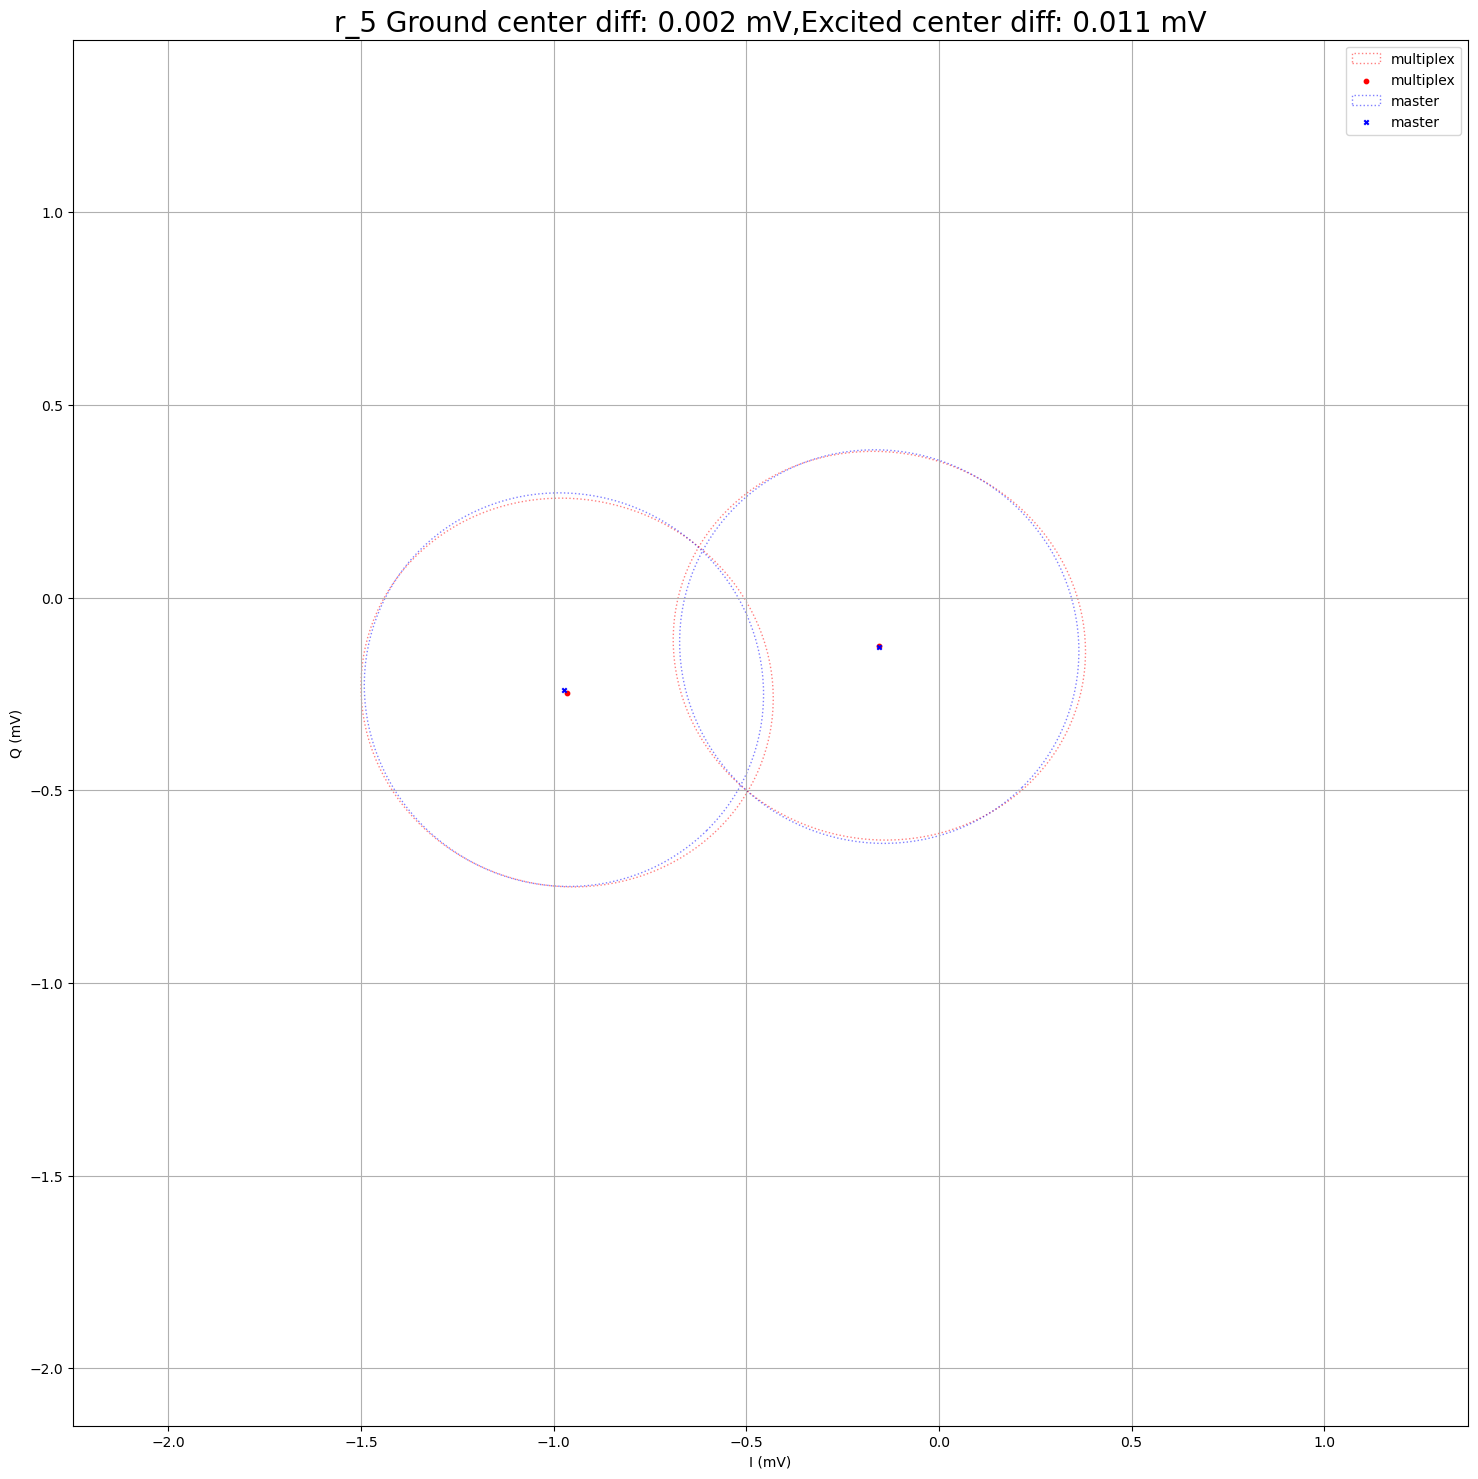

./data/Master_r_oneshot.pyqum
Comment : 
Master repeat OneShot

	Data Checked!

Start load data....
R-JSON :
	 ROSTART  :  41000
	 ROW  :  8000
	 ROL  :  0.08
	 ROF  :  5.7477
	 ROdelay  :  280
	 R  :  0 to 9 * 9
	 ROSTART,ROdelay,XYW>ROSTART-ROdelay-XYW  :  0
	 XYF  :  4.22125
	 XYW  :  19
	 XYL  :  0 0.2
	 Q1Z  :  -0.03
	 Q2Z  :  -0.075
	 Q3Z  :  -0.1
RECORD-SUM :  4000
RECORD_TIME_NS :  2000
Change : 
	 ['R' 'XYL' 'RECORD-SUM']
Change command : 
	 ['0to9*9' '0 0.2' '1to4000*3999']


       R        :  0.0   to  9.0   *  10  
      XYL       :  0.0   to  0.2   *   2  
S :  0.8140325295730663  ; N :  0.06282747330824814  ; SNR :  10.5471209378737
S :  0.8189267712026909  ; N :  0.06223799781686022  ; SNR :  10.775427875521862


<Figure size 640x480 with 0 Axes>

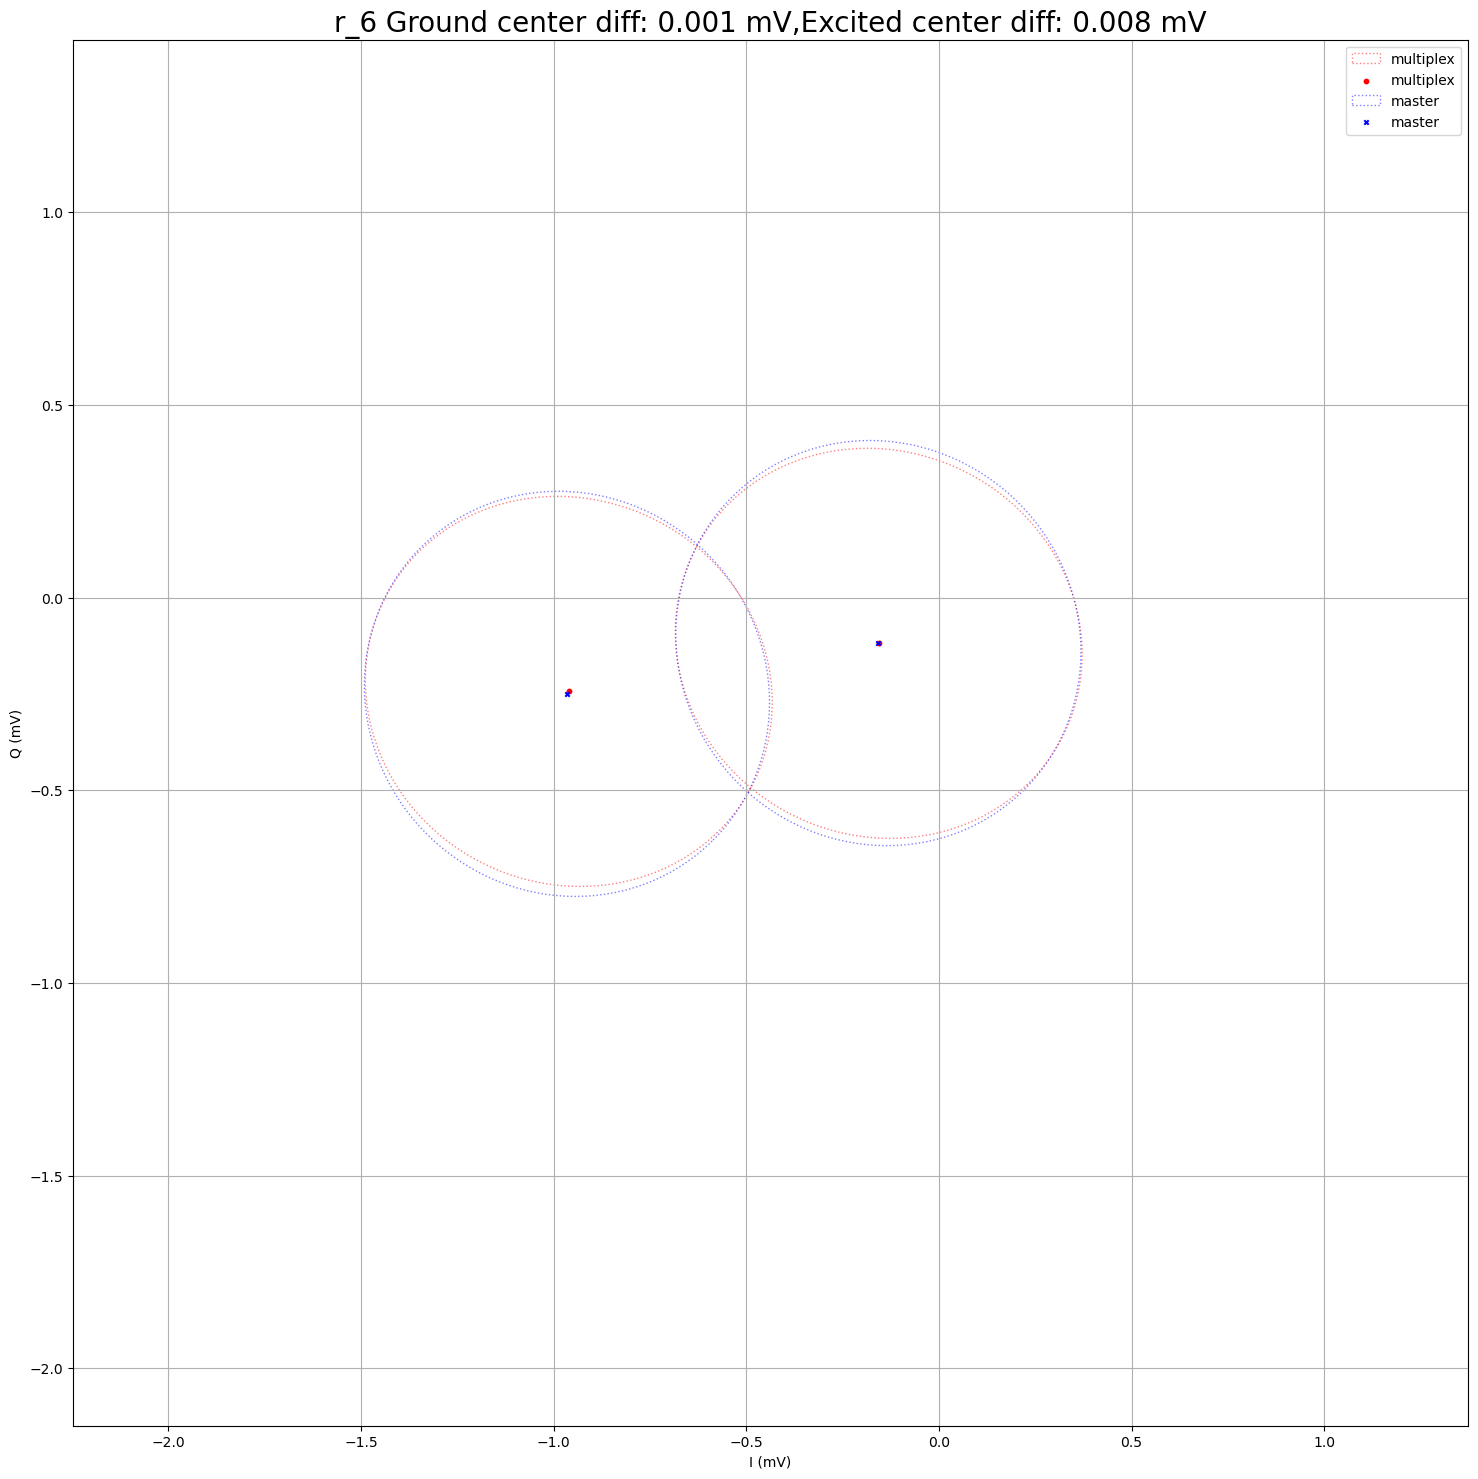

./data/Master_r_oneshot.pyqum
Comment : 
Master repeat OneShot

	Data Checked!

Start load data....
R-JSON :
	 ROSTART  :  41000
	 ROW  :  8000
	 ROL  :  0.08
	 ROF  :  5.7477
	 ROdelay  :  280
	 R  :  0 to 9 * 9
	 ROSTART,ROdelay,XYW>ROSTART-ROdelay-XYW  :  0
	 XYF  :  4.22125
	 XYW  :  19
	 XYL  :  0 0.2
	 Q1Z  :  -0.03
	 Q2Z  :  -0.075
	 Q3Z  :  -0.1
RECORD-SUM :  4000
RECORD_TIME_NS :  2000
Change : 
	 ['R' 'XYL' 'RECORD-SUM']
Change command : 
	 ['0to9*9' '0 0.2' '1to4000*3999']


       R        :  0.0   to  9.0   *  10  
      XYL       :  0.0   to  0.2   *   2  
S :  0.8157271982483193  ; N :  0.06114825430529645  ; SNR :  10.881927366885064
S :  0.8277285503797985  ; N :  0.061618725010772694  ; SNR :  11.1189342686669


<Figure size 640x480 with 0 Axes>

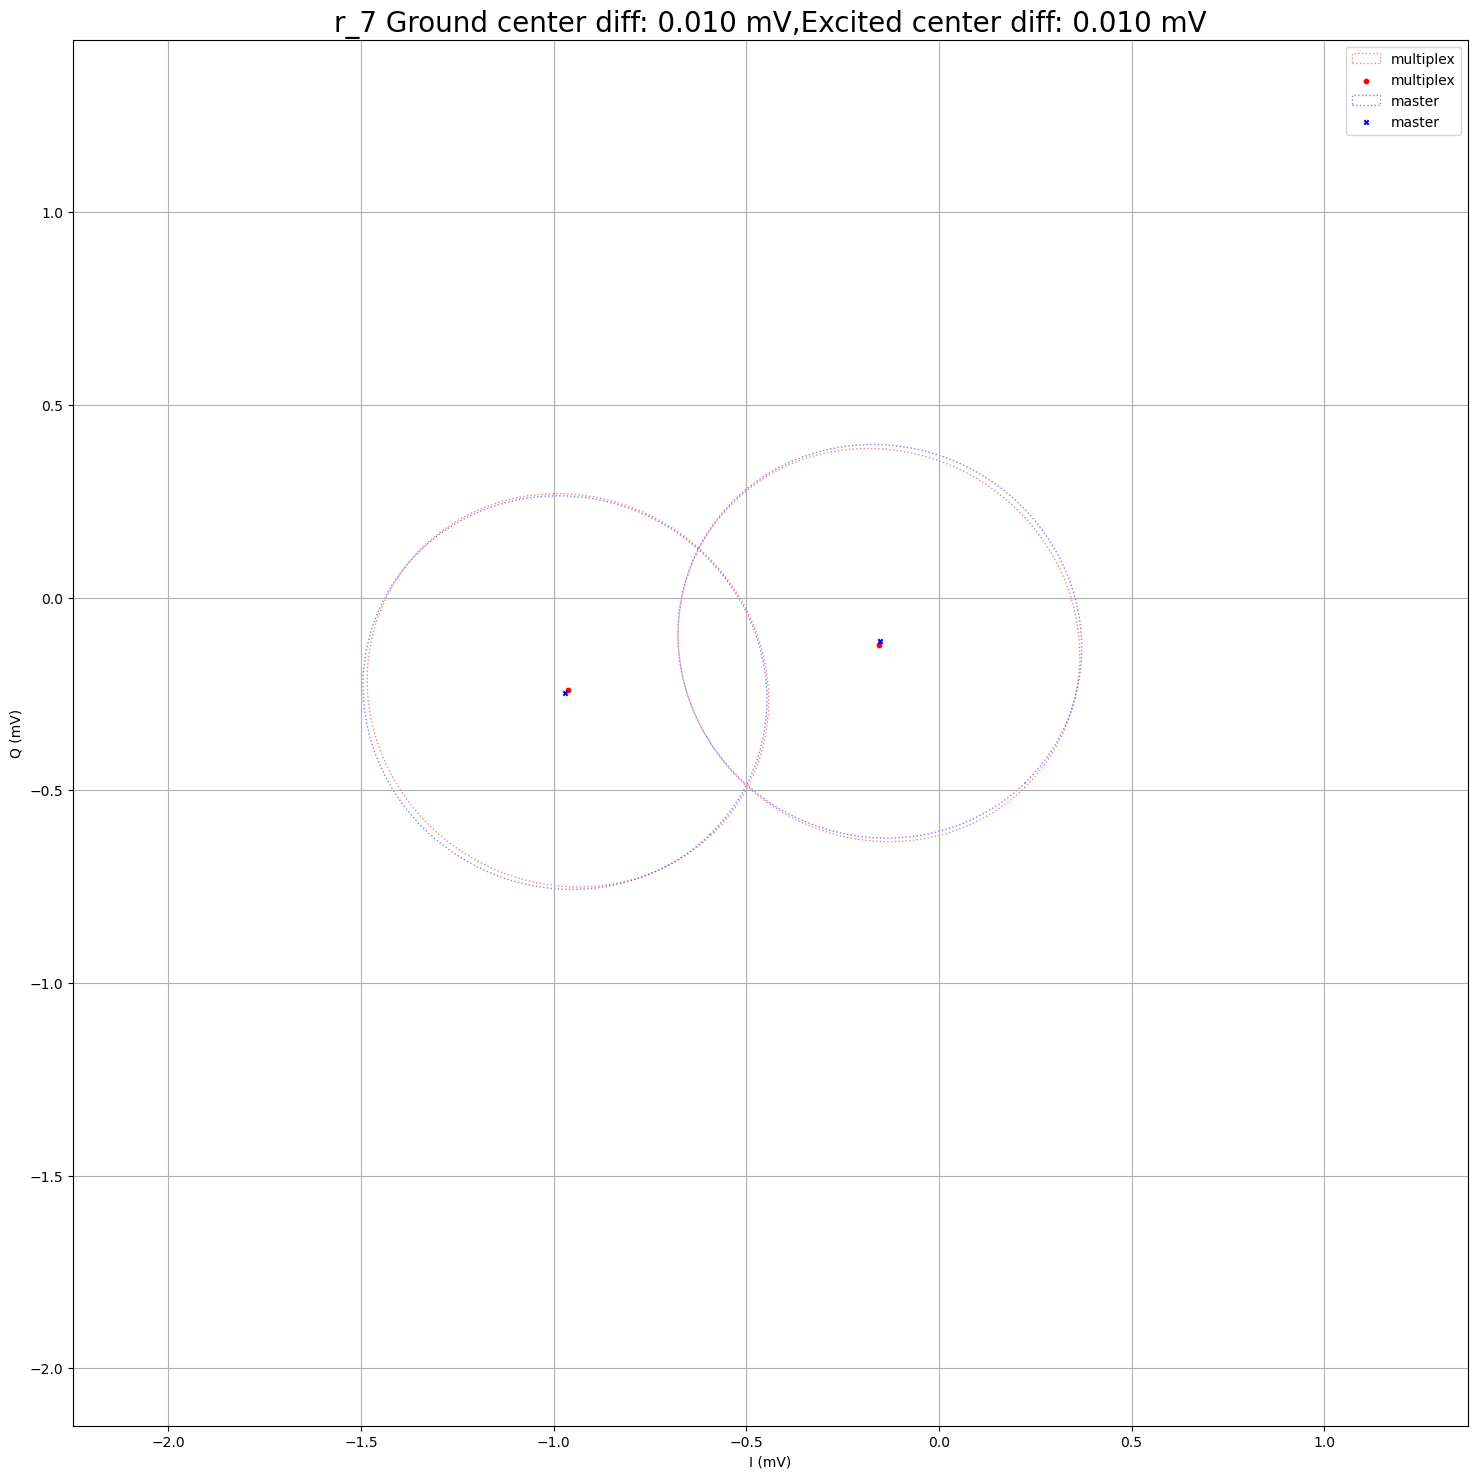

./data/Master_r_oneshot.pyqum
Comment : 
Master repeat OneShot

	Data Checked!

Start load data....
R-JSON :
	 ROSTART  :  41000
	 ROW  :  8000
	 ROL  :  0.08
	 ROF  :  5.7477
	 ROdelay  :  280
	 R  :  0 to 9 * 9
	 ROSTART,ROdelay,XYW>ROSTART-ROdelay-XYW  :  0
	 XYF  :  4.22125
	 XYW  :  19
	 XYL  :  0 0.2
	 Q1Z  :  -0.03
	 Q2Z  :  -0.075
	 Q3Z  :  -0.1
RECORD-SUM :  4000
RECORD_TIME_NS :  2000
Change : 
	 ['R' 'XYL' 'RECORD-SUM']
Change command : 
	 ['0to9*9' '0 0.2' '1to4000*3999']


       R        :  0.0   to  9.0   *  10  
      XYL       :  0.0   to  0.2   *   2  
S :  0.8254005541909917  ; N :  0.06190516690685942  ; SNR :  11.005318439474333
S :  0.8205171993930029  ; N :  0.06432385737808574  ; SNR :  10.46654386011843


<Figure size 640x480 with 0 Axes>

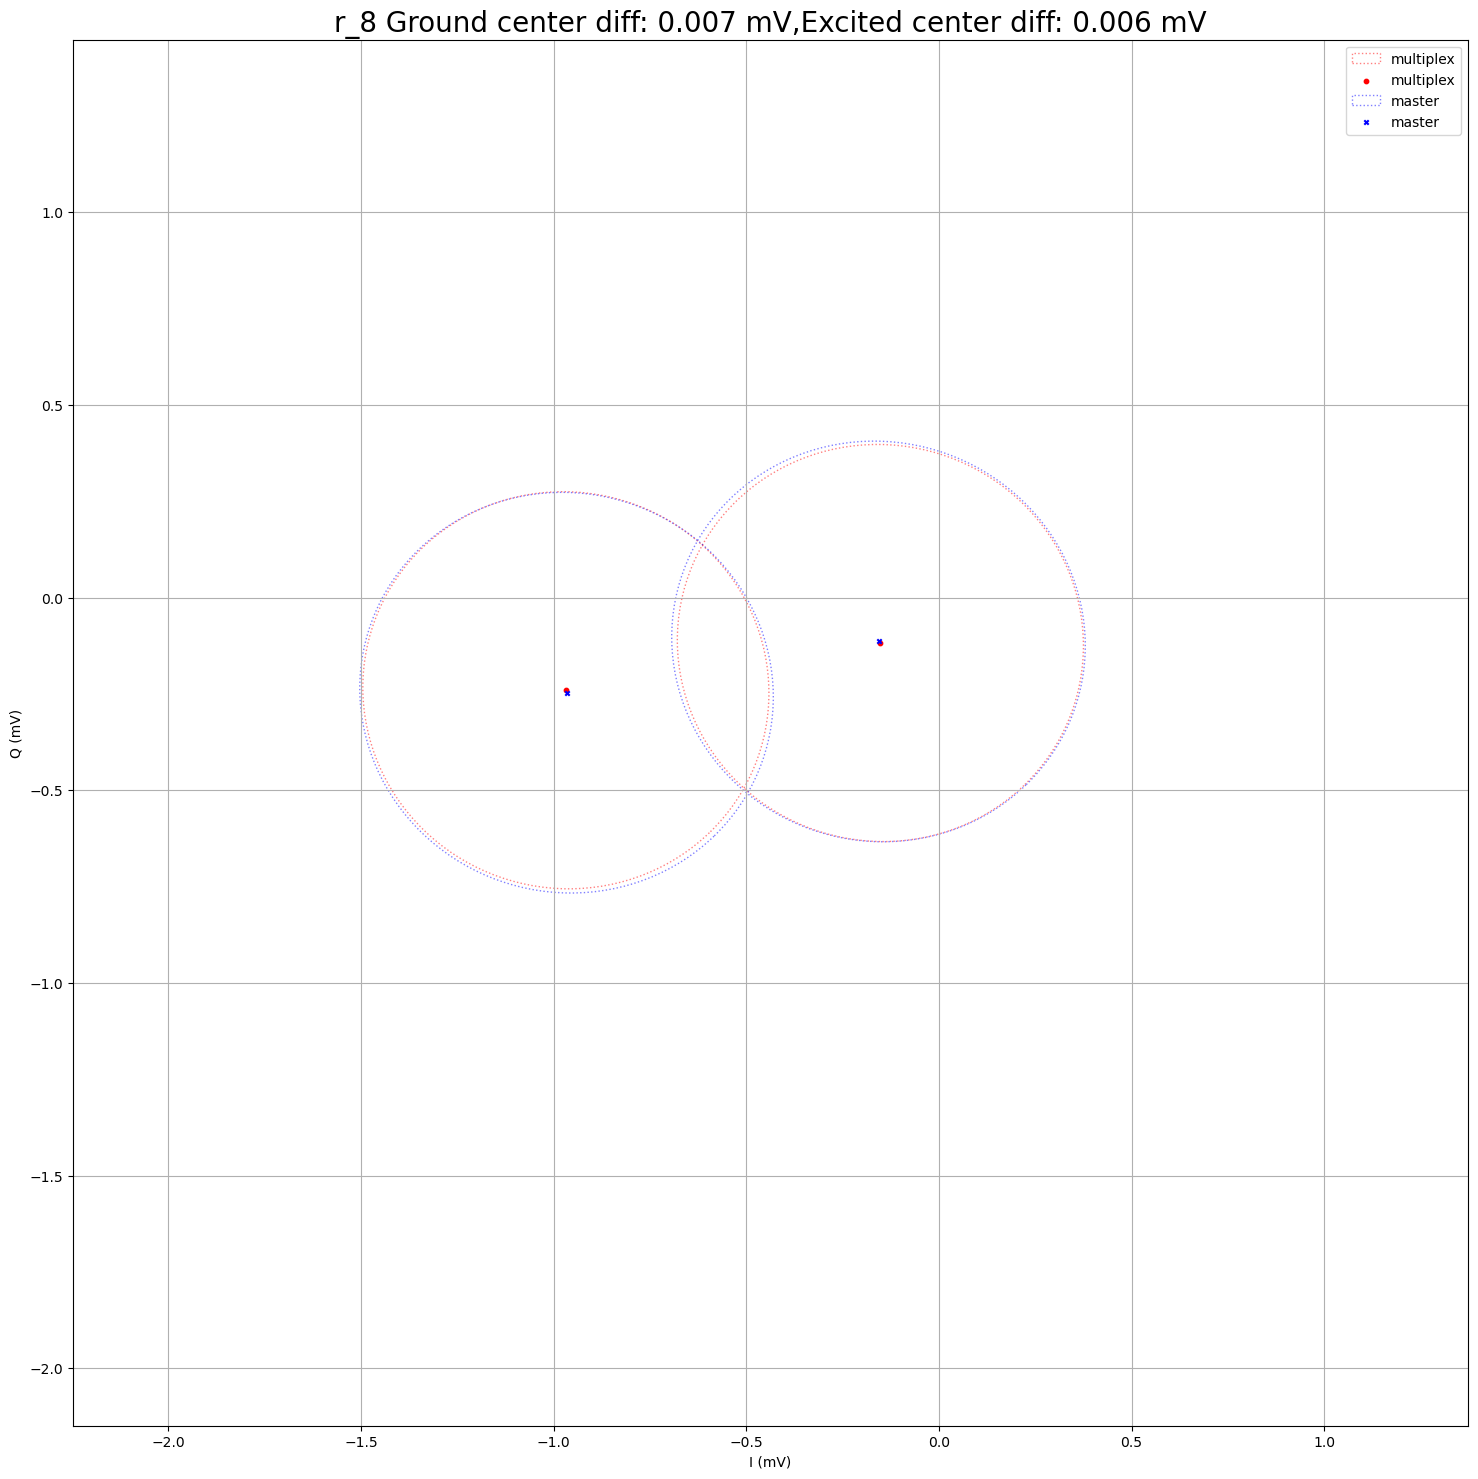

./data/Master_r_oneshot.pyqum
Comment : 
Master repeat OneShot

	Data Checked!

Start load data....
R-JSON :
	 ROSTART  :  41000
	 ROW  :  8000
	 ROL  :  0.08
	 ROF  :  5.7477
	 ROdelay  :  280
	 R  :  0 to 9 * 9
	 ROSTART,ROdelay,XYW>ROSTART-ROdelay-XYW  :  0
	 XYF  :  4.22125
	 XYW  :  19
	 XYL  :  0 0.2
	 Q1Z  :  -0.03
	 Q2Z  :  -0.075
	 Q3Z  :  -0.1
RECORD-SUM :  4000
RECORD_TIME_NS :  2000
Change : 
	 ['R' 'XYL' 'RECORD-SUM']
Change command : 
	 ['0to9*9' '0 0.2' '1to4000*3999']


       R        :  0.0   to  9.0   *  10  
      XYL       :  0.0   to  0.2   *   2  
S :  0.8256742466323719  ; N :  0.06251797956476474  ; SNR :  10.904670405186348
S :  0.8128970448189227  ; N :  0.06132133577782527  ; SNR :  10.77604714726866


<Figure size 640x480 with 0 Axes>

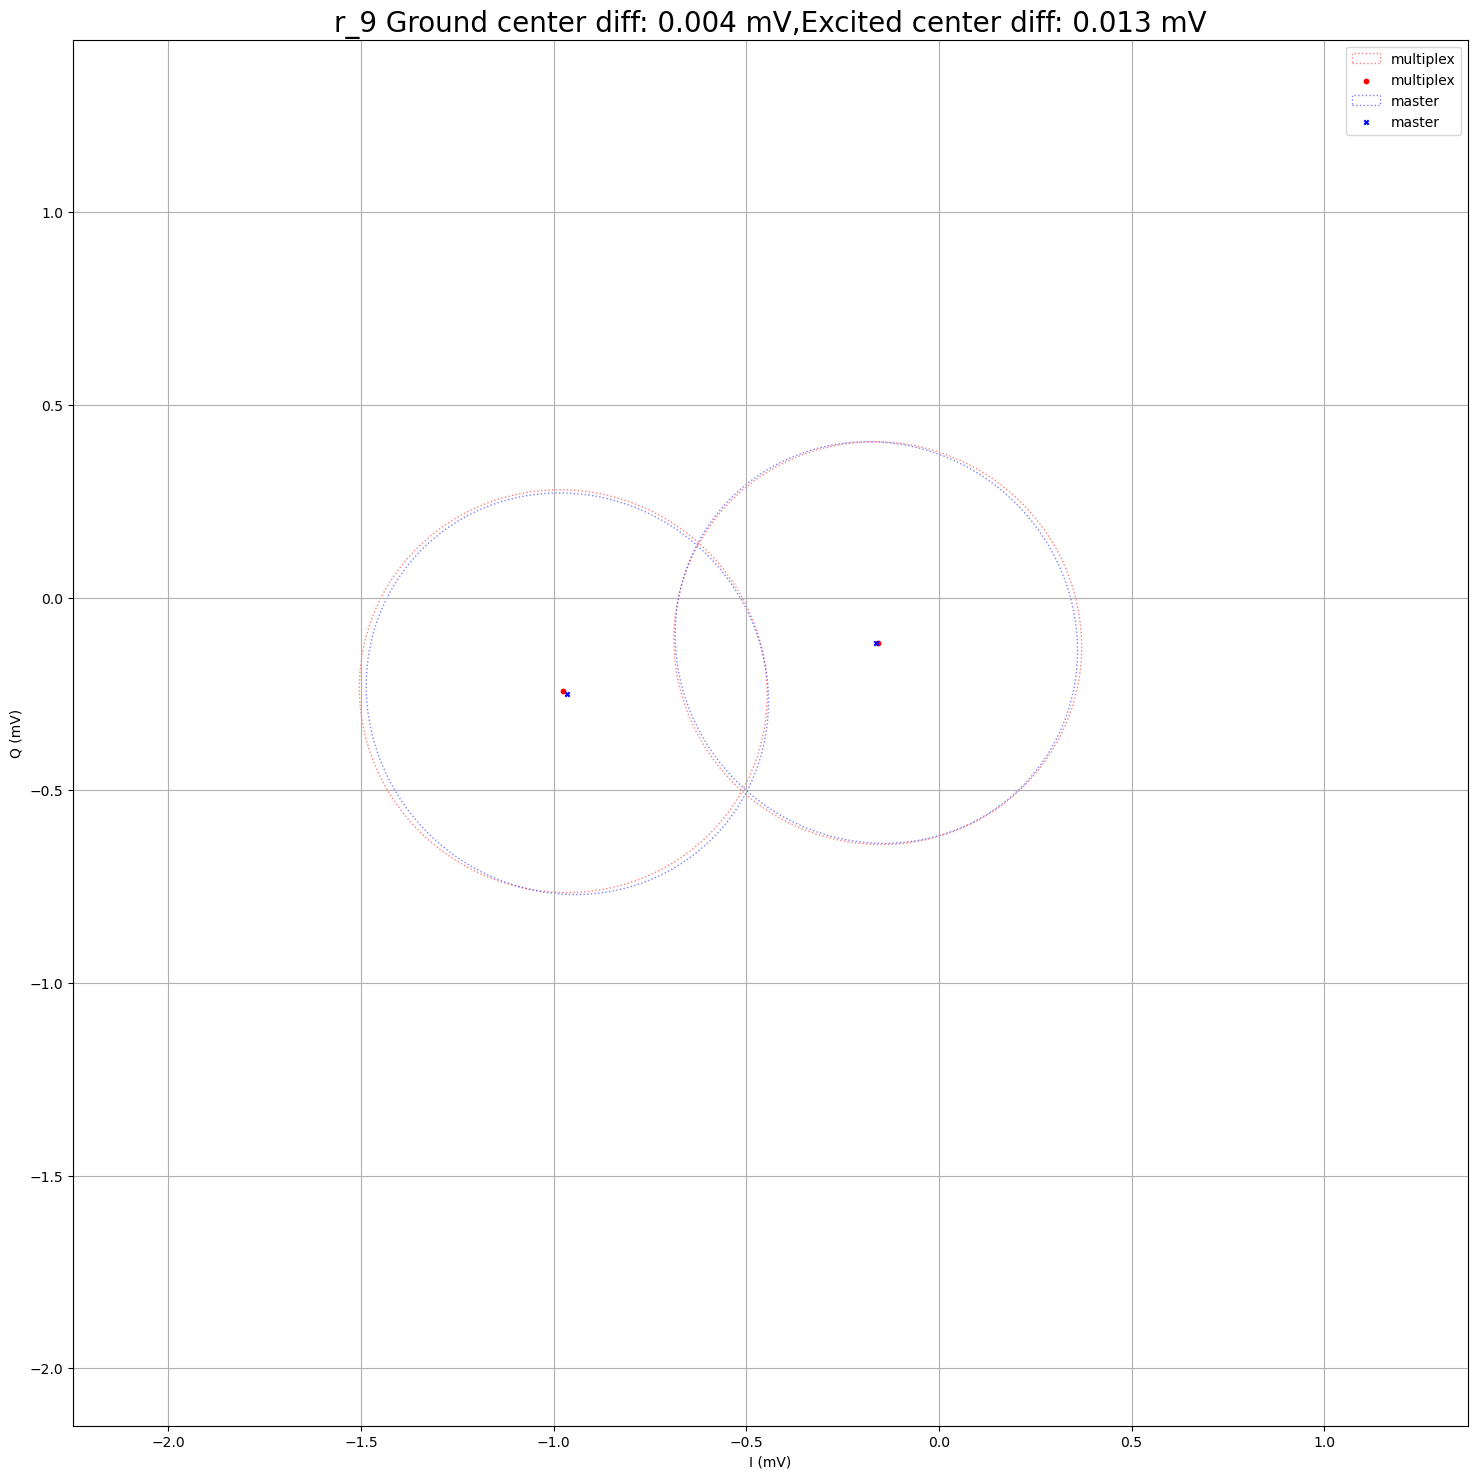

./data/Master_r_oneshot.pyqum
Comment : 
Master repeat OneShot

	Data Checked!

Start load data....
R-JSON :
	 ROSTART  :  41000
	 ROW  :  8000
	 ROL  :  0.08
	 ROF  :  5.7477
	 ROdelay  :  280
	 R  :  0 to 9 * 9
	 ROSTART,ROdelay,XYW>ROSTART-ROdelay-XYW  :  0
	 XYF  :  4.22125
	 XYW  :  19
	 XYL  :  0 0.2
	 Q1Z  :  -0.03
	 Q2Z  :  -0.075
	 Q3Z  :  -0.1
RECORD-SUM :  4000
RECORD_TIME_NS :  2000
Change : 
	 ['R' 'XYL' 'RECORD-SUM']
Change command : 
	 ['0to9*9' '0 0.2' '1to4000*3999']


       R        :  0.0   to  9.0   *  10  
      XYL       :  0.0   to  0.2   *   2  
S :  0.8199701836688355  ; N :  0.06582776931991745  ; SNR :  10.213791368781369
S :  0.8266763973990291  ; N :  0.07774848284709039  ; SNR :  8.789803234626234


<Figure size 640x480 with 0 Axes>

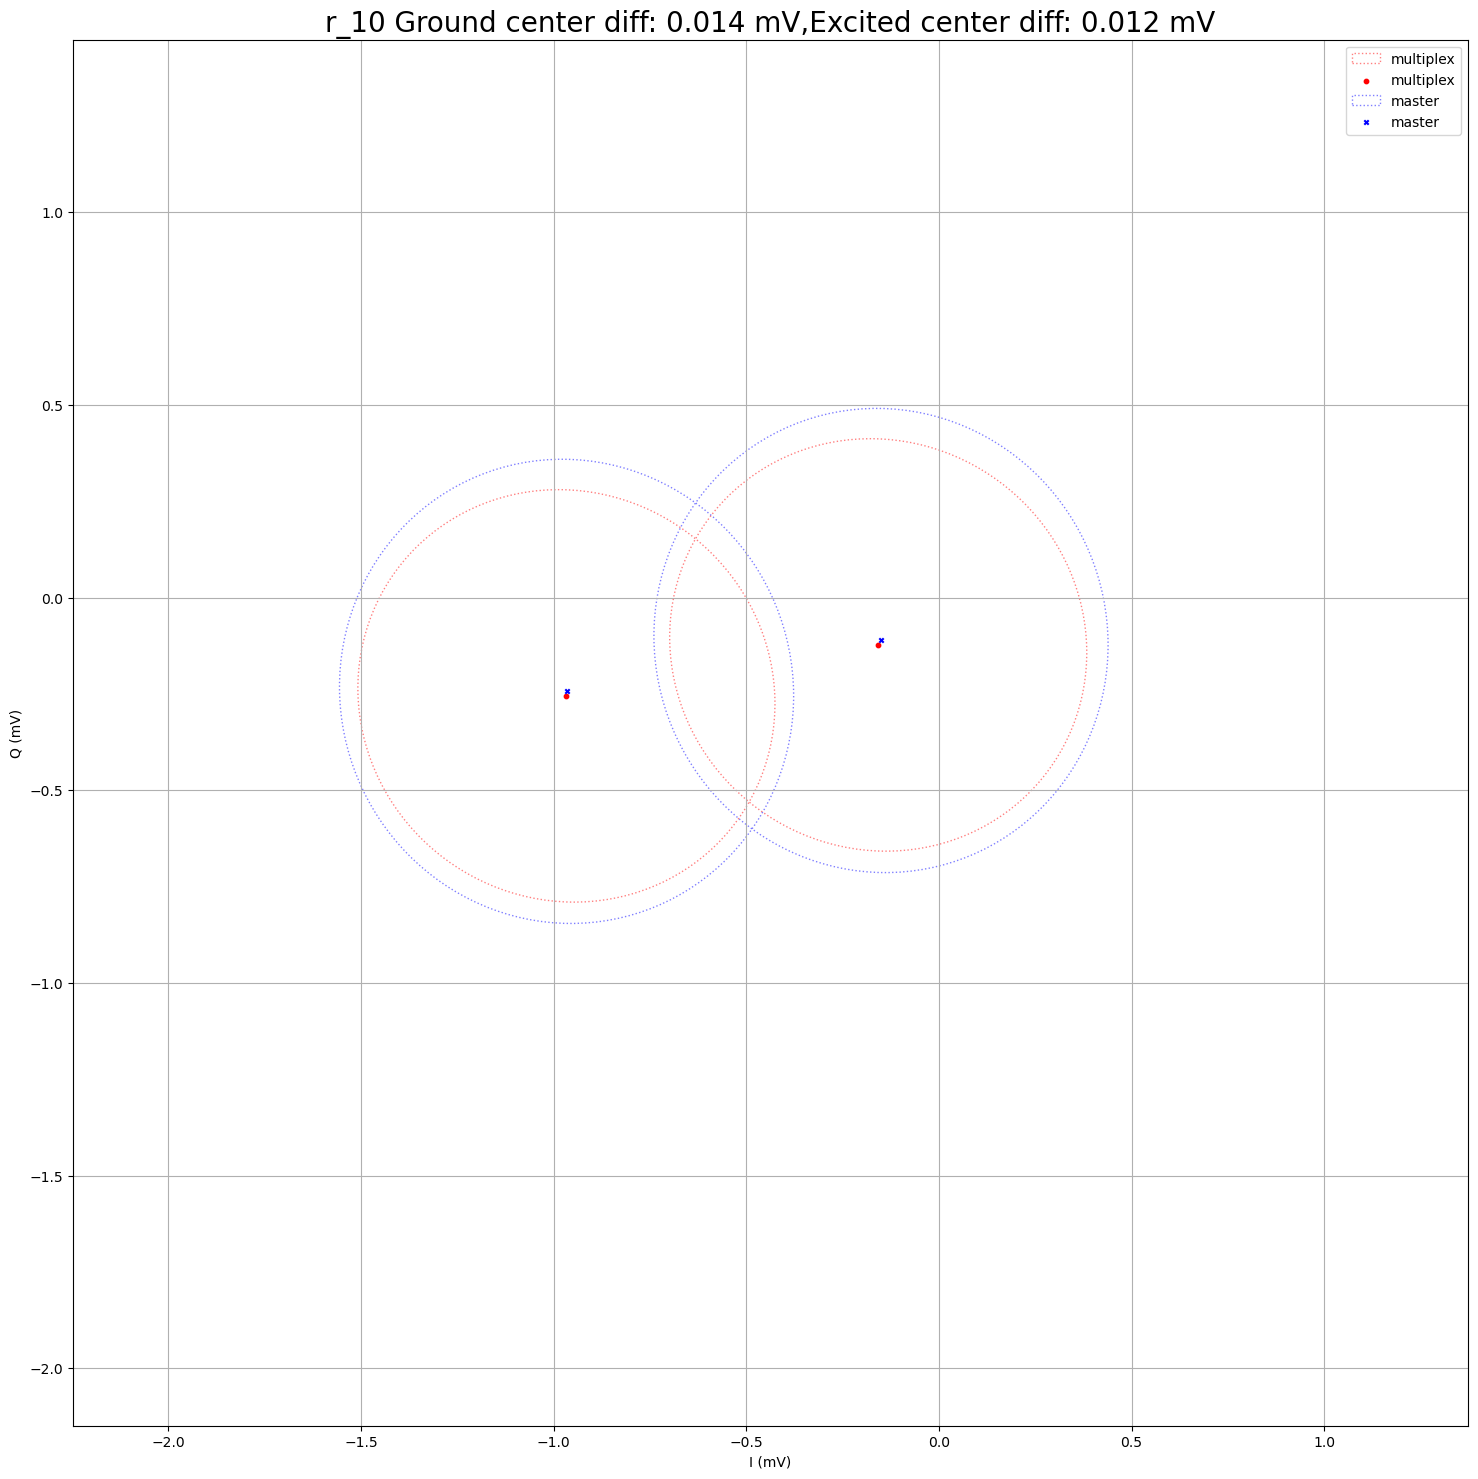

<Figure size 640x480 with 0 Axes>

In [112]:
for idx in master_df['R'].unique():
    df_multip = multip_df[(multip_df['R']==idx)]
    df_master = master_df[(master_df['R']==idx)]
    
    GE_multip, plotrange_multip = give_GEinfo(df_multip)
    GE_master, plotrange_master = give_GEinfo(df_master)

    df_dict = {"multiplex":df_multip,"master":df_master}
    GE_dict = {"multiplex":GE_multip,"master":GE_master}
    PR_dict = {"multiplex":plotrange_multip,"master":plotrange_master}
    qubit_freq = Load_pyqum(master_pyqum_path).rjson()['XYF'] 
    
    plot_results(dfs=df_dict,GandE=GE_dict,plotrange=PR_dict,Fq=qubit_freq,title='Test',saveornot=False,idx=idx)
    
    

In [58]:
d = {"z":0,"y":0,"x":0}
print(d.keys())

dict_keys(['z', 'y', 'x'])
